In [1]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2337, done.
remote: Total 2337 (delta 0), reused 0 (delta 0), pack-reused 2337
Receiving objects: 100% (2337/2337), 8.09 MiB | 6.75 MiB/s, done.
Resolving deltas: 100% (1499/1499), done.
Checking connectivity... done.


In [1]:
from __future__ import print_function
#%matplotlib inline
import argparse
import os
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML


In [2]:
import os
os.chdir('pytorch-CycleGAN-and-pix2pix/')

In [7]:
from os import listdir
from os.path import isfile, join
#Improting Image class from PIL module 
from PIL import Image 
phase_type = "val"
finaldataroot = "datasets/night2day_new"
mypath = "datasets/night2day/" + phase_type
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
i = 0
for value in onlyfiles:
    i = i+1
    myfullpath = mypath + "/" + value
    # Opens a image in RGB mode 
    im = Image.open(myfullpath) 
    width, height = im.size
    # Setting the points for cropped image 
    night_left = 0
    night_top = 0
    night_right = width / 2
    night_bottom = height
    day_left = ( width / 2 )
    day_top = 0
    day_right = width
    day_bottom = height
  
    # Cropped image of above dimension 
    # (It will not change orginal image) 
    im_night = im.crop((night_left, night_top, night_right, night_bottom)) 
    im_day = im.crop((day_left, day_top, day_right, day_bottom)) 
    x = value.split(".")
    night_new_filename = finaldataroot + "/" + phase_type + "A" + "/" + str(i) + "." + x[1]
    day_new_filename   = finaldataroot + "/" + phase_type + "B" + "/" + str(i) + "." + x[1]
    # save a image using extension 
    im_night.save(night_new_filename) 
    im_day.save(day_new_filename) 
print(i) 

10


In [ ]:
!python train.py --dataroot ./datasets/night2day_new --name night2day_cycle_gan --model cycle_gan --gpu_ids 0 --display_id -1

----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: ./datasets/night2day_new      	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: -1                            	[default: 1]
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest                        
 

(epoch: 1, iters: 2500, time: 0.628, data: 0.001) D_A: 0.272 G_A: 0.712 cycle_A: 1.212 idt_A: 0.531 D_B: 0.480 G_B: 1.110 cycle_B: 1.389 idt_B: 0.443 
(epoch: 1, iters: 2600, time: 1.117, data: 0.001) D_A: 0.251 G_A: 1.052 cycle_A: 1.455 idt_A: 0.698 D_B: 0.186 G_B: 0.458 cycle_B: 1.730 idt_B: 0.568 
(epoch: 1, iters: 2700, time: 1.112, data: 0.001) D_A: 0.285 G_A: 0.598 cycle_A: 1.901 idt_A: 0.892 D_B: 0.168 G_B: 0.214 cycle_B: 2.188 idt_B: 0.922 
(epoch: 1, iters: 2800, time: 1.121, data: 0.001) D_A: 0.265 G_A: 0.362 cycle_A: 1.849 idt_A: 0.945 D_B: 0.348 G_B: 0.231 cycle_B: 2.629 idt_B: 1.082 
(epoch: 1, iters: 2900, time: 1.101, data: 0.001) D_A: 0.187 G_A: 0.273 cycle_A: 1.745 idt_A: 0.917 D_B: 0.141 G_B: 0.500 cycle_B: 1.691 idt_B: 0.716 
(epoch: 1, iters: 3000, time: 1.102, data: 0.001) D_A: 0.179 G_A: 0.449 cycle_A: 3.238 idt_A: 0.758 D_B: 0.089 G_B: 0.720 cycle_B: 1.888 idt_B: 1.161 
(epoch: 1, iters: 3100, time: 1.115, data: 0.001) D_A: 0.121 G_A: 0.835 cycle_A: 1.532 idt_A: 

(epoch: 1, iters: 7900, time: 1.103, data: 0.001) D_A: 0.310 G_A: 0.689 cycle_A: 1.539 idt_A: 0.518 D_B: 0.079 G_B: 0.253 cycle_B: 1.014 idt_B: 0.872 
(epoch: 1, iters: 8000, time: 1.477, data: 0.001) D_A: 0.131 G_A: 0.548 cycle_A: 0.619 idt_A: 0.997 D_B: 0.228 G_B: 0.125 cycle_B: 2.069 idt_B: 0.294 
(epoch: 1, iters: 8100, time: 1.121, data: 0.001) D_A: 0.204 G_A: 0.202 cycle_A: 1.886 idt_A: 0.727 D_B: 0.039 G_B: 0.997 cycle_B: 2.771 idt_B: 0.661 
(epoch: 1, iters: 8200, time: 1.100, data: 0.001) D_A: 0.233 G_A: 0.929 cycle_A: 0.936 idt_A: 0.716 D_B: 0.131 G_B: 0.323 cycle_B: 1.822 idt_B: 0.431 
(epoch: 1, iters: 8300, time: 1.107, data: 0.001) D_A: 0.383 G_A: 0.834 cycle_A: 4.781 idt_A: 0.925 D_B: 0.097 G_B: 0.079 cycle_B: 1.754 idt_B: 2.269 
(epoch: 1, iters: 8400, time: 1.100, data: 0.001) D_A: 0.188 G_A: 0.257 cycle_A: 4.859 idt_A: 0.345 D_B: 0.048 G_B: 0.643 cycle_B: 0.929 idt_B: 1.623 
(epoch: 1, iters: 8500, time: 1.115, data: 0.001) D_A: 0.221 G_A: 0.585 cycle_A: 1.034 idt_A: 

(epoch: 1, iters: 13300, time: 1.108, data: 0.001) D_A: 0.202 G_A: 0.122 cycle_A: 1.440 idt_A: 1.322 D_B: 0.316 G_B: 0.273 cycle_B: 2.213 idt_B: 1.179 
(epoch: 1, iters: 13400, time: 1.110, data: 0.005) D_A: 0.246 G_A: 0.207 cycle_A: 0.868 idt_A: 0.569 D_B: 0.102 G_B: 0.474 cycle_B: 1.222 idt_B: 0.579 
(epoch: 1, iters: 13500, time: 0.725, data: 0.001) D_A: 0.193 G_A: 0.636 cycle_A: 1.373 idt_A: 0.488 D_B: 0.171 G_B: 0.360 cycle_B: 1.034 idt_B: 0.962 
(epoch: 1, iters: 13600, time: 1.123, data: 0.001) D_A: 0.260 G_A: 0.139 cycle_A: 2.965 idt_A: 0.431 D_B: 0.053 G_B: 0.622 cycle_B: 0.911 idt_B: 1.703 
(epoch: 1, iters: 13700, time: 1.116, data: 0.001) D_A: 0.131 G_A: 0.429 cycle_A: 2.272 idt_A: 0.471 D_B: 0.098 G_B: 0.762 cycle_B: 1.034 idt_B: 1.405 
(epoch: 1, iters: 13800, time: 1.115, data: 0.001) D_A: 0.332 G_A: 0.086 cycle_A: 1.099 idt_A: 0.369 D_B: 0.442 G_B: 0.025 cycle_B: 0.801 idt_B: 0.529 
(epoch: 1, iters: 13900, time: 1.061, data: 0.001) D_A: 0.105 G_A: 0.601 cycle_A: 1.198 

(epoch: 2, iters: 877, time: 1.106, data: 0.001) D_A: 0.181 G_A: 0.318 cycle_A: 2.683 idt_A: 0.508 D_B: 0.114 G_B: 0.524 cycle_B: 1.356 idt_B: 1.778 
(epoch: 2, iters: 977, time: 1.117, data: 0.001) D_A: 0.129 G_A: 0.361 cycle_A: 1.047 idt_A: 0.733 D_B: 0.294 G_B: 0.658 cycle_B: 1.427 idt_B: 0.615 
(epoch: 2, iters: 1077, time: 1.105, data: 0.001) D_A: 0.162 G_A: 0.449 cycle_A: 1.652 idt_A: 0.904 D_B: 0.231 G_B: 0.400 cycle_B: 1.580 idt_B: 0.801 
(epoch: 2, iters: 1177, time: 1.115, data: 0.001) D_A: 0.172 G_A: 0.383 cycle_A: 0.465 idt_A: 1.053 D_B: 0.116 G_B: 0.465 cycle_B: 1.378 idt_B: 0.338 
(epoch: 2, iters: 1277, time: 1.103, data: 0.002) D_A: 0.193 G_A: 0.434 cycle_A: 1.839 idt_A: 0.622 D_B: 0.447 G_B: 0.114 cycle_B: 1.611 idt_B: 0.805 
(epoch: 2, iters: 1377, time: 1.108, data: 0.001) D_A: 0.257 G_A: 0.111 cycle_A: 2.308 idt_A: 0.419 D_B: 0.192 G_B: 0.909 cycle_B: 0.870 idt_B: 0.584 
(epoch: 2, iters: 1477, time: 1.116, data: 0.001) D_A: 0.165 G_A: 0.296 cycle_A: 1.440 idt_A: 0.

(epoch: 2, iters: 6277, time: 1.124, data: 0.001) D_A: 0.116 G_A: 0.602 cycle_A: 1.620 idt_A: 0.426 D_B: 0.102 G_B: 0.752 cycle_B: 1.001 idt_B: 0.486 
(epoch: 2, iters: 6377, time: 1.112, data: 0.001) D_A: 0.186 G_A: 0.375 cycle_A: 1.095 idt_A: 0.426 D_B: 0.339 G_B: 0.062 cycle_B: 0.925 idt_B: 0.344 
(epoch: 2, iters: 6477, time: 1.115, data: 0.001) D_A: 0.434 G_A: 0.288 cycle_A: 2.206 idt_A: 0.532 D_B: 0.188 G_B: 0.222 cycle_B: 1.251 idt_B: 1.062 
(epoch: 2, iters: 6577, time: 1.106, data: 0.001) D_A: 0.101 G_A: 0.023 cycle_A: 1.943 idt_A: 0.515 D_B: 0.194 G_B: 0.556 cycle_B: 1.154 idt_B: 1.044 
(epoch: 2, iters: 6677, time: 1.113, data: 0.001) D_A: 0.126 G_A: 0.215 cycle_A: 1.294 idt_A: 0.556 D_B: 0.110 G_B: 0.836 cycle_B: 0.787 idt_B: 0.557 
(epoch: 2, iters: 6777, time: 1.111, data: 0.001) D_A: 0.160 G_A: 0.373 cycle_A: 0.753 idt_A: 0.579 D_B: 0.134 G_B: 0.611 cycle_B: 1.393 idt_B: 0.327 
(epoch: 2, iters: 6877, time: 1.100, data: 0.001) D_A: 0.197 G_A: 0.439 cycle_A: 0.513 idt_A: 

(epoch: 2, iters: 11677, time: 1.121, data: 0.001) D_A: 0.270 G_A: 0.312 cycle_A: 0.824 idt_A: 0.816 D_B: 0.246 G_B: 0.409 cycle_B: 1.315 idt_B: 0.414 
(epoch: 2, iters: 11777, time: 1.102, data: 0.001) D_A: 0.193 G_A: 0.552 cycle_A: 2.352 idt_A: 0.595 D_B: 0.487 G_B: 0.128 cycle_B: 1.258 idt_B: 0.467 
(epoch: 2, iters: 11877, time: 1.111, data: 0.001) D_A: 0.060 G_A: 0.870 cycle_A: 1.521 idt_A: 0.444 D_B: 0.383 G_B: 0.163 cycle_B: 1.116 idt_B: 0.864 
(epoch: 2, iters: 11977, time: 1.107, data: 0.001) D_A: 0.180 G_A: 0.152 cycle_A: 0.763 idt_A: 0.450 D_B: 0.038 G_B: 0.320 cycle_B: 1.405 idt_B: 0.295 
(epoch: 2, iters: 12077, time: 1.125, data: 0.001) D_A: 0.195 G_A: 0.794 cycle_A: 1.201 idt_A: 0.391 D_B: 0.044 G_B: 0.736 cycle_B: 0.931 idt_B: 0.536 
(epoch: 2, iters: 12177, time: 1.407, data: 0.001) D_A: 0.105 G_A: 0.869 cycle_A: 1.162 idt_A: 0.608 D_B: 0.195 G_B: 0.936 cycle_B: 1.222 idt_B: 0.520 
saving the latest model (epoch 2, total_iters 30000)
(epoch: 2, iters: 12277, time: 1.12

(epoch: 2, iters: 17077, time: 1.112, data: 0.001) D_A: 0.261 G_A: 0.134 cycle_A: 1.244 idt_A: 0.406 D_B: 0.100 G_B: 0.353 cycle_B: 1.492 idt_B: 0.721 
(epoch: 2, iters: 17177, time: 1.119, data: 0.001) D_A: 0.129 G_A: 0.569 cycle_A: 0.987 idt_A: 0.488 D_B: 0.125 G_B: 0.200 cycle_B: 1.252 idt_B: 0.406 
saving the latest model (epoch 2, total_iters 35000)
(epoch: 2, iters: 17277, time: 1.119, data: 0.001) D_A: 0.237 G_A: 1.221 cycle_A: 1.116 idt_A: 0.495 D_B: 0.071 G_B: 0.613 cycle_B: 1.117 idt_B: 0.651 
(epoch: 2, iters: 17377, time: 1.118, data: 0.001) D_A: 0.243 G_A: 0.810 cycle_A: 1.140 idt_A: 0.472 D_B: 0.371 G_B: 0.097 cycle_B: 1.127 idt_B: 0.538 
(epoch: 2, iters: 17477, time: 1.121, data: 0.001) D_A: 0.078 G_A: 1.033 cycle_A: 1.195 idt_A: 0.774 D_B: 0.097 G_B: 0.379 cycle_B: 1.725 idt_B: 0.436 
(epoch: 2, iters: 17577, time: 1.116, data: 0.001) D_A: 0.138 G_A: 0.336 cycle_A: 0.811 idt_A: 1.117 D_B: 0.046 G_B: 0.614 cycle_B: 2.154 idt_B: 0.268 
(epoch: 2, iters: 17677, time: 1.12

(epoch: 3, iters: 4654, time: 1.119, data: 0.001) D_A: 0.250 G_A: 0.420 cycle_A: 1.082 idt_A: 0.353 D_B: 0.076 G_B: 0.427 cycle_B: 0.991 idt_B: 0.479 
(epoch: 3, iters: 4754, time: 1.073, data: 0.001) D_A: 0.302 G_A: 0.341 cycle_A: 0.869 idt_A: 0.456 D_B: 0.118 G_B: 0.840 cycle_B: 1.036 idt_B: 0.456 
(epoch: 3, iters: 4854, time: 1.124, data: 0.001) D_A: 0.208 G_A: 0.252 cycle_A: 0.950 idt_A: 0.439 D_B: 0.089 G_B: 0.304 cycle_B: 1.168 idt_B: 0.357 
(epoch: 3, iters: 4954, time: 1.113, data: 0.001) D_A: 0.272 G_A: 0.341 cycle_A: 1.169 idt_A: 0.291 D_B: 0.082 G_B: 0.509 cycle_B: 0.726 idt_B: 0.386 
(epoch: 3, iters: 5054, time: 0.924, data: 0.001) D_A: 0.141 G_A: 0.361 cycle_A: 0.672 idt_A: 1.186 D_B: 0.043 G_B: 0.191 cycle_B: 1.966 idt_B: 0.353 
(epoch: 3, iters: 5154, time: 1.114, data: 0.001) D_A: 0.402 G_A: 0.252 cycle_A: 0.984 idt_A: 1.147 D_B: 0.157 G_B: 0.586 cycle_B: 1.427 idt_B: 0.443 
(epoch: 3, iters: 5254, time: 1.106, data: 0.001) D_A: 0.038 G_A: 0.662 cycle_A: 0.914 idt_A: 

(epoch: 3, iters: 10054, time: 1.115, data: 0.001) D_A: 0.241 G_A: 0.146 cycle_A: 1.082 idt_A: 0.442 D_B: 0.067 G_B: 1.121 cycle_B: 0.848 idt_B: 0.366 
(epoch: 3, iters: 10154, time: 1.130, data: 0.001) D_A: 0.286 G_A: 0.821 cycle_A: 1.077 idt_A: 0.509 D_B: 0.198 G_B: 0.528 cycle_B: 1.198 idt_B: 0.720 
(epoch: 3, iters: 10254, time: 1.120, data: 0.001) D_A: 0.299 G_A: 0.143 cycle_A: 1.107 idt_A: 0.511 D_B: 0.161 G_B: 1.182 cycle_B: 0.980 idt_B: 0.676 
(epoch: 3, iters: 10354, time: 1.466, data: 0.001) D_A: 0.224 G_A: 0.370 cycle_A: 1.454 idt_A: 0.344 D_B: 0.231 G_B: 0.527 cycle_B: 1.057 idt_B: 0.687 
(epoch: 3, iters: 10454, time: 1.122, data: 0.001) D_A: 0.081 G_A: 1.155 cycle_A: 1.578 idt_A: 0.348 D_B: 0.048 G_B: 0.732 cycle_B: 0.923 idt_B: 0.769 
(epoch: 3, iters: 10554, time: 1.123, data: 0.001) D_A: 0.167 G_A: 0.327 cycle_A: 0.569 idt_A: 0.581 D_B: 0.022 G_B: 0.930 cycle_B: 1.292 idt_B: 0.317 
(epoch: 3, iters: 10654, time: 1.111, data: 0.001) D_A: 0.168 G_A: 0.368 cycle_A: 0.705 

(epoch: 3, iters: 15454, time: 1.109, data: 0.001) D_A: 0.237 G_A: 0.401 cycle_A: 0.507 idt_A: 0.364 D_B: 0.182 G_B: 0.539 cycle_B: 1.201 idt_B: 0.194 
(epoch: 3, iters: 15554, time: 1.099, data: 0.001) D_A: 0.218 G_A: 0.156 cycle_A: 0.659 idt_A: 0.659 D_B: 0.200 G_B: 0.833 cycle_B: 1.805 idt_B: 0.341 
(epoch: 3, iters: 15654, time: 0.540, data: 0.001) D_A: 0.075 G_A: 0.237 cycle_A: 0.940 idt_A: 0.521 D_B: 0.119 G_B: 1.009 cycle_B: 1.249 idt_B: 0.403 
(epoch: 3, iters: 15754, time: 1.110, data: 0.001) D_A: 0.256 G_A: 0.753 cycle_A: 1.453 idt_A: 0.456 D_B: 0.159 G_B: 0.530 cycle_B: 0.901 idt_B: 0.457 
(epoch: 3, iters: 15854, time: 1.118, data: 0.001) D_A: 0.131 G_A: 0.385 cycle_A: 0.645 idt_A: 0.447 D_B: 0.125 G_B: 0.727 cycle_B: 1.392 idt_B: 0.224 
(epoch: 3, iters: 15954, time: 1.095, data: 0.001) D_A: 0.210 G_A: 0.369 cycle_A: 1.286 idt_A: 0.409 D_B: 0.061 G_B: 0.611 cycle_B: 1.402 idt_B: 0.318 
(epoch: 3, iters: 16054, time: 1.113, data: 0.001) D_A: 0.144 G_A: 0.432 cycle_A: 1.475 

(epoch: 4, iters: 3031, time: 1.121, data: 0.001) D_A: 0.215 G_A: 0.197 cycle_A: 0.511 idt_A: 0.859 D_B: 0.087 G_B: 0.437 cycle_B: 1.699 idt_B: 0.203 
(epoch: 4, iters: 3131, time: 1.115, data: 0.001) D_A: 0.080 G_A: 0.542 cycle_A: 1.069 idt_A: 0.425 D_B: 0.198 G_B: 0.406 cycle_B: 1.286 idt_B: 0.307 
(epoch: 4, iters: 3231, time: 1.123, data: 0.001) D_A: 0.212 G_A: 0.187 cycle_A: 0.647 idt_A: 0.392 D_B: 0.418 G_B: 0.587 cycle_B: 0.819 idt_B: 0.416 
(epoch: 4, iters: 3331, time: 1.129, data: 0.001) D_A: 0.100 G_A: 0.476 cycle_A: 1.374 idt_A: 0.443 D_B: 0.120 G_B: 0.825 cycle_B: 1.033 idt_B: 0.680 
(epoch: 4, iters: 3431, time: 1.119, data: 0.001) D_A: 0.193 G_A: 0.893 cycle_A: 1.301 idt_A: 0.519 D_B: 0.133 G_B: 0.903 cycle_B: 1.439 idt_B: 0.356 
(epoch: 4, iters: 3531, time: 1.110, data: 0.001) D_A: 0.250 G_A: 1.014 cycle_A: 1.007 idt_A: 0.570 D_B: 0.220 G_B: 0.497 cycle_B: 1.217 idt_B: 0.650 
(epoch: 4, iters: 3631, time: 1.108, data: 0.001) D_A: 0.126 G_A: 0.892 cycle_A: 0.572 idt_A: 

(epoch: 4, iters: 8431, time: 1.108, data: 0.001) D_A: 0.089 G_A: 0.761 cycle_A: 1.024 idt_A: 0.614 D_B: 0.297 G_B: 0.466 cycle_B: 1.015 idt_B: 0.370 
(epoch: 4, iters: 8531, time: 1.453, data: 0.001) D_A: 0.107 G_A: 0.232 cycle_A: 0.816 idt_A: 0.382 D_B: 0.074 G_B: 0.654 cycle_B: 0.921 idt_B: 0.341 
(epoch: 4, iters: 8631, time: 1.113, data: 0.001) D_A: 0.209 G_A: 0.286 cycle_A: 0.672 idt_A: 0.715 D_B: 0.335 G_B: 0.250 cycle_B: 1.543 idt_B: 0.304 
(epoch: 4, iters: 8731, time: 1.118, data: 0.001) D_A: 0.109 G_A: 1.064 cycle_A: 0.967 idt_A: 0.459 D_B: 0.038 G_B: 0.629 cycle_B: 1.073 idt_B: 0.249 
(epoch: 4, iters: 8831, time: 1.069, data: 0.001) D_A: 0.253 G_A: 0.471 cycle_A: 0.561 idt_A: 0.466 D_B: 0.061 G_B: 0.800 cycle_B: 1.026 idt_B: 0.252 
(epoch: 4, iters: 8931, time: 1.124, data: 0.001) D_A: 0.136 G_A: 0.664 cycle_A: 2.169 idt_A: 0.439 D_B: 0.317 G_B: 0.093 cycle_B: 1.293 idt_B: 0.911 
(epoch: 4, iters: 9031, time: 1.117, data: 0.001) D_A: 0.143 G_A: 0.307 cycle_A: 0.796 idt_A: 

(epoch: 4, iters: 13831, time: 1.124, data: 0.001) D_A: 0.208 G_A: 0.780 cycle_A: 0.915 idt_A: 0.379 D_B: 0.121 G_B: 0.861 cycle_B: 0.619 idt_B: 0.238 
(epoch: 4, iters: 13931, time: 1.121, data: 0.001) D_A: 0.156 G_A: 0.420 cycle_A: 0.711 idt_A: 0.381 D_B: 0.195 G_B: 0.258 cycle_B: 1.082 idt_B: 0.252 
(epoch: 4, iters: 14031, time: 1.122, data: 0.001) D_A: 0.154 G_A: 0.454 cycle_A: 0.829 idt_A: 0.348 D_B: 0.033 G_B: 0.850 cycle_B: 1.171 idt_B: 0.358 
(epoch: 4, iters: 14131, time: 1.117, data: 0.001) D_A: 0.263 G_A: 0.168 cycle_A: 0.731 idt_A: 0.233 D_B: 0.243 G_B: 0.554 cycle_B: 0.570 idt_B: 0.290 
(epoch: 4, iters: 14231, time: 1.122, data: 0.001) D_A: 0.069 G_A: 0.799 cycle_A: 0.873 idt_A: 0.372 D_B: 0.076 G_B: 0.069 cycle_B: 1.008 idt_B: 0.396 
(epoch: 4, iters: 14331, time: 1.114, data: 0.001) D_A: 0.111 G_A: 0.876 cycle_A: 0.915 idt_A: 0.439 D_B: 0.198 G_B: 0.878 cycle_B: 1.044 idt_B: 0.322 
(epoch: 4, iters: 14431, time: 1.127, data: 0.001) D_A: 0.217 G_A: 1.067 cycle_A: 0.521 

(epoch: 5, iters: 1408, time: 1.117, data: 0.001) D_A: 0.139 G_A: 0.532 cycle_A: 0.882 idt_A: 0.308 D_B: 0.222 G_B: 0.455 cycle_B: 0.906 idt_B: 0.524 
(epoch: 5, iters: 1508, time: 0.873, data: 0.001) D_A: 0.062 G_A: 0.435 cycle_A: 1.840 idt_A: 0.520 D_B: 0.105 G_B: 0.473 cycle_B: 1.333 idt_B: 0.712 
(epoch: 5, iters: 1608, time: 1.116, data: 0.001) D_A: 0.213 G_A: 0.319 cycle_A: 1.181 idt_A: 0.396 D_B: 0.114 G_B: 0.397 cycle_B: 0.889 idt_B: 0.334 
(epoch: 5, iters: 1708, time: 1.110, data: 0.001) D_A: 0.249 G_A: 0.167 cycle_A: 0.981 idt_A: 1.422 D_B: 0.300 G_B: 0.378 cycle_B: 1.057 idt_B: 0.444 
(epoch: 5, iters: 1808, time: 1.121, data: 0.001) D_A: 0.104 G_A: 0.489 cycle_A: 1.072 idt_A: 0.477 D_B: 0.188 G_B: 0.352 cycle_B: 1.865 idt_B: 0.425 
(epoch: 5, iters: 1908, time: 1.133, data: 0.002) D_A: 0.406 G_A: 0.081 cycle_A: 0.924 idt_A: 0.327 D_B: 0.115 G_B: 0.443 cycle_B: 0.550 idt_B: 0.250 
(epoch: 5, iters: 2008, time: 1.118, data: 0.001) D_A: 0.290 G_A: 0.169 cycle_A: 0.934 idt_A: 

(epoch: 5, iters: 6808, time: 0.574, data: 0.001) D_A: 0.125 G_A: 0.372 cycle_A: 0.623 idt_A: 0.223 D_B: 0.080 G_B: 0.454 cycle_B: 0.798 idt_B: 0.176 
(epoch: 5, iters: 6908, time: 0.571, data: 0.001) D_A: 0.076 G_A: 0.869 cycle_A: 1.147 idt_A: 0.594 D_B: 0.049 G_B: 0.821 cycle_B: 0.766 idt_B: 0.365 
(epoch: 5, iters: 7008, time: 0.568, data: 0.001) D_A: 0.177 G_A: 0.974 cycle_A: 1.230 idt_A: 0.407 D_B: 0.092 G_B: 0.397 cycle_B: 1.102 idt_B: 0.469 
(epoch: 5, iters: 7108, time: 0.571, data: 0.001) D_A: 0.181 G_A: 0.694 cycle_A: 1.153 idt_A: 0.442 D_B: 0.068 G_B: 0.559 cycle_B: 1.084 idt_B: 0.521 
(epoch: 5, iters: 7208, time: 0.570, data: 0.001) D_A: 0.172 G_A: 0.268 cycle_A: 0.646 idt_A: 0.250 D_B: 0.229 G_B: 0.888 cycle_B: 0.727 idt_B: 0.398 
(epoch: 5, iters: 7308, time: 0.572, data: 0.001) D_A: 0.135 G_A: 0.544 cycle_A: 0.893 idt_A: 0.515 D_B: 0.115 G_B: 0.359 cycle_B: 0.799 idt_B: 0.343 
(epoch: 5, iters: 7408, time: 0.574, data: 0.001) D_A: 0.251 G_A: 0.578 cycle_A: 0.668 idt_A: 

(epoch: 5, iters: 12208, time: 0.569, data: 0.001) D_A: 0.169 G_A: 0.355 cycle_A: 0.639 idt_A: 0.462 D_B: 0.182 G_B: 0.921 cycle_B: 1.026 idt_B: 0.410 
(epoch: 5, iters: 12308, time: 0.572, data: 0.001) D_A: 0.186 G_A: 0.197 cycle_A: 0.799 idt_A: 0.310 D_B: 0.227 G_B: 0.791 cycle_B: 0.801 idt_B: 0.276 
(epoch: 5, iters: 12408, time: 0.572, data: 0.001) D_A: 0.155 G_A: 0.264 cycle_A: 0.921 idt_A: 0.342 D_B: 0.063 G_B: 0.475 cycle_B: 1.267 idt_B: 0.271 
(epoch: 5, iters: 12508, time: 0.572, data: 0.001) D_A: 0.227 G_A: 0.537 cycle_A: 0.751 idt_A: 0.765 D_B: 0.052 G_B: 0.882 cycle_B: 1.352 idt_B: 0.275 
(epoch: 5, iters: 12608, time: 0.576, data: 0.001) D_A: 0.126 G_A: 0.356 cycle_A: 1.258 idt_A: 0.318 D_B: 0.068 G_B: 1.350 cycle_B: 0.860 idt_B: 0.396 
(epoch: 5, iters: 12708, time: 0.890, data: 0.001) D_A: 0.298 G_A: 0.609 cycle_A: 0.643 idt_A: 0.441 D_B: 0.076 G_B: 0.563 cycle_B: 0.917 idt_B: 0.279 
(epoch: 5, iters: 12808, time: 0.571, data: 0.001) D_A: 0.165 G_A: 0.798 cycle_A: 0.854 

(epoch: 5, iters: 17608, time: 0.572, data: 0.001) D_A: 0.134 G_A: 0.469 cycle_A: 0.514 idt_A: 0.288 D_B: 0.180 G_B: 0.416 cycle_B: 0.674 idt_B: 0.242 
(epoch: 5, iters: 17708, time: 0.574, data: 0.001) D_A: 0.038 G_A: 0.596 cycle_A: 0.665 idt_A: 0.287 D_B: 0.123 G_B: 0.477 cycle_B: 0.647 idt_B: 0.244 
(epoch: 5, iters: 17808, time: 0.569, data: 0.001) D_A: 0.124 G_A: 1.245 cycle_A: 1.394 idt_A: 0.527 D_B: 0.051 G_B: 0.559 cycle_B: 1.164 idt_B: 0.626 
saving the model at the end of epoch 5, iters 89115
End of epoch 5 / 200 	 Time Taken: 11371 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 6, iters: 85, time: 1.037, data: 0.001) D_A: 0.096 G_A: 0.470 cycle_A: 1.072 idt_A: 0.396 D_B: 0.141 G_B: 0.470 cycle_B: 1.555 idt_B: 0.568 
(epoch: 6, iters: 185, time: 0.572, data: 0.001) D_A: 0.179 G_A: 0.414 cycle_A: 0.753 idt_A: 0.241 D_B: 0.091 G_B: 0.507 cycle_B: 0.606 idt_B: 0.373 
(epoch: 6, iters: 285, time: 0.570, data: 0.001) D_A: 0.164 G_A: 0.697 cycle_A: 1.033 idt_A: 0.219 D_B: 0.212 G

(epoch: 6, iters: 5185, time: 0.567, data: 0.001) D_A: 0.152 G_A: 0.265 cycle_A: 0.856 idt_A: 0.402 D_B: 0.134 G_B: 0.538 cycle_B: 0.873 idt_B: 0.252 
(epoch: 6, iters: 5285, time: 0.567, data: 0.001) D_A: 0.092 G_A: 0.348 cycle_A: 1.936 idt_A: 0.388 D_B: 0.045 G_B: 1.268 cycle_B: 1.001 idt_B: 1.295 
(epoch: 6, iters: 5385, time: 0.566, data: 0.001) D_A: 0.143 G_A: 0.157 cycle_A: 1.509 idt_A: 0.224 D_B: 0.190 G_B: 1.212 cycle_B: 0.731 idt_B: 0.893 
(epoch: 6, iters: 5485, time: 0.566, data: 0.001) D_A: 0.137 G_A: 0.447 cycle_A: 0.536 idt_A: 0.596 D_B: 0.199 G_B: 0.591 cycle_B: 1.488 idt_B: 0.170 
(epoch: 6, iters: 5585, time: 0.568, data: 0.001) D_A: 0.209 G_A: 0.578 cycle_A: 1.068 idt_A: 0.295 D_B: 0.113 G_B: 1.261 cycle_B: 0.766 idt_B: 0.845 
(epoch: 6, iters: 5685, time: 0.568, data: 0.001) D_A: 0.295 G_A: 0.156 cycle_A: 0.617 idt_A: 0.756 D_B: 0.073 G_B: 1.624 cycle_B: 1.481 idt_B: 0.168 
(epoch: 6, iters: 5785, time: 0.568, data: 0.001) D_A: 0.077 G_A: 0.383 cycle_A: 0.637 idt_A: 

(epoch: 6, iters: 10585, time: 0.561, data: 0.001) D_A: 0.205 G_A: 0.244 cycle_A: 0.680 idt_A: 0.262 D_B: 0.275 G_B: 0.276 cycle_B: 0.608 idt_B: 0.258 
(epoch: 6, iters: 10685, time: 0.567, data: 0.001) D_A: 0.149 G_A: 0.342 cycle_A: 1.266 idt_A: 0.236 D_B: 0.105 G_B: 0.998 cycle_B: 0.679 idt_B: 0.710 
(epoch: 6, iters: 10785, time: 0.568, data: 0.001) D_A: 0.100 G_A: 0.838 cycle_A: 0.855 idt_A: 0.319 D_B: 0.092 G_B: 0.579 cycle_B: 1.105 idt_B: 0.297 
(epoch: 6, iters: 10885, time: 0.967, data: 0.001) D_A: 0.072 G_A: 0.334 cycle_A: 0.810 idt_A: 0.380 D_B: 0.036 G_B: 1.154 cycle_B: 1.011 idt_B: 0.327 
saving the latest model (epoch 6, total_iters 100000)
(epoch: 6, iters: 10985, time: 0.569, data: 0.001) D_A: 0.315 G_A: 0.383 cycle_A: 1.262 idt_A: 0.436 D_B: 0.153 G_B: 0.390 cycle_B: 1.359 idt_B: 0.345 
(epoch: 6, iters: 11085, time: 0.567, data: 0.001) D_A: 0.154 G_A: 0.461 cycle_A: 0.880 idt_A: 0.362 D_B: 0.073 G_B: 0.611 cycle_B: 0.932 idt_B: 0.371 
(epoch: 6, iters: 11185, time: 0.5

(epoch: 6, iters: 15985, time: 0.562, data: 0.001) D_A: 0.051 G_A: 0.569 cycle_A: 0.770 idt_A: 0.259 D_B: 0.027 G_B: 0.727 cycle_B: 0.600 idt_B: 0.191 
(epoch: 6, iters: 16085, time: 0.565, data: 0.001) D_A: 0.122 G_A: 0.926 cycle_A: 0.888 idt_A: 0.453 D_B: 0.062 G_B: 0.305 cycle_B: 1.146 idt_B: 0.353 
(epoch: 6, iters: 16185, time: 0.563, data: 0.001) D_A: 0.147 G_A: 0.558 cycle_A: 0.752 idt_A: 0.275 D_B: 0.141 G_B: 0.524 cycle_B: 0.969 idt_B: 0.318 
(epoch: 6, iters: 16285, time: 0.566, data: 0.001) D_A: 0.462 G_A: 0.065 cycle_A: 0.756 idt_A: 0.223 D_B: 0.088 G_B: 0.943 cycle_B: 0.679 idt_B: 0.327 
(epoch: 6, iters: 16385, time: 0.563, data: 0.001) D_A: 0.155 G_A: 1.095 cycle_A: 0.480 idt_A: 0.329 D_B: 0.047 G_B: 1.263 cycle_B: 1.006 idt_B: 0.229 
(epoch: 6, iters: 16485, time: 0.564, data: 0.001) D_A: 0.108 G_A: 0.468 cycle_A: 0.847 idt_A: 0.221 D_B: 0.179 G_B: 0.866 cycle_B: 0.396 idt_B: 0.222 
(epoch: 6, iters: 16585, time: 0.564, data: 0.001) D_A: 0.133 G_A: 0.387 cycle_A: 0.755 

(epoch: 7, iters: 3562, time: 0.567, data: 0.001) D_A: 0.210 G_A: 0.384 cycle_A: 0.341 idt_A: 0.366 D_B: 0.073 G_B: 0.713 cycle_B: 0.971 idt_B: 0.143 
(epoch: 7, iters: 3662, time: 0.564, data: 0.001) D_A: 0.165 G_A: 0.275 cycle_A: 0.705 idt_A: 0.359 D_B: 0.077 G_B: 0.521 cycle_B: 0.690 idt_B: 0.217 
(epoch: 7, iters: 3762, time: 0.569, data: 0.001) D_A: 0.181 G_A: 0.584 cycle_A: 0.900 idt_A: 0.308 D_B: 0.099 G_B: 0.737 cycle_B: 0.826 idt_B: 0.280 
(epoch: 7, iters: 3862, time: 0.565, data: 0.001) D_A: 0.110 G_A: 1.008 cycle_A: 1.999 idt_A: 0.274 D_B: 0.054 G_B: 0.067 cycle_B: 1.202 idt_B: 0.944 
(epoch: 7, iters: 3962, time: 0.571, data: 0.001) D_A: 0.105 G_A: 0.448 cycle_A: 0.935 idt_A: 0.385 D_B: 0.439 G_B: 0.902 cycle_B: 0.718 idt_B: 0.307 
(epoch: 7, iters: 4062, time: 0.566, data: 0.001) D_A: 0.032 G_A: 0.487 cycle_A: 0.932 idt_A: 0.676 D_B: 0.041 G_B: 1.080 cycle_B: 1.119 idt_B: 0.242 
(epoch: 7, iters: 4162, time: 0.570, data: 0.001) D_A: 0.090 G_A: 0.513 cycle_A: 1.777 idt_A: 

(epoch: 7, iters: 8962, time: 0.568, data: 0.001) D_A: 0.135 G_A: 0.254 cycle_A: 0.675 idt_A: 0.304 D_B: 0.054 G_B: 0.758 cycle_B: 0.537 idt_B: 0.295 
(epoch: 7, iters: 9062, time: 0.923, data: 0.001) D_A: 0.202 G_A: 0.298 cycle_A: 0.983 idt_A: 0.324 D_B: 0.153 G_B: 0.645 cycle_B: 0.984 idt_B: 0.243 
(epoch: 7, iters: 9162, time: 0.570, data: 0.001) D_A: 0.083 G_A: 0.379 cycle_A: 0.418 idt_A: 0.237 D_B: 0.256 G_B: 0.492 cycle_B: 0.732 idt_B: 0.225 
(epoch: 7, iters: 9262, time: 0.570, data: 0.001) D_A: 0.165 G_A: 0.367 cycle_A: 0.658 idt_A: 0.250 D_B: 0.056 G_B: 0.730 cycle_B: 0.813 idt_B: 0.244 
(epoch: 7, iters: 9362, time: 0.570, data: 0.001) D_A: 0.151 G_A: 0.466 cycle_A: 0.539 idt_A: 0.280 D_B: 0.148 G_B: 0.631 cycle_B: 0.807 idt_B: 0.169 
(epoch: 7, iters: 9462, time: 0.570, data: 0.001) D_A: 0.067 G_A: 0.291 cycle_A: 0.767 idt_A: 0.331 D_B: 0.131 G_B: 0.907 cycle_B: 1.028 idt_B: 0.269 
(epoch: 7, iters: 9562, time: 0.570, data: 0.001) D_A: 0.097 G_A: 0.901 cycle_A: 0.679 idt_A: 

(epoch: 7, iters: 14362, time: 0.571, data: 0.001) D_A: 0.235 G_A: 0.784 cycle_A: 0.803 idt_A: 0.498 D_B: 0.164 G_B: 0.237 cycle_B: 0.855 idt_B: 0.268 
(epoch: 7, iters: 14462, time: 0.571, data: 0.001) D_A: 0.190 G_A: 0.842 cycle_A: 0.456 idt_A: 0.333 D_B: 0.107 G_B: 1.041 cycle_B: 0.728 idt_B: 0.164 
(epoch: 7, iters: 14562, time: 0.573, data: 0.001) D_A: 0.169 G_A: 0.111 cycle_A: 3.067 idt_A: 0.296 D_B: 0.256 G_B: 0.511 cycle_B: 0.679 idt_B: 0.496 
(epoch: 7, iters: 14662, time: 0.569, data: 0.001) D_A: 0.079 G_A: 0.302 cycle_A: 0.924 idt_A: 0.365 D_B: 0.153 G_B: 0.984 cycle_B: 0.793 idt_B: 0.336 
(epoch: 7, iters: 14762, time: 0.570, data: 0.001) D_A: 0.232 G_A: 0.177 cycle_A: 0.517 idt_A: 0.386 D_B: 0.155 G_B: 0.791 cycle_B: 0.786 idt_B: 0.233 
(epoch: 7, iters: 14862, time: 0.571, data: 0.001) D_A: 0.084 G_A: 0.506 cycle_A: 0.700 idt_A: 0.312 D_B: 0.037 G_B: 0.848 cycle_B: 0.877 idt_B: 0.286 
(epoch: 7, iters: 14962, time: 0.568, data: 0.001) D_A: 0.067 G_A: 0.091 cycle_A: 0.607 

(epoch: 8, iters: 1939, time: 0.575, data: 0.001) D_A: 0.148 G_A: 0.472 cycle_A: 0.721 idt_A: 0.323 D_B: 0.079 G_B: 0.922 cycle_B: 0.980 idt_B: 0.238 
(epoch: 8, iters: 2039, time: 0.575, data: 0.001) D_A: 0.066 G_A: 0.239 cycle_A: 0.359 idt_A: 0.300 D_B: 0.099 G_B: 0.496 cycle_B: 0.773 idt_B: 0.181 
(epoch: 8, iters: 2139, time: 0.571, data: 0.001) D_A: 0.074 G_A: 0.934 cycle_A: 1.009 idt_A: 0.309 D_B: 0.036 G_B: 0.811 cycle_B: 1.205 idt_B: 0.399 
(epoch: 8, iters: 2239, time: 0.574, data: 0.001) D_A: 0.123 G_A: 0.636 cycle_A: 0.736 idt_A: 0.760 D_B: 0.142 G_B: 0.348 cycle_B: 1.427 idt_B: 0.207 
(epoch: 8, iters: 2339, time: 0.570, data: 0.001) D_A: 0.086 G_A: 0.922 cycle_A: 1.011 idt_A: 0.239 D_B: 0.042 G_B: 0.845 cycle_B: 0.595 idt_B: 0.521 
(epoch: 8, iters: 2439, time: 0.574, data: 0.001) D_A: 0.182 G_A: 0.637 cycle_A: 0.293 idt_A: 0.400 D_B: 0.064 G_B: 0.704 cycle_B: 0.977 idt_B: 0.255 
(epoch: 8, iters: 2539, time: 0.573, data: 0.001) D_A: 0.185 G_A: 0.717 cycle_A: 1.084 idt_A: 

(epoch: 8, iters: 7339, time: 0.575, data: 0.001) D_A: 0.154 G_A: 0.358 cycle_A: 0.669 idt_A: 0.259 D_B: 0.059 G_B: 0.630 cycle_B: 0.742 idt_B: 0.193 
(epoch: 8, iters: 7439, time: 0.569, data: 0.001) D_A: 0.210 G_A: 0.768 cycle_A: 0.504 idt_A: 0.221 D_B: 0.131 G_B: 0.376 cycle_B: 0.802 idt_B: 0.199 
(epoch: 8, iters: 7539, time: 0.571, data: 0.001) D_A: 0.077 G_A: 0.490 cycle_A: 0.965 idt_A: 0.574 D_B: 0.064 G_B: 0.837 cycle_B: 0.902 idt_B: 0.403 
(epoch: 8, iters: 7639, time: 0.575, data: 0.001) D_A: 0.097 G_A: 0.933 cycle_A: 0.518 idt_A: 0.220 D_B: 0.175 G_B: 0.439 cycle_B: 0.638 idt_B: 0.184 
(epoch: 8, iters: 7739, time: 0.571, data: 0.001) D_A: 0.147 G_A: 0.341 cycle_A: 0.825 idt_A: 0.204 D_B: 0.234 G_B: 0.163 cycle_B: 0.677 idt_B: 0.559 
(epoch: 8, iters: 7839, time: 0.571, data: 0.001) D_A: 0.125 G_A: 0.391 cycle_A: 0.679 idt_A: 0.285 D_B: 0.061 G_B: 0.633 cycle_B: 0.592 idt_B: 0.329 
(epoch: 8, iters: 7939, time: 0.575, data: 0.001) D_A: 0.054 G_A: 0.673 cycle_A: 0.395 idt_A: 

(epoch: 8, iters: 12739, time: 0.570, data: 0.001) D_A: 0.060 G_A: 0.494 cycle_A: 0.684 idt_A: 0.287 D_B: 0.200 G_B: 0.616 cycle_B: 1.202 idt_B: 0.294 
(epoch: 8, iters: 12839, time: 0.569, data: 0.001) D_A: 0.133 G_A: 0.382 cycle_A: 1.015 idt_A: 0.567 D_B: 0.094 G_B: 0.614 cycle_B: 1.473 idt_B: 0.256 
(epoch: 8, iters: 12939, time: 0.571, data: 0.001) D_A: 0.173 G_A: 0.275 cycle_A: 0.574 idt_A: 0.322 D_B: 0.232 G_B: 1.115 cycle_B: 0.866 idt_B: 0.171 
(epoch: 8, iters: 13039, time: 0.571, data: 0.001) D_A: 0.115 G_A: 0.395 cycle_A: 0.599 idt_A: 0.230 D_B: 0.360 G_B: 0.148 cycle_B: 0.829 idt_B: 0.246 
(epoch: 8, iters: 13139, time: 0.571, data: 0.001) D_A: 0.072 G_A: 0.509 cycle_A: 0.473 idt_A: 0.314 D_B: 0.105 G_B: 0.697 cycle_B: 0.535 idt_B: 0.171 
(epoch: 8, iters: 13239, time: 0.924, data: 0.001) D_A: 0.165 G_A: 0.405 cycle_A: 0.536 idt_A: 0.771 D_B: 0.052 G_B: 0.602 cycle_B: 1.569 idt_B: 0.163 
(epoch: 8, iters: 13339, time: 0.574, data: 0.001) D_A: 0.124 G_A: 0.744 cycle_A: 0.753 

(epoch: 9, iters: 316, time: 0.569, data: 0.001) D_A: 0.046 G_A: 1.078 cycle_A: 0.831 idt_A: 0.295 D_B: 0.047 G_B: 0.821 cycle_B: 0.962 idt_B: 0.347 
(epoch: 9, iters: 416, time: 0.568, data: 0.001) D_A: 0.087 G_A: 0.660 cycle_A: 0.429 idt_A: 0.331 D_B: 0.118 G_B: 0.480 cycle_B: 0.990 idt_B: 0.275 
(epoch: 9, iters: 516, time: 0.567, data: 0.001) D_A: 0.227 G_A: 0.611 cycle_A: 1.016 idt_A: 0.249 D_B: 0.096 G_B: 0.756 cycle_B: 0.625 idt_B: 0.287 
(epoch: 9, iters: 616, time: 0.569, data: 0.001) D_A: 0.066 G_A: 0.165 cycle_A: 1.008 idt_A: 0.469 D_B: 0.035 G_B: 0.548 cycle_B: 1.083 idt_B: 0.167 
(epoch: 9, iters: 716, time: 0.569, data: 0.001) D_A: 0.257 G_A: 0.255 cycle_A: 0.417 idt_A: 0.262 D_B: 0.062 G_B: 0.387 cycle_B: 0.736 idt_B: 0.122 
(epoch: 9, iters: 816, time: 0.570, data: 0.001) D_A: 0.190 G_A: 0.505 cycle_A: 0.576 idt_A: 0.534 D_B: 0.127 G_B: 0.541 cycle_B: 0.627 idt_B: 0.209 
(epoch: 9, iters: 916, time: 0.569, data: 0.001) D_A: 0.086 G_A: 0.878 cycle_A: 0.928 idt_A: 0.324 D

(epoch: 9, iters: 5716, time: 0.568, data: 0.001) D_A: 0.135 G_A: 0.296 cycle_A: 0.677 idt_A: 0.225 D_B: 0.172 G_B: 0.761 cycle_B: 0.637 idt_B: 0.235 
(epoch: 9, iters: 5816, time: 0.567, data: 0.001) D_A: 0.210 G_A: 0.475 cycle_A: 0.475 idt_A: 0.284 D_B: 0.084 G_B: 0.765 cycle_B: 1.312 idt_B: 0.143 
(epoch: 9, iters: 5916, time: 0.567, data: 0.001) D_A: 0.063 G_A: 0.656 cycle_A: 0.752 idt_A: 0.301 D_B: 0.077 G_B: 0.478 cycle_B: 0.809 idt_B: 0.266 
(epoch: 9, iters: 6016, time: 0.567, data: 0.001) D_A: 0.091 G_A: 0.230 cycle_A: 0.554 idt_A: 0.220 D_B: 0.052 G_B: 1.197 cycle_B: 0.657 idt_B: 0.184 
(epoch: 9, iters: 6116, time: 0.568, data: 0.001) D_A: 0.102 G_A: 0.539 cycle_A: 0.945 idt_A: 0.248 D_B: 0.113 G_B: 0.428 cycle_B: 0.859 idt_B: 0.447 
(epoch: 9, iters: 6216, time: 0.570, data: 0.001) D_A: 0.183 G_A: 0.628 cycle_A: 0.635 idt_A: 0.417 D_B: 0.091 G_B: 0.431 cycle_B: 0.783 idt_B: 0.330 
(epoch: 9, iters: 6316, time: 0.570, data: 0.001) D_A: 0.317 G_A: 0.504 cycle_A: 0.640 idt_A: 

(epoch: 9, iters: 11116, time: 0.567, data: 0.001) D_A: 0.156 G_A: 0.358 cycle_A: 0.426 idt_A: 0.167 D_B: 0.081 G_B: 1.308 cycle_B: 0.476 idt_B: 0.206 
(epoch: 9, iters: 11216, time: 0.569, data: 0.001) D_A: 0.150 G_A: 0.456 cycle_A: 0.729 idt_A: 0.329 D_B: 0.234 G_B: 0.296 cycle_B: 0.699 idt_B: 0.179 
(epoch: 9, iters: 11316, time: 0.571, data: 0.001) D_A: 0.260 G_A: 0.547 cycle_A: 0.573 idt_A: 0.163 D_B: 0.162 G_B: 0.693 cycle_B: 0.676 idt_B: 0.169 
(epoch: 9, iters: 11416, time: 0.873, data: 0.001) D_A: 0.203 G_A: 0.422 cycle_A: 0.538 idt_A: 0.328 D_B: 0.022 G_B: 0.547 cycle_B: 1.014 idt_B: 0.138 
(epoch: 9, iters: 11516, time: 0.567, data: 0.001) D_A: 0.224 G_A: 0.677 cycle_A: 0.734 idt_A: 0.313 D_B: 0.181 G_B: 0.336 cycle_B: 0.758 idt_B: 0.282 
(epoch: 9, iters: 11616, time: 0.568, data: 0.001) D_A: 0.176 G_A: 0.152 cycle_A: 1.167 idt_A: 0.510 D_B: 0.121 G_B: 1.144 cycle_B: 1.098 idt_B: 0.412 
(epoch: 9, iters: 11716, time: 0.570, data: 0.001) D_A: 0.064 G_A: 0.314 cycle_A: 1.349 

(epoch: 9, iters: 16516, time: 0.571, data: 0.001) D_A: 0.208 G_A: 0.881 cycle_A: 1.474 idt_A: 0.346 D_B: 0.044 G_B: 0.890 cycle_B: 0.962 idt_B: 0.596 
(epoch: 9, iters: 16616, time: 0.570, data: 0.001) D_A: 0.120 G_A: 0.151 cycle_A: 0.660 idt_A: 0.351 D_B: 0.094 G_B: 0.508 cycle_B: 1.239 idt_B: 0.276 
(epoch: 9, iters: 16716, time: 0.570, data: 0.001) D_A: 0.200 G_A: 0.295 cycle_A: 0.649 idt_A: 0.545 D_B: 0.150 G_B: 0.186 cycle_B: 1.150 idt_B: 0.193 
(epoch: 9, iters: 16816, time: 0.570, data: 0.001) D_A: 0.078 G_A: 0.646 cycle_A: 0.439 idt_A: 0.362 D_B: 0.051 G_B: 0.813 cycle_B: 0.972 idt_B: 0.203 
(epoch: 9, iters: 16916, time: 0.571, data: 0.001) D_A: 0.137 G_A: 0.380 cycle_A: 0.658 idt_A: 0.253 D_B: 0.126 G_B: 0.568 cycle_B: 0.683 idt_B: 0.156 
(epoch: 9, iters: 17016, time: 0.571, data: 0.001) D_A: 0.140 G_A: 0.314 cycle_A: 0.871 idt_A: 0.177 D_B: 0.068 G_B: 0.531 cycle_B: 0.509 idt_B: 0.256 
(epoch: 9, iters: 17116, time: 0.571, data: 0.001) D_A: 0.098 G_A: 0.524 cycle_A: 0.613 

(epoch: 10, iters: 4093, time: 0.568, data: 0.001) D_A: 0.180 G_A: 0.212 cycle_A: 0.754 idt_A: 0.475 D_B: 0.044 G_B: 0.975 cycle_B: 0.861 idt_B: 0.507 
(epoch: 10, iters: 4193, time: 0.567, data: 0.001) D_A: 0.111 G_A: 0.773 cycle_A: 0.713 idt_A: 0.248 D_B: 0.134 G_B: 0.547 cycle_B: 0.782 idt_B: 0.235 
(epoch: 10, iters: 4293, time: 0.569, data: 0.001) D_A: 0.205 G_A: 0.218 cycle_A: 0.707 idt_A: 0.292 D_B: 0.093 G_B: 0.799 cycle_B: 0.776 idt_B: 0.560 
(epoch: 10, iters: 4393, time: 0.570, data: 0.001) D_A: 0.202 G_A: 0.339 cycle_A: 0.391 idt_A: 0.320 D_B: 0.079 G_B: 0.785 cycle_B: 0.901 idt_B: 0.139 
(epoch: 10, iters: 4493, time: 0.570, data: 0.001) D_A: 0.270 G_A: 0.148 cycle_A: 0.492 idt_A: 0.241 D_B: 0.073 G_B: 0.373 cycle_B: 1.235 idt_B: 0.195 
(epoch: 10, iters: 4593, time: 0.570, data: 0.001) D_A: 0.285 G_A: 0.769 cycle_A: 0.404 idt_A: 1.182 D_B: 0.149 G_B: 0.996 cycle_B: 2.174 idt_B: 0.193 
saving the latest model (epoch 10, total_iters 165000)
(epoch: 10, iters: 4693, time: 0.

(epoch: 10, iters: 9493, time: 0.569, data: 0.001) D_A: 0.110 G_A: 0.377 cycle_A: 0.360 idt_A: 0.260 D_B: 0.148 G_B: 0.607 cycle_B: 0.477 idt_B: 0.193 
(epoch: 10, iters: 9593, time: 0.898, data: 0.001) D_A: 0.206 G_A: 0.945 cycle_A: 0.657 idt_A: 0.422 D_B: 0.061 G_B: 0.675 cycle_B: 0.738 idt_B: 0.227 
saving the latest model (epoch 10, total_iters 170000)
(epoch: 10, iters: 9693, time: 0.569, data: 0.001) D_A: 0.215 G_A: 0.591 cycle_A: 0.571 idt_A: 0.904 D_B: 0.032 G_B: 0.645 cycle_B: 1.123 idt_B: 0.224 
(epoch: 10, iters: 9793, time: 0.570, data: 0.001) D_A: 0.306 G_A: 0.271 cycle_A: 0.498 idt_A: 0.271 D_B: 0.174 G_B: 0.235 cycle_B: 0.466 idt_B: 0.215 
(epoch: 10, iters: 9893, time: 0.568, data: 0.001) D_A: 0.109 G_A: 0.667 cycle_A: 0.429 idt_A: 0.289 D_B: 0.061 G_B: 0.904 cycle_B: 0.821 idt_B: 0.169 
(epoch: 10, iters: 9993, time: 0.568, data: 0.001) D_A: 0.112 G_A: 0.679 cycle_A: 0.490 idt_A: 0.395 D_B: 0.115 G_B: 0.496 cycle_B: 0.894 idt_B: 0.131 
(epoch: 10, iters: 10093, time: 0

(epoch: 10, iters: 14793, time: 0.562, data: 0.001) D_A: 0.099 G_A: 0.467 cycle_A: 1.124 idt_A: 0.249 D_B: 0.144 G_B: 0.504 cycle_B: 0.696 idt_B: 0.381 
(epoch: 10, iters: 14893, time: 0.571, data: 0.001) D_A: 0.162 G_A: 0.403 cycle_A: 0.631 idt_A: 0.243 D_B: 0.040 G_B: 0.950 cycle_B: 0.724 idt_B: 0.194 
(epoch: 10, iters: 14993, time: 0.567, data: 0.001) D_A: 0.108 G_A: 0.710 cycle_A: 0.955 idt_A: 0.241 D_B: 0.206 G_B: 0.274 cycle_B: 0.743 idt_B: 0.369 
(epoch: 10, iters: 15093, time: 0.565, data: 0.001) D_A: 0.170 G_A: 0.593 cycle_A: 0.811 idt_A: 0.531 D_B: 0.123 G_B: 1.113 cycle_B: 0.531 idt_B: 0.247 
(epoch: 10, iters: 15193, time: 0.564, data: 0.001) D_A: 0.125 G_A: 0.894 cycle_A: 0.345 idt_A: 0.227 D_B: 0.068 G_B: 0.514 cycle_B: 0.768 idt_B: 0.132 
(epoch: 10, iters: 15293, time: 0.565, data: 0.001) D_A: 0.273 G_A: 0.128 cycle_A: 0.689 idt_A: 0.322 D_B: 0.155 G_B: 0.456 cycle_B: 0.896 idt_B: 0.315 
(epoch: 10, iters: 15393, time: 0.565, data: 0.001) D_A: 0.070 G_A: 0.648 cycle_A:

(epoch: 11, iters: 2270, time: 0.569, data: 0.001) D_A: 0.224 G_A: 1.228 cycle_A: 0.777 idt_A: 0.485 D_B: 0.043 G_B: 0.763 cycle_B: 0.862 idt_B: 0.316 
(epoch: 11, iters: 2370, time: 0.569, data: 0.001) D_A: 0.299 G_A: 0.886 cycle_A: 0.801 idt_A: 0.380 D_B: 0.118 G_B: 0.481 cycle_B: 0.799 idt_B: 0.260 
(epoch: 11, iters: 2470, time: 0.566, data: 0.001) D_A: 0.146 G_A: 0.450 cycle_A: 0.557 idt_A: 0.286 D_B: 0.190 G_B: 0.144 cycle_B: 0.636 idt_B: 0.174 
(epoch: 11, iters: 2570, time: 0.569, data: 0.001) D_A: 0.257 G_A: 0.267 cycle_A: 0.683 idt_A: 0.295 D_B: 0.062 G_B: 0.616 cycle_B: 1.205 idt_B: 0.236 
(epoch: 11, iters: 2670, time: 0.569, data: 0.001) D_A: 0.164 G_A: 0.630 cycle_A: 0.651 idt_A: 0.208 D_B: 0.023 G_B: 0.984 cycle_B: 1.047 idt_B: 0.272 
(epoch: 11, iters: 2770, time: 0.569, data: 0.001) D_A: 0.157 G_A: 0.507 cycle_A: 0.737 idt_A: 0.563 D_B: 0.090 G_B: 1.350 cycle_B: 1.129 idt_B: 0.309 
(epoch: 11, iters: 2870, time: 0.568, data: 0.001) D_A: 0.180 G_A: 0.279 cycle_A: 0.910 

(epoch: 11, iters: 7670, time: 0.568, data: 0.001) D_A: 0.118 G_A: 0.644 cycle_A: 0.584 idt_A: 0.239 D_B: 0.168 G_B: 0.790 cycle_B: 0.719 idt_B: 0.281 
(epoch: 11, iters: 7770, time: 1.010, data: 0.001) D_A: 0.163 G_A: 0.652 cycle_A: 0.670 idt_A: 0.329 D_B: 0.064 G_B: 0.574 cycle_B: 0.838 idt_B: 0.224 
(epoch: 11, iters: 7870, time: 0.570, data: 0.001) D_A: 0.105 G_A: 0.667 cycle_A: 0.736 idt_A: 0.293 D_B: 0.228 G_B: 0.504 cycle_B: 0.946 idt_B: 0.309 
(epoch: 11, iters: 7970, time: 0.571, data: 0.001) D_A: 0.199 G_A: 0.607 cycle_A: 0.623 idt_A: 0.263 D_B: 0.060 G_B: 0.719 cycle_B: 0.652 idt_B: 0.291 
(epoch: 11, iters: 8070, time: 0.569, data: 0.001) D_A: 0.115 G_A: 0.432 cycle_A: 0.706 idt_A: 0.257 D_B: 0.285 G_B: 0.852 cycle_B: 0.713 idt_B: 0.172 
(epoch: 11, iters: 8170, time: 0.569, data: 0.001) D_A: 0.144 G_A: 0.370 cycle_A: 1.001 idt_A: 0.230 D_B: 0.075 G_B: 0.611 cycle_B: 0.964 idt_B: 0.360 
(epoch: 11, iters: 8270, time: 0.569, data: 0.001) D_A: 0.135 G_A: 0.361 cycle_A: 0.611 

(epoch: 11, iters: 13070, time: 0.571, data: 0.001) D_A: 0.094 G_A: 0.404 cycle_A: 0.356 idt_A: 0.282 D_B: 0.035 G_B: 0.717 cycle_B: 0.805 idt_B: 0.250 
(epoch: 11, iters: 13170, time: 0.571, data: 0.001) D_A: 0.065 G_A: 0.483 cycle_A: 0.748 idt_A: 0.421 D_B: 0.090 G_B: 0.722 cycle_B: 0.951 idt_B: 0.231 
(epoch: 11, iters: 13270, time: 0.572, data: 0.001) D_A: 0.167 G_A: 0.435 cycle_A: 1.063 idt_A: 0.768 D_B: 0.173 G_B: 0.259 cycle_B: 0.850 idt_B: 0.564 
(epoch: 11, iters: 13370, time: 0.568, data: 0.001) D_A: 0.092 G_A: 0.548 cycle_A: 0.460 idt_A: 0.287 D_B: 0.459 G_B: 0.983 cycle_B: 0.508 idt_B: 0.197 
(epoch: 11, iters: 13470, time: 0.568, data: 0.001) D_A: 0.138 G_A: 0.194 cycle_A: 0.723 idt_A: 0.393 D_B: 0.160 G_B: 0.342 cycle_B: 0.655 idt_B: 0.160 
(epoch: 11, iters: 13570, time: 0.570, data: 0.001) D_A: 0.096 G_A: 0.890 cycle_A: 0.550 idt_A: 0.213 D_B: 0.116 G_B: 1.345 cycle_B: 0.671 idt_B: 0.309 
(epoch: 11, iters: 13670, time: 0.571, data: 0.001) D_A: 0.091 G_A: 0.210 cycle_A:

(epoch: 12, iters: 547, time: 0.570, data: 0.001) D_A: 0.166 G_A: 0.437 cycle_A: 0.580 idt_A: 0.262 D_B: 0.132 G_B: 0.840 cycle_B: 0.745 idt_B: 0.136 
(epoch: 12, iters: 647, time: 0.567, data: 0.001) D_A: 0.111 G_A: 0.418 cycle_A: 0.362 idt_A: 0.225 D_B: 0.159 G_B: 0.389 cycle_B: 0.654 idt_B: 0.140 
(epoch: 12, iters: 747, time: 0.567, data: 0.001) D_A: 0.281 G_A: 0.186 cycle_A: 0.362 idt_A: 0.214 D_B: 0.121 G_B: 1.101 cycle_B: 0.558 idt_B: 0.162 
(epoch: 12, iters: 847, time: 0.567, data: 0.001) D_A: 0.114 G_A: 0.594 cycle_A: 0.513 idt_A: 0.395 D_B: 0.078 G_B: 0.480 cycle_B: 0.890 idt_B: 0.191 
(epoch: 12, iters: 947, time: 0.568, data: 0.001) D_A: 0.184 G_A: 0.837 cycle_A: 0.526 idt_A: 0.392 D_B: 0.163 G_B: 0.358 cycle_B: 1.098 idt_B: 0.250 
(epoch: 12, iters: 1047, time: 0.568, data: 0.001) D_A: 0.399 G_A: 0.270 cycle_A: 1.250 idt_A: 0.619 D_B: 0.087 G_B: 1.193 cycle_B: 0.870 idt_B: 0.308 
(epoch: 12, iters: 1147, time: 0.570, data: 0.001) D_A: 0.107 G_A: 0.564 cycle_A: 1.098 idt_A

(epoch: 12, iters: 5947, time: 0.925, data: 0.001) D_A: 0.079 G_A: 0.520 cycle_A: 0.524 idt_A: 0.261 D_B: 0.269 G_B: 0.593 cycle_B: 0.579 idt_B: 0.184 
(epoch: 12, iters: 6047, time: 0.569, data: 0.001) D_A: 0.116 G_A: 0.601 cycle_A: 0.765 idt_A: 0.320 D_B: 0.026 G_B: 0.863 cycle_B: 0.799 idt_B: 0.130 
(epoch: 12, iters: 6147, time: 0.567, data: 0.001) D_A: 0.276 G_A: 0.071 cycle_A: 0.672 idt_A: 0.253 D_B: 0.213 G_B: 0.200 cycle_B: 0.892 idt_B: 0.251 
(epoch: 12, iters: 6247, time: 0.567, data: 0.001) D_A: 0.057 G_A: 0.434 cycle_A: 0.638 idt_A: 0.227 D_B: 0.235 G_B: 0.248 cycle_B: 0.604 idt_B: 0.247 
(epoch: 12, iters: 6347, time: 0.568, data: 0.001) D_A: 0.065 G_A: 0.650 cycle_A: 0.615 idt_A: 0.164 D_B: 0.069 G_B: 0.595 cycle_B: 0.305 idt_B: 0.335 
(epoch: 12, iters: 6447, time: 0.567, data: 0.001) D_A: 0.129 G_A: 0.345 cycle_A: 0.649 idt_A: 0.194 D_B: 0.065 G_B: 0.609 cycle_B: 0.537 idt_B: 0.240 
(epoch: 12, iters: 6547, time: 0.571, data: 0.001) D_A: 0.079 G_A: 0.874 cycle_A: 0.508 

(epoch: 12, iters: 11347, time: 0.573, data: 0.001) D_A: 0.172 G_A: 0.776 cycle_A: 0.423 idt_A: 0.222 D_B: 0.174 G_B: 0.478 cycle_B: 0.788 idt_B: 0.166 
(epoch: 12, iters: 11447, time: 0.571, data: 0.001) D_A: 0.181 G_A: 0.543 cycle_A: 0.530 idt_A: 0.291 D_B: 0.191 G_B: 0.261 cycle_B: 0.709 idt_B: 0.214 
(epoch: 12, iters: 11547, time: 0.571, data: 0.001) D_A: 0.041 G_A: 0.365 cycle_A: 0.365 idt_A: 0.189 D_B: 0.091 G_B: 0.463 cycle_B: 0.737 idt_B: 0.171 
(epoch: 12, iters: 11647, time: 0.571, data: 0.001) D_A: 0.108 G_A: 0.540 cycle_A: 0.576 idt_A: 0.231 D_B: 0.151 G_B: 0.684 cycle_B: 0.769 idt_B: 0.189 
(epoch: 12, iters: 11747, time: 0.575, data: 0.001) D_A: 0.244 G_A: 0.895 cycle_A: 0.857 idt_A: 0.288 D_B: 0.190 G_B: 0.753 cycle_B: 0.702 idt_B: 0.246 
(epoch: 12, iters: 11847, time: 0.572, data: 0.001) D_A: 0.221 G_A: 0.940 cycle_A: 0.499 idt_A: 0.221 D_B: 0.086 G_B: 1.110 cycle_B: 0.671 idt_B: 0.165 
(epoch: 12, iters: 11947, time: 0.984, data: 0.001) D_A: 0.275 G_A: 0.186 cycle_A:

(epoch: 12, iters: 16747, time: 0.570, data: 0.001) D_A: 0.132 G_A: 0.435 cycle_A: 0.585 idt_A: 0.170 D_B: 0.154 G_B: 0.517 cycle_B: 0.496 idt_B: 0.246 
(epoch: 12, iters: 16847, time: 0.567, data: 0.001) D_A: 0.151 G_A: 0.738 cycle_A: 0.569 idt_A: 0.224 D_B: 0.235 G_B: 0.219 cycle_B: 0.661 idt_B: 0.246 
(epoch: 12, iters: 16947, time: 0.567, data: 0.001) D_A: 0.072 G_A: 0.686 cycle_A: 0.791 idt_A: 0.194 D_B: 0.035 G_B: 0.920 cycle_B: 0.660 idt_B: 0.217 
(epoch: 12, iters: 17047, time: 0.568, data: 0.001) D_A: 0.119 G_A: 0.743 cycle_A: 0.410 idt_A: 0.238 D_B: 0.096 G_B: 0.431 cycle_B: 0.748 idt_B: 0.209 
(epoch: 12, iters: 17147, time: 0.570, data: 0.001) D_A: 0.263 G_A: 0.389 cycle_A: 0.453 idt_A: 0.162 D_B: 0.176 G_B: 0.758 cycle_B: 0.652 idt_B: 0.171 
(epoch: 12, iters: 17247, time: 0.570, data: 0.001) D_A: 0.273 G_A: 0.190 cycle_A: 0.783 idt_A: 0.345 D_B: 0.255 G_B: 1.288 cycle_B: 0.906 idt_B: 0.307 
(epoch: 12, iters: 17347, time: 0.570, data: 0.001) D_A: 0.076 G_A: 0.647 cycle_A:

(epoch: 13, iters: 4224, time: 0.571, data: 0.001) D_A: 0.200 G_A: 0.642 cycle_A: 0.582 idt_A: 0.319 D_B: 0.191 G_B: 0.280 cycle_B: 0.707 idt_B: 0.173 
(epoch: 13, iters: 4324, time: 0.568, data: 0.001) D_A: 0.151 G_A: 0.466 cycle_A: 0.415 idt_A: 0.208 D_B: 0.074 G_B: 0.487 cycle_B: 0.697 idt_B: 0.153 
(epoch: 13, iters: 4424, time: 0.570, data: 0.001) D_A: 0.228 G_A: 0.561 cycle_A: 0.556 idt_A: 0.179 D_B: 0.122 G_B: 0.378 cycle_B: 0.616 idt_B: 0.158 
(epoch: 13, iters: 4524, time: 0.571, data: 0.001) D_A: 0.162 G_A: 0.250 cycle_A: 0.528 idt_A: 0.213 D_B: 0.060 G_B: 0.917 cycle_B: 0.687 idt_B: 0.156 
(epoch: 13, iters: 4624, time: 0.571, data: 0.001) D_A: 0.274 G_A: 0.389 cycle_A: 0.440 idt_A: 0.502 D_B: 0.084 G_B: 0.843 cycle_B: 0.986 idt_B: 0.151 
(epoch: 13, iters: 4724, time: 0.568, data: 0.001) D_A: 0.206 G_A: 0.548 cycle_A: 0.735 idt_A: 0.254 D_B: 0.083 G_B: 0.549 cycle_B: 0.928 idt_B: 0.276 
(epoch: 13, iters: 4824, time: 0.572, data: 0.001) D_A: 0.119 G_A: 0.799 cycle_A: 0.414 

(epoch: 13, iters: 9624, time: 0.571, data: 0.001) D_A: 0.295 G_A: 0.802 cycle_A: 1.150 idt_A: 0.200 D_B: 0.040 G_B: 0.986 cycle_B: 0.522 idt_B: 0.166 
(epoch: 13, iters: 9724, time: 0.569, data: 0.001) D_A: 0.143 G_A: 0.457 cycle_A: 0.564 idt_A: 0.357 D_B: 0.036 G_B: 0.524 cycle_B: 0.831 idt_B: 0.191 
(epoch: 13, iters: 9824, time: 0.571, data: 0.001) D_A: 0.062 G_A: 0.659 cycle_A: 1.812 idt_A: 0.224 D_B: 0.171 G_B: 0.605 cycle_B: 0.527 idt_B: 0.302 
(epoch: 13, iters: 9924, time: 0.574, data: 0.001) D_A: 0.269 G_A: 0.378 cycle_A: 0.819 idt_A: 0.421 D_B: 0.127 G_B: 0.854 cycle_B: 0.803 idt_B: 0.184 
(epoch: 13, iters: 10024, time: 0.571, data: 0.001) D_A: 0.136 G_A: 0.434 cycle_A: 1.389 idt_A: 0.249 D_B: 0.086 G_B: 0.605 cycle_B: 0.839 idt_B: 0.682 
(epoch: 13, iters: 10124, time: 0.918, data: 0.001) D_A: 0.095 G_A: 0.675 cycle_A: 0.337 idt_A: 0.229 D_B: 0.045 G_B: 0.861 cycle_B: 0.728 idt_B: 0.218 
(epoch: 13, iters: 10224, time: 0.576, data: 0.001) D_A: 0.184 G_A: 0.333 cycle_A: 0.4

(epoch: 13, iters: 15024, time: 0.570, data: 0.001) D_A: 0.191 G_A: 0.430 cycle_A: 0.674 idt_A: 0.447 D_B: 0.139 G_B: 0.839 cycle_B: 0.885 idt_B: 0.209 
(epoch: 13, iters: 15124, time: 0.570, data: 0.001) D_A: 0.318 G_A: 0.224 cycle_A: 0.680 idt_A: 0.250 D_B: 0.039 G_B: 1.085 cycle_B: 0.797 idt_B: 0.225 
(epoch: 13, iters: 15224, time: 0.570, data: 0.001) D_A: 0.077 G_A: 0.661 cycle_A: 0.743 idt_A: 0.280 D_B: 0.148 G_B: 0.592 cycle_B: 0.687 idt_B: 0.255 
(epoch: 13, iters: 15324, time: 0.574, data: 0.001) D_A: 0.277 G_A: 0.483 cycle_A: 0.518 idt_A: 0.182 D_B: 0.042 G_B: 0.547 cycle_B: 0.454 idt_B: 0.147 
(epoch: 13, iters: 15424, time: 0.569, data: 0.001) D_A: 0.318 G_A: 0.773 cycle_A: 0.444 idt_A: 0.249 D_B: 0.065 G_B: 0.631 cycle_B: 0.576 idt_B: 0.149 
(epoch: 13, iters: 15524, time: 0.574, data: 0.001) D_A: 0.085 G_A: 0.380 cycle_A: 1.052 idt_A: 0.255 D_B: 0.130 G_B: 0.555 cycle_B: 0.659 idt_B: 0.275 
(epoch: 13, iters: 15624, time: 0.575, data: 0.001) D_A: 0.093 G_A: 0.677 cycle_A:

(epoch: 14, iters: 2501, time: 0.569, data: 0.001) D_A: 0.243 G_A: 0.387 cycle_A: 0.835 idt_A: 0.748 D_B: 0.041 G_B: 0.591 cycle_B: 0.505 idt_B: 0.282 
(epoch: 14, iters: 2601, time: 0.571, data: 0.001) D_A: 0.152 G_A: 0.723 cycle_A: 0.487 idt_A: 0.352 D_B: 0.091 G_B: 1.228 cycle_B: 0.885 idt_B: 0.179 
(epoch: 14, iters: 2701, time: 0.570, data: 0.001) D_A: 0.122 G_A: 0.407 cycle_A: 0.415 idt_A: 0.306 D_B: 0.208 G_B: 0.455 cycle_B: 0.759 idt_B: 0.117 
(epoch: 14, iters: 2801, time: 0.572, data: 0.001) D_A: 0.075 G_A: 0.944 cycle_A: 0.415 idt_A: 0.172 D_B: 0.133 G_B: 0.329 cycle_B: 0.546 idt_B: 0.129 
(epoch: 14, iters: 2901, time: 0.573, data: 0.001) D_A: 0.068 G_A: 0.746 cycle_A: 0.869 idt_A: 0.624 D_B: 0.117 G_B: 0.896 cycle_B: 1.364 idt_B: 0.272 
(epoch: 14, iters: 3001, time: 0.572, data: 0.001) D_A: 0.083 G_A: 0.533 cycle_A: 0.488 idt_A: 0.160 D_B: 0.192 G_B: 0.295 cycle_B: 0.428 idt_B: 0.168 
(epoch: 14, iters: 3101, time: 0.570, data: 0.001) D_A: 0.087 G_A: 0.581 cycle_A: 0.730 

(epoch: 14, iters: 7901, time: 0.575, data: 0.001) D_A: 0.127 G_A: 0.371 cycle_A: 0.604 idt_A: 0.314 D_B: 0.088 G_B: 0.407 cycle_B: 0.873 idt_B: 0.174 
(epoch: 14, iters: 8001, time: 0.575, data: 0.001) D_A: 0.059 G_A: 0.694 cycle_A: 0.707 idt_A: 0.263 D_B: 0.062 G_B: 0.809 cycle_B: 0.717 idt_B: 0.277 
(epoch: 14, iters: 8101, time: 0.572, data: 0.001) D_A: 0.343 G_A: 0.462 cycle_A: 0.498 idt_A: 0.494 D_B: 0.111 G_B: 0.223 cycle_B: 1.037 idt_B: 0.184 
(epoch: 14, iters: 8201, time: 0.572, data: 0.001) D_A: 0.181 G_A: 0.600 cycle_A: 0.678 idt_A: 0.192 D_B: 0.065 G_B: 0.927 cycle_B: 0.603 idt_B: 0.229 
(epoch: 14, iters: 8301, time: 0.936, data: 0.001) D_A: 0.337 G_A: 0.271 cycle_A: 1.521 idt_A: 0.167 D_B: 0.050 G_B: 0.809 cycle_B: 0.410 idt_B: 0.830 
saving the latest model (epoch 14, total_iters 240000)
(epoch: 14, iters: 8401, time: 0.573, data: 0.001) D_A: 0.174 G_A: 0.427 cycle_A: 0.718 idt_A: 0.266 D_B: 0.114 G_B: 0.804 cycle_B: 0.754 idt_B: 0.189 
(epoch: 14, iters: 8501, time: 0.

(epoch: 14, iters: 13301, time: 0.568, data: 0.001) D_A: 0.142 G_A: 0.462 cycle_A: 0.525 idt_A: 0.337 D_B: 0.104 G_B: 0.687 cycle_B: 0.902 idt_B: 0.176 
saving the latest model (epoch 14, total_iters 245000)
(epoch: 14, iters: 13401, time: 0.570, data: 0.001) D_A: 0.225 G_A: 0.143 cycle_A: 0.624 idt_A: 0.298 D_B: 0.110 G_B: 0.550 cycle_B: 0.625 idt_B: 0.276 
(epoch: 14, iters: 13501, time: 0.571, data: 0.001) D_A: 0.131 G_A: 0.496 cycle_A: 0.469 idt_A: 0.277 D_B: 0.117 G_B: 0.408 cycle_B: 0.861 idt_B: 0.143 
(epoch: 14, iters: 13601, time: 0.568, data: 0.001) D_A: 0.374 G_A: 0.086 cycle_A: 0.427 idt_A: 0.258 D_B: 0.055 G_B: 0.785 cycle_B: 0.725 idt_B: 0.235 
(epoch: 14, iters: 13701, time: 0.569, data: 0.001) D_A: 0.147 G_A: 0.505 cycle_A: 0.733 idt_A: 0.381 D_B: 0.046 G_B: 1.032 cycle_B: 0.614 idt_B: 0.246 
(epoch: 14, iters: 13801, time: 0.576, data: 0.001) D_A: 0.298 G_A: 0.176 cycle_A: 0.475 idt_A: 0.262 D_B: 0.285 G_B: 0.187 cycle_B: 0.711 idt_B: 0.236 
(epoch: 14, iters: 13901, t

(epoch: 15, iters: 778, time: 0.569, data: 0.001) D_A: 0.045 G_A: 0.755 cycle_A: 0.588 idt_A: 0.281 D_B: 0.181 G_B: 0.714 cycle_B: 0.742 idt_B: 0.205 
(epoch: 15, iters: 878, time: 0.569, data: 0.001) D_A: 0.246 G_A: 0.447 cycle_A: 0.464 idt_A: 0.436 D_B: 0.269 G_B: 0.776 cycle_B: 0.723 idt_B: 0.198 
(epoch: 15, iters: 978, time: 0.570, data: 0.001) D_A: 0.115 G_A: 0.586 cycle_A: 0.728 idt_A: 0.318 D_B: 0.178 G_B: 1.161 cycle_B: 0.667 idt_B: 0.210 
(epoch: 15, iters: 1078, time: 0.570, data: 0.001) D_A: 0.276 G_A: 0.415 cycle_A: 0.354 idt_A: 0.286 D_B: 0.077 G_B: 0.426 cycle_B: 0.973 idt_B: 0.101 
(epoch: 15, iters: 1178, time: 0.571, data: 0.001) D_A: 0.042 G_A: 0.439 cycle_A: 0.419 idt_A: 0.324 D_B: 0.059 G_B: 1.047 cycle_B: 0.780 idt_B: 0.171 
(epoch: 15, iters: 1278, time: 0.571, data: 0.001) D_A: 0.138 G_A: 0.388 cycle_A: 0.788 idt_A: 0.473 D_B: 0.033 G_B: 0.882 cycle_B: 0.962 idt_B: 0.244 
(epoch: 15, iters: 1378, time: 0.570, data: 0.001) D_A: 0.173 G_A: 0.766 cycle_A: 0.485 idt

(epoch: 15, iters: 6178, time: 0.569, data: 0.001) D_A: 0.288 G_A: 0.145 cycle_A: 0.376 idt_A: 0.161 D_B: 0.193 G_B: 0.494 cycle_B: 0.653 idt_B: 0.107 
(epoch: 15, iters: 6278, time: 0.570, data: 0.001) D_A: 0.235 G_A: 0.182 cycle_A: 0.499 idt_A: 0.283 D_B: 0.126 G_B: 0.558 cycle_B: 0.705 idt_B: 0.145 
(epoch: 15, iters: 6378, time: 0.569, data: 0.001) D_A: 0.092 G_A: 0.446 cycle_A: 0.929 idt_A: 0.164 D_B: 0.036 G_B: 0.513 cycle_B: 0.494 idt_B: 0.204 
(epoch: 15, iters: 6478, time: 0.904, data: 0.001) D_A: 0.222 G_A: 0.899 cycle_A: 0.610 idt_A: 0.318 D_B: 0.075 G_B: 0.836 cycle_B: 0.879 idt_B: 0.246 
(epoch: 15, iters: 6578, time: 0.565, data: 0.001) D_A: 0.096 G_A: 0.670 cycle_A: 0.340 idt_A: 0.221 D_B: 0.115 G_B: 0.375 cycle_B: 0.643 idt_B: 0.106 
(epoch: 15, iters: 6678, time: 0.571, data: 0.001) D_A: 0.079 G_A: 0.909 cycle_A: 0.635 idt_A: 0.265 D_B: 0.094 G_B: 0.484 cycle_B: 0.680 idt_B: 0.317 
(epoch: 15, iters: 6778, time: 0.571, data: 0.001) D_A: 0.063 G_A: 0.841 cycle_A: 0.473 

(epoch: 15, iters: 11578, time: 0.563, data: 0.001) D_A: 0.096 G_A: 0.680 cycle_A: 0.585 idt_A: 0.213 D_B: 0.096 G_B: 0.410 cycle_B: 0.475 idt_B: 0.209 
(epoch: 15, iters: 11678, time: 0.564, data: 0.001) D_A: 0.135 G_A: 0.271 cycle_A: 0.673 idt_A: 0.172 D_B: 0.161 G_B: 0.396 cycle_B: 0.531 idt_B: 0.176 
(epoch: 15, iters: 11778, time: 0.563, data: 0.001) D_A: 0.353 G_A: 0.546 cycle_A: 0.702 idt_A: 0.221 D_B: 0.125 G_B: 0.492 cycle_B: 0.633 idt_B: 0.224 
(epoch: 15, iters: 11878, time: 0.563, data: 0.001) D_A: 0.175 G_A: 0.804 cycle_A: 0.745 idt_A: 0.614 D_B: 0.073 G_B: 0.812 cycle_B: 1.196 idt_B: 0.367 
(epoch: 15, iters: 11978, time: 0.563, data: 0.001) D_A: 0.273 G_A: 1.108 cycle_A: 0.573 idt_A: 0.341 D_B: 0.109 G_B: 0.954 cycle_B: 0.554 idt_B: 0.147 
(epoch: 15, iters: 12078, time: 0.564, data: 0.001) D_A: 0.092 G_A: 0.482 cycle_A: 0.845 idt_A: 0.311 D_B: 0.162 G_B: 0.526 cycle_B: 0.795 idt_B: 0.230 
(epoch: 15, iters: 12178, time: 0.564, data: 0.001) D_A: 0.161 G_A: 0.407 cycle_A:

(epoch: 15, iters: 16978, time: 0.565, data: 0.001) D_A: 0.118 G_A: 0.519 cycle_A: 0.596 idt_A: 0.260 D_B: 0.069 G_B: 0.608 cycle_B: 0.772 idt_B: 0.156 
(epoch: 15, iters: 17078, time: 0.564, data: 0.001) D_A: 0.188 G_A: 0.831 cycle_A: 0.408 idt_A: 0.661 D_B: 0.074 G_B: 1.120 cycle_B: 1.165 idt_B: 0.116 
(epoch: 15, iters: 17178, time: 0.564, data: 0.001) D_A: 0.173 G_A: 0.234 cycle_A: 0.473 idt_A: 0.524 D_B: 0.267 G_B: 1.203 cycle_B: 0.778 idt_B: 0.248 
(epoch: 15, iters: 17278, time: 0.563, data: 0.001) D_A: 0.149 G_A: 0.302 cycle_A: 0.626 idt_A: 0.143 D_B: 0.314 G_B: 0.164 cycle_B: 0.577 idt_B: 0.227 
(epoch: 15, iters: 17378, time: 0.561, data: 0.001) D_A: 0.129 G_A: 0.548 cycle_A: 0.649 idt_A: 0.373 D_B: 0.040 G_B: 0.815 cycle_B: 0.960 idt_B: 0.166 
(epoch: 15, iters: 17478, time: 0.564, data: 0.001) D_A: 0.097 G_A: 0.524 cycle_A: 0.562 idt_A: 0.174 D_B: 0.031 G_B: 0.334 cycle_B: 0.530 idt_B: 0.144 
(epoch: 15, iters: 17578, time: 0.566, data: 0.001) D_A: 0.051 G_A: 0.281 cycle_A:

(epoch: 16, iters: 4455, time: 0.566, data: 0.001) D_A: 0.082 G_A: 0.511 cycle_A: 0.344 idt_A: 0.315 D_B: 0.066 G_B: 0.558 cycle_B: 0.555 idt_B: 0.135 
(epoch: 16, iters: 4555, time: 0.567, data: 0.001) D_A: 0.038 G_A: 0.345 cycle_A: 0.642 idt_A: 0.377 D_B: 0.038 G_B: 0.900 cycle_B: 0.707 idt_B: 0.207 
(epoch: 16, iters: 4655, time: 0.971, data: 0.001) D_A: 0.206 G_A: 0.755 cycle_A: 0.608 idt_A: 0.199 D_B: 0.171 G_B: 0.225 cycle_B: 0.749 idt_B: 0.142 
(epoch: 16, iters: 4755, time: 0.562, data: 0.001) D_A: 0.456 G_A: 0.053 cycle_A: 0.389 idt_A: 0.399 D_B: 0.147 G_B: 0.736 cycle_B: 0.463 idt_B: 0.121 
(epoch: 16, iters: 4855, time: 0.561, data: 0.001) D_A: 0.232 G_A: 0.442 cycle_A: 0.502 idt_A: 0.190 D_B: 0.098 G_B: 1.298 cycle_B: 0.598 idt_B: 0.228 
(epoch: 16, iters: 4955, time: 0.561, data: 0.001) D_A: 0.168 G_A: 0.503 cycle_A: 0.450 idt_A: 0.348 D_B: 0.102 G_B: 0.546 cycle_B: 0.996 idt_B: 0.159 
(epoch: 16, iters: 5055, time: 0.561, data: 0.001) D_A: 0.139 G_A: 0.546 cycle_A: 0.557 

(epoch: 16, iters: 9855, time: 0.572, data: 0.001) D_A: 0.070 G_A: 0.634 cycle_A: 0.342 idt_A: 0.426 D_B: 0.031 G_B: 1.641 cycle_B: 0.880 idt_B: 0.108 
(epoch: 16, iters: 9955, time: 0.572, data: 0.001) D_A: 0.059 G_A: 0.540 cycle_A: 0.526 idt_A: 0.205 D_B: 0.064 G_B: 1.287 cycle_B: 0.697 idt_B: 0.159 
(epoch: 16, iters: 10055, time: 0.567, data: 0.001) D_A: 0.239 G_A: 0.088 cycle_A: 0.475 idt_A: 0.171 D_B: 0.196 G_B: 0.485 cycle_B: 0.494 idt_B: 0.170 
(epoch: 16, iters: 10155, time: 0.569, data: 0.001) D_A: 0.124 G_A: 0.632 cycle_A: 0.440 idt_A: 0.375 D_B: 0.089 G_B: 0.607 cycle_B: 0.796 idt_B: 0.124 
(epoch: 16, iters: 10255, time: 0.569, data: 0.001) D_A: 0.107 G_A: 0.083 cycle_A: 0.544 idt_A: 0.229 D_B: 0.048 G_B: 0.915 cycle_B: 0.483 idt_B: 0.141 
(epoch: 16, iters: 10355, time: 0.571, data: 0.001) D_A: 0.169 G_A: 0.367 cycle_A: 0.479 idt_A: 0.226 D_B: 0.058 G_B: 0.761 cycle_B: 0.688 idt_B: 0.173 
(epoch: 16, iters: 10455, time: 0.571, data: 0.001) D_A: 0.186 G_A: 0.538 cycle_A: 0

(epoch: 16, iters: 15255, time: 0.572, data: 0.001) D_A: 0.187 G_A: 0.317 cycle_A: 0.380 idt_A: 0.368 D_B: 0.191 G_B: 0.336 cycle_B: 0.595 idt_B: 0.142 
(epoch: 16, iters: 15355, time: 0.569, data: 0.001) D_A: 0.336 G_A: 0.330 cycle_A: 0.613 idt_A: 0.304 D_B: 0.052 G_B: 1.264 cycle_B: 1.015 idt_B: 0.154 
(epoch: 16, iters: 15455, time: 0.571, data: 0.001) D_A: 0.114 G_A: 0.540 cycle_A: 0.587 idt_A: 0.234 D_B: 0.070 G_B: 0.766 cycle_B: 0.831 idt_B: 0.181 
(epoch: 16, iters: 15555, time: 0.571, data: 0.001) D_A: 0.136 G_A: 0.460 cycle_A: 0.704 idt_A: 0.118 D_B: 0.043 G_B: 0.695 cycle_B: 0.358 idt_B: 0.199 
(epoch: 16, iters: 15655, time: 0.572, data: 0.001) D_A: 0.094 G_A: 0.457 cycle_A: 0.425 idt_A: 0.309 D_B: 0.090 G_B: 0.715 cycle_B: 1.029 idt_B: 0.218 
(epoch: 16, iters: 15755, time: 0.567, data: 0.001) D_A: 0.159 G_A: 0.581 cycle_A: 0.323 idt_A: 0.163 D_B: 0.160 G_B: 0.248 cycle_B: 0.574 idt_B: 0.163 
(epoch: 16, iters: 15855, time: 0.569, data: 0.001) D_A: 0.099 G_A: 0.610 cycle_A:

(epoch: 17, iters: 2732, time: 0.571, data: 0.001) D_A: 0.139 G_A: 0.548 cycle_A: 0.453 idt_A: 0.200 D_B: 0.067 G_B: 1.127 cycle_B: 0.539 idt_B: 0.250 
(epoch: 17, iters: 2832, time: 0.955, data: 0.001) D_A: 0.209 G_A: 1.251 cycle_A: 0.652 idt_A: 0.240 D_B: 0.140 G_B: 0.485 cycle_B: 0.693 idt_B: 0.260 
(epoch: 17, iters: 2932, time: 0.568, data: 0.001) D_A: 0.169 G_A: 0.589 cycle_A: 0.807 idt_A: 0.172 D_B: 0.348 G_B: 0.090 cycle_B: 0.468 idt_B: 0.480 
(epoch: 17, iters: 3032, time: 0.567, data: 0.001) D_A: 0.292 G_A: 0.166 cycle_A: 0.347 idt_A: 0.242 D_B: 0.165 G_B: 0.901 cycle_B: 0.554 idt_B: 0.105 
(epoch: 17, iters: 3132, time: 0.568, data: 0.001) D_A: 0.179 G_A: 0.290 cycle_A: 0.365 idt_A: 0.279 D_B: 0.180 G_B: 0.777 cycle_B: 0.716 idt_B: 0.149 
(epoch: 17, iters: 3232, time: 0.569, data: 0.001) D_A: 0.124 G_A: 0.482 cycle_A: 0.453 idt_A: 0.275 D_B: 0.116 G_B: 0.420 cycle_B: 0.793 idt_B: 0.119 
(epoch: 17, iters: 3332, time: 0.569, data: 0.001) D_A: 0.039 G_A: 1.075 cycle_A: 0.716 

(epoch: 17, iters: 8132, time: 0.569, data: 0.001) D_A: 0.170 G_A: 0.416 cycle_A: 0.693 idt_A: 0.212 D_B: 0.137 G_B: 0.918 cycle_B: 0.783 idt_B: 0.178 
(epoch: 17, iters: 8232, time: 0.570, data: 0.001) D_A: 0.118 G_A: 0.586 cycle_A: 0.757 idt_A: 0.248 D_B: 0.133 G_B: 0.440 cycle_B: 0.934 idt_B: 0.260 
(epoch: 17, iters: 8332, time: 0.570, data: 0.001) D_A: 0.121 G_A: 0.627 cycle_A: 0.430 idt_A: 0.260 D_B: 0.115 G_B: 1.228 cycle_B: 0.776 idt_B: 0.157 
(epoch: 17, iters: 8432, time: 0.571, data: 0.001) D_A: 0.257 G_A: 0.485 cycle_A: 0.589 idt_A: 0.352 D_B: 0.150 G_B: 0.783 cycle_B: 0.768 idt_B: 0.153 
(epoch: 17, iters: 8532, time: 0.569, data: 0.001) D_A: 0.251 G_A: 0.666 cycle_A: 0.510 idt_A: 0.282 D_B: 0.227 G_B: 0.271 cycle_B: 0.748 idt_B: 0.165 
(epoch: 17, iters: 8632, time: 0.568, data: 0.001) D_A: 0.271 G_A: 0.181 cycle_A: 0.828 idt_A: 0.298 D_B: 0.120 G_B: 0.529 cycle_B: 0.608 idt_B: 0.225 
(epoch: 17, iters: 8732, time: 0.569, data: 0.001) D_A: 0.050 G_A: 0.828 cycle_A: 0.732 

(epoch: 17, iters: 13532, time: 0.570, data: 0.001) D_A: 0.105 G_A: 0.786 cycle_A: 0.707 idt_A: 0.656 D_B: 0.069 G_B: 0.964 cycle_B: 0.538 idt_B: 0.248 
(epoch: 17, iters: 13632, time: 0.570, data: 0.001) D_A: 0.156 G_A: 0.409 cycle_A: 0.500 idt_A: 0.201 D_B: 0.143 G_B: 0.399 cycle_B: 0.676 idt_B: 0.154 
(epoch: 17, iters: 13732, time: 0.571, data: 0.001) D_A: 0.125 G_A: 0.138 cycle_A: 0.876 idt_A: 0.125 D_B: 0.126 G_B: 0.737 cycle_B: 0.570 idt_B: 0.418 
(epoch: 17, iters: 13832, time: 0.569, data: 0.001) D_A: 0.137 G_A: 0.932 cycle_A: 0.468 idt_A: 0.194 D_B: 0.128 G_B: 0.110 cycle_B: 0.602 idt_B: 0.168 
(epoch: 17, iters: 13932, time: 0.571, data: 0.001) D_A: 0.284 G_A: 0.431 cycle_A: 0.522 idt_A: 0.646 D_B: 0.083 G_B: 0.850 cycle_B: 1.312 idt_B: 0.152 
(epoch: 17, iters: 14032, time: 0.571, data: 0.001) D_A: 0.068 G_A: 0.401 cycle_A: 0.299 idt_A: 0.364 D_B: 0.019 G_B: 1.152 cycle_B: 0.696 idt_B: 0.096 
(epoch: 17, iters: 14132, time: 0.571, data: 0.001) D_A: 0.105 G_A: 0.614 cycle_A:

(epoch: 18, iters: 1009, time: 1.050, data: 0.001) D_A: 0.144 G_A: 0.540 cycle_A: 0.582 idt_A: 0.175 D_B: 0.044 G_B: 1.146 cycle_B: 0.599 idt_B: 0.153 
(epoch: 18, iters: 1109, time: 0.569, data: 0.001) D_A: 0.254 G_A: 0.527 cycle_A: 0.466 idt_A: 0.154 D_B: 0.125 G_B: 0.476 cycle_B: 0.552 idt_B: 0.158 
(epoch: 18, iters: 1209, time: 0.570, data: 0.001) D_A: 0.164 G_A: 0.325 cycle_A: 0.346 idt_A: 0.236 D_B: 0.207 G_B: 0.227 cycle_B: 0.491 idt_B: 0.166 
(epoch: 18, iters: 1309, time: 0.569, data: 0.001) D_A: 0.225 G_A: 1.111 cycle_A: 0.490 idt_A: 0.175 D_B: 0.084 G_B: 0.128 cycle_B: 0.663 idt_B: 0.179 
(epoch: 18, iters: 1409, time: 0.570, data: 0.001) D_A: 0.253 G_A: 0.398 cycle_A: 0.727 idt_A: 0.170 D_B: 0.132 G_B: 0.740 cycle_B: 0.529 idt_B: 0.196 
(epoch: 18, iters: 1509, time: 0.570, data: 0.001) D_A: 0.202 G_A: 0.488 cycle_A: 0.543 idt_A: 0.231 D_B: 0.139 G_B: 0.558 cycle_B: 0.727 idt_B: 0.142 
(epoch: 18, iters: 1609, time: 0.570, data: 0.001) D_A: 0.265 G_A: 0.577 cycle_A: 0.730 

(epoch: 18, iters: 6409, time: 0.568, data: 0.001) D_A: 0.201 G_A: 0.515 cycle_A: 0.330 idt_A: 0.332 D_B: 0.210 G_B: 0.848 cycle_B: 0.991 idt_B: 0.079 
(epoch: 18, iters: 6509, time: 0.567, data: 0.001) D_A: 0.148 G_A: 0.406 cycle_A: 0.504 idt_A: 0.465 D_B: 0.059 G_B: 0.409 cycle_B: 0.999 idt_B: 0.127 
(epoch: 18, iters: 6609, time: 0.568, data: 0.001) D_A: 0.368 G_A: 0.107 cycle_A: 0.475 idt_A: 0.417 D_B: 0.142 G_B: 0.778 cycle_B: 0.917 idt_B: 0.185 
(epoch: 18, iters: 6709, time: 0.568, data: 0.001) D_A: 0.066 G_A: 0.731 cycle_A: 0.616 idt_A: 0.209 D_B: 0.148 G_B: 0.866 cycle_B: 0.679 idt_B: 0.269 
(epoch: 18, iters: 6809, time: 0.568, data: 0.001) D_A: 0.300 G_A: 1.008 cycle_A: 1.161 idt_A: 0.322 D_B: 0.136 G_B: 1.405 cycle_B: 0.610 idt_B: 0.306 
(epoch: 18, iters: 6909, time: 0.562, data: 0.001) D_A: 0.348 G_A: 0.129 cycle_A: 0.540 idt_A: 0.700 D_B: 0.198 G_B: 0.875 cycle_B: 0.977 idt_B: 0.246 
(epoch: 18, iters: 7009, time: 0.890, data: 0.001) D_A: 0.150 G_A: 0.558 cycle_A: 0.633 

(epoch: 18, iters: 11809, time: 0.561, data: 0.001) D_A: 0.052 G_A: 0.415 cycle_A: 0.808 idt_A: 0.207 D_B: 0.151 G_B: 0.344 cycle_B: 0.711 idt_B: 0.220 
(epoch: 18, iters: 11909, time: 0.561, data: 0.001) D_A: 0.201 G_A: 0.506 cycle_A: 0.711 idt_A: 0.172 D_B: 0.182 G_B: 0.596 cycle_B: 0.474 idt_B: 0.206 
(epoch: 18, iters: 12009, time: 0.567, data: 0.001) D_A: 0.276 G_A: 0.266 cycle_A: 0.292 idt_A: 0.493 D_B: 0.033 G_B: 0.982 cycle_B: 0.770 idt_B: 0.128 
saving the latest model (epoch 18, total_iters 315000)
(epoch: 18, iters: 12109, time: 0.567, data: 0.001) D_A: 0.286 G_A: 0.516 cycle_A: 0.567 idt_A: 0.221 D_B: 0.143 G_B: 1.003 cycle_B: 0.709 idt_B: 0.156 
(epoch: 18, iters: 12209, time: 0.567, data: 0.001) D_A: 0.102 G_A: 0.659 cycle_A: 0.489 idt_A: 0.434 D_B: 0.076 G_B: 0.772 cycle_B: 1.018 idt_B: 0.177 
(epoch: 18, iters: 12309, time: 0.567, data: 0.001) D_A: 0.107 G_A: 0.385 cycle_A: 0.564 idt_A: 0.142 D_B: 0.106 G_B: 0.874 cycle_B: 0.350 idt_B: 0.264 
(epoch: 18, iters: 12409, t

(epoch: 18, iters: 17109, time: 0.564, data: 0.001) D_A: 0.172 G_A: 0.620 cycle_A: 0.563 idt_A: 0.148 D_B: 0.087 G_B: 0.617 cycle_B: 0.490 idt_B: 0.153 
(epoch: 18, iters: 17209, time: 0.561, data: 0.001) D_A: 0.053 G_A: 0.800 cycle_A: 0.506 idt_A: 0.286 D_B: 0.064 G_B: 1.066 cycle_B: 0.812 idt_B: 0.219 
(epoch: 18, iters: 17309, time: 0.564, data: 0.001) D_A: 0.188 G_A: 0.355 cycle_A: 0.738 idt_A: 0.296 D_B: 0.056 G_B: 0.472 cycle_B: 0.580 idt_B: 0.259 
(epoch: 18, iters: 17409, time: 0.565, data: 0.001) D_A: 0.186 G_A: 0.582 cycle_A: 0.590 idt_A: 0.129 D_B: 0.069 G_B: 0.976 cycle_B: 0.467 idt_B: 0.246 
(epoch: 18, iters: 17509, time: 0.565, data: 0.001) D_A: 0.133 G_A: 0.686 cycle_A: 0.459 idt_A: 0.231 D_B: 0.053 G_B: 0.513 cycle_B: 0.528 idt_B: 0.166 
(epoch: 18, iters: 17609, time: 0.565, data: 0.001) D_A: 0.332 G_A: 0.688 cycle_A: 0.519 idt_A: 0.212 D_B: 0.089 G_B: 1.041 cycle_B: 0.571 idt_B: 0.157 
(epoch: 18, iters: 17709, time: 0.565, data: 0.001) D_A: 0.181 G_A: 1.010 cycle_A:

(epoch: 19, iters: 4686, time: 0.563, data: 0.001) D_A: 0.226 G_A: 0.350 cycle_A: 0.637 idt_A: 0.159 D_B: 0.391 G_B: 0.121 cycle_B: 0.521 idt_B: 0.143 
(epoch: 19, iters: 4786, time: 0.561, data: 0.001) D_A: 0.126 G_A: 0.723 cycle_A: 0.818 idt_A: 0.211 D_B: 0.112 G_B: 0.778 cycle_B: 0.662 idt_B: 0.282 
(epoch: 19, iters: 4886, time: 0.565, data: 0.001) D_A: 0.115 G_A: 0.432 cycle_A: 0.572 idt_A: 0.279 D_B: 0.115 G_B: 0.622 cycle_B: 0.668 idt_B: 0.229 
(epoch: 19, iters: 4986, time: 0.561, data: 0.001) D_A: 0.156 G_A: 0.463 cycle_A: 0.499 idt_A: 0.237 D_B: 0.186 G_B: 0.468 cycle_B: 0.530 idt_B: 0.131 
(epoch: 19, iters: 5086, time: 0.565, data: 0.001) D_A: 0.085 G_A: 0.527 cycle_A: 0.787 idt_A: 0.253 D_B: 0.169 G_B: 0.777 cycle_B: 0.686 idt_B: 0.303 
(epoch: 19, iters: 5186, time: 0.974, data: 0.001) D_A: 0.043 G_A: 0.707 cycle_A: 0.650 idt_A: 0.137 D_B: 0.077 G_B: 0.933 cycle_B: 0.333 idt_B: 0.180 
(epoch: 19, iters: 5286, time: 0.565, data: 0.001) D_A: 0.066 G_A: 0.561 cycle_A: 0.665 

(epoch: 19, iters: 10086, time: 0.572, data: 0.001) D_A: 0.274 G_A: 0.262 cycle_A: 0.527 idt_A: 0.293 D_B: 0.068 G_B: 0.850 cycle_B: 0.662 idt_B: 0.119 
(epoch: 19, iters: 10186, time: 0.570, data: 0.001) D_A: 0.201 G_A: 0.686 cycle_A: 0.459 idt_A: 0.154 D_B: 0.112 G_B: 0.419 cycle_B: 0.418 idt_B: 0.125 
(epoch: 19, iters: 10286, time: 0.564, data: 0.001) D_A: 0.065 G_A: 0.603 cycle_A: 0.489 idt_A: 0.249 D_B: 0.071 G_B: 0.752 cycle_B: 0.798 idt_B: 0.165 
(epoch: 19, iters: 10386, time: 0.569, data: 0.001) D_A: 0.228 G_A: 0.605 cycle_A: 0.627 idt_A: 0.509 D_B: 0.074 G_B: 0.981 cycle_B: 1.378 idt_B: 0.175 
(epoch: 19, iters: 10486, time: 0.589, data: 0.001) D_A: 0.172 G_A: 0.149 cycle_A: 0.510 idt_A: 0.228 D_B: 0.099 G_B: 0.384 cycle_B: 0.646 idt_B: 0.167 
(epoch: 19, iters: 10586, time: 0.570, data: 0.001) D_A: 0.134 G_A: 0.952 cycle_A: 0.745 idt_A: 0.172 D_B: 0.076 G_B: 0.667 cycle_B: 0.503 idt_B: 0.208 
(epoch: 19, iters: 10686, time: 0.566, data: 0.001) D_A: 0.181 G_A: 0.362 cycle_A:

(epoch: 19, iters: 15486, time: 0.567, data: 0.001) D_A: 0.120 G_A: 0.594 cycle_A: 0.520 idt_A: 0.112 D_B: 0.114 G_B: 0.499 cycle_B: 0.367 idt_B: 0.152 
(epoch: 19, iters: 15586, time: 0.567, data: 0.001) D_A: 0.151 G_A: 0.874 cycle_A: 0.669 idt_A: 0.215 D_B: 0.102 G_B: 0.279 cycle_B: 0.477 idt_B: 0.310 
(epoch: 19, iters: 15686, time: 0.567, data: 0.001) D_A: 0.136 G_A: 0.317 cycle_A: 0.247 idt_A: 0.185 D_B: 0.173 G_B: 0.284 cycle_B: 0.469 idt_B: 0.105 
(epoch: 19, iters: 15786, time: 0.567, data: 0.001) D_A: 0.130 G_A: 0.520 cycle_A: 0.941 idt_A: 0.187 D_B: 0.170 G_B: 0.386 cycle_B: 0.423 idt_B: 0.320 
(epoch: 19, iters: 15886, time: 0.567, data: 0.001) D_A: 0.144 G_A: 0.440 cycle_A: 0.674 idt_A: 0.192 D_B: 0.228 G_B: 0.335 cycle_B: 0.653 idt_B: 0.197 
(epoch: 19, iters: 15986, time: 0.567, data: 0.001) D_A: 0.218 G_A: 0.445 cycle_A: 0.551 idt_A: 0.335 D_B: 0.065 G_B: 0.617 cycle_B: 0.773 idt_B: 0.173 
(epoch: 19, iters: 16086, time: 0.567, data: 0.001) D_A: 0.122 G_A: 0.392 cycle_A:

(epoch: 20, iters: 2963, time: 0.568, data: 0.001) D_A: 0.094 G_A: 0.679 cycle_A: 0.402 idt_A: 0.239 D_B: 0.058 G_B: 0.308 cycle_B: 0.546 idt_B: 0.149 
(epoch: 20, iters: 3063, time: 0.568, data: 0.001) D_A: 0.087 G_A: 0.605 cycle_A: 0.456 idt_A: 0.324 D_B: 0.056 G_B: 0.409 cycle_B: 0.935 idt_B: 0.133 
(epoch: 20, iters: 3163, time: 0.568, data: 0.001) D_A: 0.070 G_A: 0.350 cycle_A: 0.487 idt_A: 0.174 D_B: 0.117 G_B: 0.582 cycle_B: 0.416 idt_B: 0.181 
(epoch: 20, iters: 3263, time: 0.568, data: 0.001) D_A: 0.110 G_A: 0.329 cycle_A: 0.502 idt_A: 0.213 D_B: 0.147 G_B: 0.793 cycle_B: 0.604 idt_B: 0.170 
(epoch: 20, iters: 3363, time: 0.977, data: 0.001) D_A: 0.083 G_A: 1.107 cycle_A: 0.464 idt_A: 0.214 D_B: 0.114 G_B: 0.854 cycle_B: 0.694 idt_B: 0.155 
(epoch: 20, iters: 3463, time: 0.567, data: 0.001) D_A: 0.101 G_A: 0.511 cycle_A: 0.707 idt_A: 0.265 D_B: 0.054 G_B: 0.876 cycle_B: 0.650 idt_B: 0.293 
(epoch: 20, iters: 3563, time: 0.567, data: 0.001) D_A: 0.120 G_A: 0.705 cycle_A: 1.024 

(epoch: 20, iters: 8363, time: 0.561, data: 0.001) D_A: 0.056 G_A: 0.891 cycle_A: 0.580 idt_A: 0.146 D_B: 0.085 G_B: 0.529 cycle_B: 0.469 idt_B: 0.210 
(epoch: 20, iters: 8463, time: 0.570, data: 0.001) D_A: 0.319 G_A: 0.338 cycle_A: 0.274 idt_A: 0.307 D_B: 0.076 G_B: 0.862 cycle_B: 0.959 idt_B: 0.164 
(epoch: 20, iters: 8563, time: 0.570, data: 0.001) D_A: 0.287 G_A: 0.243 cycle_A: 1.119 idt_A: 0.200 D_B: 0.124 G_B: 0.390 cycle_B: 0.703 idt_B: 0.393 
(epoch: 20, iters: 8663, time: 0.571, data: 0.001) D_A: 0.292 G_A: 0.728 cycle_A: 0.611 idt_A: 0.355 D_B: 0.139 G_B: 0.613 cycle_B: 0.914 idt_B: 0.220 
(epoch: 20, iters: 8763, time: 0.570, data: 0.001) D_A: 0.143 G_A: 0.588 cycle_A: 1.114 idt_A: 0.437 D_B: 0.126 G_B: 0.401 cycle_B: 0.753 idt_B: 0.352 
(epoch: 20, iters: 8863, time: 0.568, data: 0.001) D_A: 0.118 G_A: 0.528 cycle_A: 0.518 idt_A: 0.169 D_B: 0.097 G_B: 0.434 cycle_B: 0.484 idt_B: 0.144 
(epoch: 20, iters: 8963, time: 0.568, data: 0.001) D_A: 0.163 G_A: 0.387 cycle_A: 0.451 

(epoch: 20, iters: 13763, time: 0.570, data: 0.001) D_A: 0.207 G_A: 0.284 cycle_A: 0.523 idt_A: 0.348 D_B: 0.231 G_B: 1.044 cycle_B: 0.503 idt_B: 0.165 
(epoch: 20, iters: 13863, time: 0.570, data: 0.001) D_A: 0.098 G_A: 0.737 cycle_A: 0.355 idt_A: 0.249 D_B: 0.075 G_B: 0.523 cycle_B: 0.693 idt_B: 0.150 
(epoch: 20, iters: 13963, time: 0.570, data: 0.001) D_A: 0.111 G_A: 0.371 cycle_A: 0.701 idt_A: 0.209 D_B: 0.106 G_B: 0.186 cycle_B: 0.569 idt_B: 0.173 
(epoch: 20, iters: 14063, time: 0.568, data: 0.001) D_A: 0.088 G_A: 0.550 cycle_A: 0.568 idt_A: 0.216 D_B: 0.092 G_B: 0.600 cycle_B: 0.496 idt_B: 0.170 
(epoch: 20, iters: 14163, time: 0.570, data: 0.001) D_A: 0.158 G_A: 0.391 cycle_A: 0.260 idt_A: 0.239 D_B: 0.057 G_B: 0.735 cycle_B: 0.815 idt_B: 0.153 
(epoch: 20, iters: 14263, time: 0.570, data: 0.001) D_A: 0.138 G_A: 0.338 cycle_A: 0.433 idt_A: 0.239 D_B: 0.130 G_B: 0.447 cycle_B: 0.567 idt_B: 0.126 
(epoch: 20, iters: 14363, time: 0.570, data: 0.001) D_A: 0.037 G_A: 0.721 cycle_A:

(epoch: 21, iters: 1240, time: 0.570, data: 0.001) D_A: 0.125 G_A: 0.711 cycle_A: 0.956 idt_A: 0.126 D_B: 0.177 G_B: 0.650 cycle_B: 0.392 idt_B: 0.385 
(epoch: 21, iters: 1340, time: 0.570, data: 0.001) D_A: 0.074 G_A: 0.594 cycle_A: 0.456 idt_A: 0.142 D_B: 0.071 G_B: 0.734 cycle_B: 0.345 idt_B: 0.129 
(epoch: 21, iters: 1440, time: 0.570, data: 0.001) D_A: 0.151 G_A: 0.875 cycle_A: 0.320 idt_A: 0.210 D_B: 0.057 G_B: 1.563 cycle_B: 0.500 idt_B: 0.177 
(epoch: 21, iters: 1540, time: 0.911, data: 0.001) D_A: 0.178 G_A: 0.334 cycle_A: 0.554 idt_A: 0.179 D_B: 0.132 G_B: 0.390 cycle_B: 0.371 idt_B: 0.217 
(epoch: 21, iters: 1640, time: 0.570, data: 0.001) D_A: 0.095 G_A: 0.229 cycle_A: 0.623 idt_A: 0.193 D_B: 0.138 G_B: 0.522 cycle_B: 0.626 idt_B: 0.163 
(epoch: 21, iters: 1740, time: 0.568, data: 0.001) D_A: 0.239 G_A: 0.280 cycle_A: 0.502 idt_A: 0.351 D_B: 0.040 G_B: 1.090 cycle_B: 0.955 idt_B: 0.178 
(epoch: 21, iters: 1840, time: 0.570, data: 0.001) D_A: 0.187 G_A: 0.327 cycle_A: 0.322 

(epoch: 21, iters: 6640, time: 0.570, data: 0.001) D_A: 0.113 G_A: 0.559 cycle_A: 0.630 idt_A: 0.132 D_B: 0.069 G_B: 1.019 cycle_B: 0.451 idt_B: 0.202 
(epoch: 21, iters: 6740, time: 0.570, data: 0.001) D_A: 0.126 G_A: 0.464 cycle_A: 0.624 idt_A: 0.183 D_B: 0.111 G_B: 0.385 cycle_B: 0.588 idt_B: 0.240 
(epoch: 21, iters: 6840, time: 0.570, data: 0.001) D_A: 0.167 G_A: 0.748 cycle_A: 0.452 idt_A: 0.220 D_B: 0.102 G_B: 0.852 cycle_B: 0.692 idt_B: 0.187 
(epoch: 21, iters: 6940, time: 0.570, data: 0.001) D_A: 0.190 G_A: 0.628 cycle_A: 0.428 idt_A: 0.180 D_B: 0.049 G_B: 0.490 cycle_B: 0.609 idt_B: 0.124 
(epoch: 21, iters: 7040, time: 0.570, data: 0.001) D_A: 0.164 G_A: 0.570 cycle_A: 0.565 idt_A: 0.153 D_B: 0.104 G_B: 1.051 cycle_B: 0.433 idt_B: 0.147 
(epoch: 21, iters: 7140, time: 0.570, data: 0.001) D_A: 0.118 G_A: 0.818 cycle_A: 0.505 idt_A: 0.155 D_B: 0.112 G_B: 0.761 cycle_B: 0.634 idt_B: 0.202 
(epoch: 21, iters: 7240, time: 0.571, data: 0.001) D_A: 0.102 G_A: 0.544 cycle_A: 0.839 

(epoch: 21, iters: 12040, time: 0.567, data: 0.001) D_A: 0.087 G_A: 0.657 cycle_A: 0.605 idt_A: 0.239 D_B: 0.084 G_B: 0.654 cycle_B: 0.658 idt_B: 0.154 
(epoch: 21, iters: 12140, time: 0.567, data: 0.001) D_A: 0.183 G_A: 0.722 cycle_A: 0.700 idt_A: 0.352 D_B: 0.051 G_B: 0.642 cycle_B: 0.520 idt_B: 0.174 
(epoch: 21, iters: 12240, time: 0.567, data: 0.001) D_A: 0.219 G_A: 1.116 cycle_A: 0.614 idt_A: 0.395 D_B: 0.051 G_B: 0.842 cycle_B: 0.804 idt_B: 0.203 
(epoch: 21, iters: 12340, time: 0.567, data: 0.001) D_A: 0.085 G_A: 0.556 cycle_A: 0.509 idt_A: 0.176 D_B: 0.081 G_B: 0.595 cycle_B: 0.799 idt_B: 0.166 
(epoch: 21, iters: 12440, time: 0.567, data: 0.001) D_A: 0.107 G_A: 0.602 cycle_A: 0.627 idt_A: 0.240 D_B: 0.098 G_B: 0.794 cycle_B: 0.717 idt_B: 0.177 
(epoch: 21, iters: 12540, time: 0.567, data: 0.001) D_A: 0.064 G_A: 0.647 cycle_A: 0.520 idt_A: 0.252 D_B: 0.042 G_B: 0.632 cycle_B: 0.878 idt_B: 0.375 
(epoch: 21, iters: 12640, time: 0.567, data: 0.001) D_A: 0.050 G_A: 0.668 cycle_A:

(epoch: 21, iters: 17440, time: 0.567, data: 0.001) D_A: 0.159 G_A: 0.489 cycle_A: 0.492 idt_A: 0.246 D_B: 0.036 G_B: 0.491 cycle_B: 0.753 idt_B: 0.130 
(epoch: 21, iters: 17540, time: 0.989, data: 0.001) D_A: 0.052 G_A: 0.804 cycle_A: 0.614 idt_A: 0.231 D_B: 0.084 G_B: 0.400 cycle_B: 0.700 idt_B: 0.235 
(epoch: 21, iters: 17640, time: 0.567, data: 0.001) D_A: 0.101 G_A: 0.760 cycle_A: 0.767 idt_A: 0.141 D_B: 0.056 G_B: 0.682 cycle_B: 0.558 idt_B: 0.213 
(epoch: 21, iters: 17740, time: 0.567, data: 0.001) D_A: 0.282 G_A: 0.433 cycle_A: 0.478 idt_A: 0.173 D_B: 0.087 G_B: 1.061 cycle_B: 0.556 idt_B: 0.169 
End of epoch 21 / 200 	 Time Taken: 9463 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 22, iters: 17, time: 0.560, data: 0.001) D_A: 0.137 G_A: 0.478 cycle_A: 0.586 idt_A: 0.211 D_B: 0.179 G_B: 0.497 cycle_B: 0.677 idt_B: 0.158 
(epoch: 22, iters: 117, time: 0.902, data: 0.001) D_A: 0.204 G_A: 0.333 cycle_A: 0.500 idt_A: 0.206 D_B: 0.095 G_B: 0.456 cycle_B: 0.588 idt_B: 0.173 
(epoc

(epoch: 22, iters: 5017, time: 0.560, data: 0.001) D_A: 0.110 G_A: 0.482 cycle_A: 0.526 idt_A: 0.158 D_B: 0.148 G_B: 0.949 cycle_B: 0.522 idt_B: 0.133 
(epoch: 22, iters: 5117, time: 0.567, data: 0.001) D_A: 0.091 G_A: 0.626 cycle_A: 0.379 idt_A: 0.195 D_B: 0.171 G_B: 0.787 cycle_B: 0.717 idt_B: 0.165 
(epoch: 22, iters: 5217, time: 0.567, data: 0.001) D_A: 0.201 G_A: 0.650 cycle_A: 0.361 idt_A: 0.133 D_B: 0.053 G_B: 0.938 cycle_B: 0.379 idt_B: 0.128 
(epoch: 22, iters: 5317, time: 0.567, data: 0.001) D_A: 0.183 G_A: 1.042 cycle_A: 1.596 idt_A: 0.149 D_B: 0.317 G_B: 0.156 cycle_B: 0.443 idt_B: 0.839 
(epoch: 22, iters: 5417, time: 0.567, data: 0.001) D_A: 0.106 G_A: 0.505 cycle_A: 0.566 idt_A: 0.200 D_B: 0.259 G_B: 0.634 cycle_B: 0.726 idt_B: 0.172 
(epoch: 22, iters: 5517, time: 0.567, data: 0.001) D_A: 0.124 G_A: 0.510 cycle_A: 0.413 idt_A: 0.269 D_B: 0.078 G_B: 0.615 cycle_B: 0.766 idt_B: 0.140 
(epoch: 22, iters: 5617, time: 0.567, data: 0.001) D_A: 0.182 G_A: 0.618 cycle_A: 0.543 

(epoch: 22, iters: 10417, time: 0.568, data: 0.001) D_A: 0.144 G_A: 0.631 cycle_A: 1.033 idt_A: 0.142 D_B: 0.040 G_B: 0.474 cycle_B: 0.470 idt_B: 0.363 
(epoch: 22, iters: 10517, time: 0.568, data: 0.001) D_A: 0.088 G_A: 0.792 cycle_A: 0.350 idt_A: 0.151 D_B: 0.052 G_B: 0.713 cycle_B: 0.411 idt_B: 0.121 
(epoch: 22, iters: 10617, time: 0.568, data: 0.001) D_A: 0.189 G_A: 0.531 cycle_A: 0.487 idt_A: 0.306 D_B: 0.043 G_B: 0.378 cycle_B: 0.883 idt_B: 0.192 
(epoch: 22, iters: 10717, time: 0.568, data: 0.001) D_A: 0.184 G_A: 0.245 cycle_A: 0.336 idt_A: 0.165 D_B: 0.147 G_B: 0.717 cycle_B: 0.557 idt_B: 0.165 
saving the latest model (epoch 22, total_iters 385000)
(epoch: 22, iters: 10817, time: 0.568, data: 0.001) D_A: 0.168 G_A: 0.493 cycle_A: 0.575 idt_A: 0.228 D_B: 0.077 G_B: 0.464 cycle_B: 0.612 idt_B: 0.156 
(epoch: 22, iters: 10917, time: 0.568, data: 0.001) D_A: 0.169 G_A: 0.562 cycle_A: 0.347 idt_A: 0.184 D_B: 0.099 G_B: 0.824 cycle_B: 0.516 idt_B: 0.082 
(epoch: 22, iters: 11017, t

(epoch: 22, iters: 15817, time: 0.570, data: 0.001) D_A: 0.131 G_A: 0.375 cycle_A: 0.531 idt_A: 0.165 D_B: 0.129 G_B: 0.983 cycle_B: 0.487 idt_B: 0.120 
(epoch: 22, iters: 15917, time: 0.568, data: 0.001) D_A: 0.054 G_A: 0.383 cycle_A: 0.930 idt_A: 0.417 D_B: 0.077 G_B: 1.228 cycle_B: 0.994 idt_B: 0.544 
(epoch: 22, iters: 16017, time: 0.570, data: 0.001) D_A: 0.207 G_A: 0.432 cycle_A: 0.614 idt_A: 0.218 D_B: 0.124 G_B: 0.773 cycle_B: 0.534 idt_B: 0.166 
(epoch: 22, iters: 16117, time: 0.570, data: 0.001) D_A: 0.153 G_A: 1.597 cycle_A: 0.452 idt_A: 0.284 D_B: 0.270 G_B: 0.149 cycle_B: 0.636 idt_B: 0.143 
(epoch: 22, iters: 16217, time: 0.568, data: 0.001) D_A: 0.138 G_A: 0.938 cycle_A: 0.387 idt_A: 0.236 D_B: 0.043 G_B: 0.683 cycle_B: 0.610 idt_B: 0.152 
(epoch: 22, iters: 16317, time: 0.570, data: 0.001) D_A: 0.180 G_A: 0.884 cycle_A: 0.735 idt_A: 0.210 D_B: 0.075 G_B: 0.626 cycle_B: 0.386 idt_B: 0.205 
(epoch: 22, iters: 16417, time: 0.570, data: 0.001) D_A: 0.100 G_A: 0.393 cycle_A:

(epoch: 23, iters: 3294, time: 0.570, data: 0.001) D_A: 0.191 G_A: 0.426 cycle_A: 0.572 idt_A: 0.274 D_B: 0.318 G_B: 0.898 cycle_B: 0.518 idt_B: 0.230 
(epoch: 23, iters: 3394, time: 0.570, data: 0.001) D_A: 0.151 G_A: 0.408 cycle_A: 0.395 idt_A: 0.280 D_B: 0.090 G_B: 0.665 cycle_B: 0.884 idt_B: 0.113 
(epoch: 23, iters: 3494, time: 0.570, data: 0.001) D_A: 0.176 G_A: 0.916 cycle_A: 0.612 idt_A: 0.304 D_B: 0.136 G_B: 1.139 cycle_B: 0.847 idt_B: 0.169 
(epoch: 23, iters: 3594, time: 0.570, data: 0.001) D_A: 0.047 G_A: 0.257 cycle_A: 0.351 idt_A: 0.189 D_B: 0.060 G_B: 0.799 cycle_B: 0.674 idt_B: 0.333 
(epoch: 23, iters: 3694, time: 0.568, data: 0.001) D_A: 0.107 G_A: 0.668 cycle_A: 0.398 idt_A: 0.276 D_B: 0.081 G_B: 0.524 cycle_B: 0.799 idt_B: 0.154 
(epoch: 23, iters: 3794, time: 0.570, data: 0.001) D_A: 0.063 G_A: 0.201 cycle_A: 0.404 idt_A: 0.210 D_B: 0.128 G_B: 0.454 cycle_B: 0.704 idt_B: 0.236 
(epoch: 23, iters: 3894, time: 1.028, data: 0.001) D_A: 0.123 G_A: 0.265 cycle_A: 0.517 

(epoch: 23, iters: 8694, time: 0.568, data: 0.001) D_A: 0.105 G_A: 0.517 cycle_A: 0.601 idt_A: 0.191 D_B: 0.095 G_B: 1.059 cycle_B: 0.516 idt_B: 0.186 
(epoch: 23, iters: 8794, time: 0.568, data: 0.001) D_A: 0.210 G_A: 0.407 cycle_A: 0.663 idt_A: 0.207 D_B: 0.093 G_B: 0.630 cycle_B: 0.455 idt_B: 0.167 
(epoch: 23, iters: 8894, time: 0.567, data: 0.001) D_A: 0.313 G_A: 0.161 cycle_A: 0.495 idt_A: 0.218 D_B: 0.030 G_B: 0.994 cycle_B: 0.623 idt_B: 0.151 
(epoch: 23, iters: 8994, time: 0.570, data: 0.001) D_A: 0.121 G_A: 0.427 cycle_A: 0.311 idt_A: 0.178 D_B: 0.130 G_B: 0.808 cycle_B: 0.513 idt_B: 0.483 
(epoch: 23, iters: 9094, time: 0.568, data: 0.001) D_A: 0.040 G_A: 0.818 cycle_A: 0.580 idt_A: 0.209 D_B: 0.053 G_B: 1.155 cycle_B: 0.495 idt_B: 0.249 
(epoch: 23, iters: 9194, time: 0.568, data: 0.001) D_A: 0.060 G_A: 0.672 cycle_A: 0.459 idt_A: 0.203 D_B: 0.273 G_B: 0.486 cycle_B: 0.583 idt_B: 0.148 
(epoch: 23, iters: 9294, time: 0.571, data: 0.001) D_A: 0.169 G_A: 0.717 cycle_A: 0.320 

(epoch: 23, iters: 14094, time: 0.568, data: 0.001) D_A: 0.149 G_A: 0.364 cycle_A: 0.358 idt_A: 0.269 D_B: 0.061 G_B: 0.806 cycle_B: 0.811 idt_B: 0.154 
(epoch: 23, iters: 14194, time: 0.568, data: 0.001) D_A: 0.160 G_A: 0.393 cycle_A: 0.713 idt_A: 0.260 D_B: 0.082 G_B: 0.537 cycle_B: 0.771 idt_B: 0.190 
(epoch: 23, iters: 14294, time: 0.568, data: 0.001) D_A: 0.120 G_A: 0.672 cycle_A: 0.332 idt_A: 0.125 D_B: 0.217 G_B: 1.336 cycle_B: 0.499 idt_B: 0.137 
(epoch: 23, iters: 14394, time: 0.568, data: 0.001) D_A: 0.145 G_A: 0.590 cycle_A: 0.482 idt_A: 0.144 D_B: 0.136 G_B: 0.354 cycle_B: 0.467 idt_B: 0.114 
(epoch: 23, iters: 14494, time: 0.568, data: 0.001) D_A: 0.116 G_A: 0.765 cycle_A: 1.025 idt_A: 0.192 D_B: 0.070 G_B: 1.057 cycle_B: 0.670 idt_B: 0.348 
(epoch: 23, iters: 14594, time: 0.568, data: 0.001) D_A: 0.115 G_A: 0.819 cycle_A: 0.367 idt_A: 0.142 D_B: 0.116 G_B: 1.329 cycle_B: 0.344 idt_B: 0.119 
(epoch: 23, iters: 14694, time: 0.567, data: 0.001) D_A: 0.176 G_A: 0.629 cycle_A:

(epoch: 24, iters: 1571, time: 0.567, data: 0.001) D_A: 0.267 G_A: 0.280 cycle_A: 0.580 idt_A: 0.154 D_B: 0.074 G_B: 0.479 cycle_B: 0.590 idt_B: 0.259 
(epoch: 24, iters: 1671, time: 0.567, data: 0.001) D_A: 0.113 G_A: 0.689 cycle_A: 0.311 idt_A: 0.174 D_B: 0.056 G_B: 0.827 cycle_B: 0.476 idt_B: 0.120 
(epoch: 24, iters: 1771, time: 0.566, data: 0.001) D_A: 0.102 G_A: 0.881 cycle_A: 0.302 idt_A: 0.384 D_B: 0.036 G_B: 0.801 cycle_B: 0.644 idt_B: 0.107 
(epoch: 24, iters: 1871, time: 0.567, data: 0.001) D_A: 0.073 G_A: 0.652 cycle_A: 0.551 idt_A: 0.168 D_B: 0.057 G_B: 0.528 cycle_B: 0.390 idt_B: 0.145 
(epoch: 24, iters: 1971, time: 0.567, data: 0.001) D_A: 0.272 G_A: 0.615 cycle_A: 0.516 idt_A: 0.319 D_B: 0.032 G_B: 0.455 cycle_B: 0.425 idt_B: 0.150 
(epoch: 24, iters: 2071, time: 1.058, data: 0.001) D_A: 0.048 G_A: 0.744 cycle_A: 0.310 idt_A: 0.174 D_B: 0.068 G_B: 0.558 cycle_B: 0.718 idt_B: 0.102 
(epoch: 24, iters: 2171, time: 0.567, data: 0.001) D_A: 0.075 G_A: 0.978 cycle_A: 0.587 

(epoch: 24, iters: 6971, time: 0.568, data: 0.001) D_A: 0.160 G_A: 0.583 cycle_A: 0.286 idt_A: 0.272 D_B: 0.075 G_B: 0.489 cycle_B: 0.537 idt_B: 0.101 
(epoch: 24, iters: 7071, time: 0.568, data: 0.001) D_A: 0.136 G_A: 0.545 cycle_A: 0.591 idt_A: 0.269 D_B: 0.075 G_B: 0.767 cycle_B: 0.802 idt_B: 0.188 
(epoch: 24, iters: 7171, time: 0.568, data: 0.001) D_A: 0.253 G_A: 0.516 cycle_A: 0.656 idt_A: 0.962 D_B: 0.091 G_B: 0.849 cycle_B: 1.479 idt_B: 0.246 
(epoch: 24, iters: 7271, time: 0.568, data: 0.001) D_A: 0.212 G_A: 0.881 cycle_A: 0.494 idt_A: 0.298 D_B: 0.081 G_B: 0.559 cycle_B: 0.579 idt_B: 0.129 
(epoch: 24, iters: 7371, time: 0.568, data: 0.001) D_A: 0.105 G_A: 0.781 cycle_A: 0.505 idt_A: 0.194 D_B: 0.084 G_B: 0.893 cycle_B: 0.640 idt_B: 0.124 
(epoch: 24, iters: 7471, time: 0.568, data: 0.001) D_A: 0.092 G_A: 0.509 cycle_A: 0.382 idt_A: 0.181 D_B: 0.135 G_B: 0.435 cycle_B: 0.559 idt_B: 0.188 
(epoch: 24, iters: 7571, time: 0.568, data: 0.001) D_A: 0.161 G_A: 0.499 cycle_A: 0.383 

(epoch: 24, iters: 12371, time: 0.567, data: 0.001) D_A: 0.181 G_A: 0.535 cycle_A: 0.255 idt_A: 0.251 D_B: 0.047 G_B: 0.672 cycle_B: 0.653 idt_B: 0.123 
(epoch: 24, iters: 12471, time: 0.567, data: 0.001) D_A: 0.227 G_A: 0.307 cycle_A: 0.313 idt_A: 0.156 D_B: 0.082 G_B: 0.515 cycle_B: 0.490 idt_B: 0.164 
(epoch: 24, iters: 12571, time: 0.570, data: 0.001) D_A: 0.063 G_A: 0.416 cycle_A: 0.276 idt_A: 0.133 D_B: 0.045 G_B: 1.100 cycle_B: 0.368 idt_B: 0.183 
(epoch: 24, iters: 12671, time: 0.568, data: 0.001) D_A: 0.186 G_A: 0.511 cycle_A: 0.370 idt_A: 0.188 D_B: 0.113 G_B: 0.721 cycle_B: 0.461 idt_B: 0.151 
(epoch: 24, iters: 12771, time: 0.570, data: 0.001) D_A: 0.094 G_A: 0.402 cycle_A: 0.708 idt_A: 0.183 D_B: 0.080 G_B: 0.990 cycle_B: 0.545 idt_B: 0.200 
(epoch: 24, iters: 12871, time: 0.571, data: 0.001) D_A: 0.215 G_A: 0.232 cycle_A: 1.261 idt_A: 0.192 D_B: 0.151 G_B: 0.421 cycle_B: 0.540 idt_B: 0.577 
(epoch: 24, iters: 12971, time: 0.568, data: 0.001) D_A: 0.277 G_A: 0.227 cycle_A:

(epoch: 24, iters: 17771, time: 0.571, data: 0.001) D_A: 0.173 G_A: 0.591 cycle_A: 0.404 idt_A: 0.197 D_B: 0.160 G_B: 0.476 cycle_B: 0.574 idt_B: 0.134 
End of epoch 24 / 200 	 Time Taken: 9458 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 25, iters: 48, time: 0.568, data: 0.001) D_A: 0.108 G_A: 0.455 cycle_A: 0.876 idt_A: 0.216 D_B: 0.474 G_B: 0.138 cycle_B: 0.745 idt_B: 0.492 
(epoch: 25, iters: 148, time: 0.570, data: 0.001) D_A: 0.084 G_A: 0.258 cycle_A: 0.395 idt_A: 0.152 D_B: 0.204 G_B: 0.866 cycle_B: 0.360 idt_B: 0.192 
(epoch: 25, iters: 248, time: 0.954, data: 0.001) D_A: 0.207 G_A: 0.429 cycle_A: 0.438 idt_A: 0.102 D_B: 0.248 G_B: 0.386 cycle_B: 0.309 idt_B: 0.227 
(epoch: 25, iters: 348, time: 0.570, data: 0.001) D_A: 0.078 G_A: 0.555 cycle_A: 0.594 idt_A: 0.142 D_B: 0.152 G_B: 0.968 cycle_B: 0.512 idt_B: 0.170 
(epoch: 25, iters: 448, time: 0.568, data: 0.001) D_A: 0.119 G_A: 0.481 cycle_A: 0.599 idt_A: 0.192 D_B: 0.072 G_B: 0.795 cycle_B: 0.587 idt_B: 0.157 
(epoch: 25,

(epoch: 25, iters: 5348, time: 0.570, data: 0.001) D_A: 0.197 G_A: 0.292 cycle_A: 0.462 idt_A: 0.184 D_B: 0.226 G_B: 0.175 cycle_B: 0.432 idt_B: 0.135 
(epoch: 25, iters: 5448, time: 0.571, data: 0.001) D_A: 0.082 G_A: 0.302 cycle_A: 0.671 idt_A: 0.198 D_B: 0.101 G_B: 0.560 cycle_B: 0.735 idt_B: 0.188 
(epoch: 25, iters: 5548, time: 0.571, data: 0.001) D_A: 0.066 G_A: 0.494 cycle_A: 0.463 idt_A: 0.197 D_B: 0.333 G_B: 0.375 cycle_B: 0.545 idt_B: 0.160 
(epoch: 25, iters: 5648, time: 0.571, data: 0.001) D_A: 0.121 G_A: 0.749 cycle_A: 0.482 idt_A: 0.258 D_B: 0.121 G_B: 0.496 cycle_B: 0.675 idt_B: 0.141 
(epoch: 25, iters: 5748, time: 0.570, data: 0.001) D_A: 0.106 G_A: 0.542 cycle_A: 0.274 idt_A: 0.768 D_B: 0.209 G_B: 0.539 cycle_B: 1.433 idt_B: 0.120 
(epoch: 25, iters: 5848, time: 0.570, data: 0.001) D_A: 0.093 G_A: 0.514 cycle_A: 0.505 idt_A: 0.184 D_B: 0.033 G_B: 0.769 cycle_B: 0.531 idt_B: 0.133 
(epoch: 25, iters: 5948, time: 0.570, data: 0.001) D_A: 0.145 G_A: 0.323 cycle_A: 0.440 

(epoch: 25, iters: 10748, time: 0.571, data: 0.001) D_A: 0.059 G_A: 0.300 cycle_A: 0.832 idt_A: 0.273 D_B: 0.139 G_B: 1.342 cycle_B: 0.838 idt_B: 0.160 
(epoch: 25, iters: 10848, time: 0.569, data: 0.001) D_A: 0.171 G_A: 0.267 cycle_A: 0.661 idt_A: 0.189 D_B: 0.136 G_B: 0.877 cycle_B: 0.628 idt_B: 0.197 
(epoch: 25, iters: 10948, time: 0.570, data: 0.001) D_A: 0.124 G_A: 0.510 cycle_A: 0.478 idt_A: 0.195 D_B: 0.064 G_B: 0.244 cycle_B: 0.420 idt_B: 0.122 
(epoch: 25, iters: 11048, time: 0.568, data: 0.001) D_A: 0.122 G_A: 0.572 cycle_A: 0.659 idt_A: 0.165 D_B: 0.061 G_B: 0.758 cycle_B: 0.618 idt_B: 0.210 
(epoch: 25, iters: 11148, time: 0.571, data: 0.001) D_A: 0.201 G_A: 0.266 cycle_A: 0.551 idt_A: 0.569 D_B: 0.082 G_B: 0.630 cycle_B: 0.993 idt_B: 0.234 
(epoch: 25, iters: 11248, time: 0.571, data: 0.001) D_A: 0.114 G_A: 0.406 cycle_A: 0.498 idt_A: 0.143 D_B: 0.058 G_B: 0.619 cycle_B: 0.439 idt_B: 0.170 
(epoch: 25, iters: 11348, time: 0.568, data: 0.001) D_A: 0.093 G_A: 0.613 cycle_A:

(epoch: 25, iters: 16148, time: 0.571, data: 0.001) D_A: 0.067 G_A: 0.824 cycle_A: 0.639 idt_A: 0.213 D_B: 0.073 G_B: 1.251 cycle_B: 0.588 idt_B: 0.334 
(epoch: 25, iters: 16248, time: 0.979, data: 0.001) D_A: 0.188 G_A: 0.802 cycle_A: 0.680 idt_A: 0.196 D_B: 0.059 G_B: 0.606 cycle_B: 0.463 idt_B: 0.149 
(epoch: 25, iters: 16348, time: 0.568, data: 0.001) D_A: 0.076 G_A: 0.655 cycle_A: 0.321 idt_A: 0.356 D_B: 0.050 G_B: 0.655 cycle_B: 0.601 idt_B: 0.126 
(epoch: 25, iters: 16448, time: 0.567, data: 0.001) D_A: 0.229 G_A: 0.519 cycle_A: 0.484 idt_A: 0.177 D_B: 0.106 G_B: 0.537 cycle_B: 0.497 idt_B: 0.233 
(epoch: 25, iters: 16548, time: 0.570, data: 0.001) D_A: 0.141 G_A: 0.425 cycle_A: 0.566 idt_A: 0.240 D_B: 0.139 G_B: 0.801 cycle_B: 0.738 idt_B: 0.130 
(epoch: 25, iters: 16648, time: 0.570, data: 0.001) D_A: 0.140 G_A: 0.290 cycle_A: 0.583 idt_A: 0.293 D_B: 0.071 G_B: 0.325 cycle_B: 0.623 idt_B: 0.157 
(epoch: 25, iters: 16748, time: 0.570, data: 0.001) D_A: 0.179 G_A: 0.465 cycle_A:

(epoch: 26, iters: 3625, time: 0.570, data: 0.001) D_A: 0.206 G_A: 0.450 cycle_A: 0.339 idt_A: 0.181 D_B: 0.081 G_B: 0.539 cycle_B: 0.491 idt_B: 0.098 
(epoch: 26, iters: 3725, time: 0.571, data: 0.001) D_A: 0.212 G_A: 0.577 cycle_A: 0.806 idt_A: 0.121 D_B: 0.612 G_B: 0.533 cycle_B: 0.426 idt_B: 0.578 
(epoch: 26, iters: 3825, time: 0.570, data: 0.001) D_A: 0.116 G_A: 0.505 cycle_A: 0.530 idt_A: 0.184 D_B: 0.242 G_B: 0.523 cycle_B: 0.556 idt_B: 0.190 
(epoch: 26, iters: 3925, time: 0.570, data: 0.001) D_A: 0.111 G_A: 0.440 cycle_A: 0.640 idt_A: 0.265 D_B: 0.077 G_B: 0.935 cycle_B: 0.565 idt_B: 0.275 
(epoch: 26, iters: 4025, time: 0.570, data: 0.001) D_A: 0.139 G_A: 0.372 cycle_A: 0.452 idt_A: 0.382 D_B: 0.043 G_B: 0.980 cycle_B: 0.602 idt_B: 0.144 
(epoch: 26, iters: 4125, time: 0.570, data: 0.001) D_A: 0.233 G_A: 0.206 cycle_A: 0.385 idt_A: 0.361 D_B: 0.139 G_B: 0.676 cycle_B: 1.020 idt_B: 0.113 
(epoch: 26, iters: 4225, time: 0.571, data: 0.001) D_A: 0.069 G_A: 0.638 cycle_A: 0.501 

(epoch: 26, iters: 9025, time: 0.570, data: 0.001) D_A: 0.146 G_A: 0.772 cycle_A: 0.637 idt_A: 0.160 D_B: 0.351 G_B: 0.723 cycle_B: 0.547 idt_B: 0.382 
(epoch: 26, iters: 9125, time: 0.568, data: 0.001) D_A: 0.132 G_A: 0.996 cycle_A: 0.607 idt_A: 0.155 D_B: 0.258 G_B: 0.219 cycle_B: 0.464 idt_B: 0.147 
(epoch: 26, iters: 9225, time: 0.570, data: 0.001) D_A: 0.232 G_A: 0.419 cycle_A: 0.405 idt_A: 0.181 D_B: 0.530 G_B: 0.127 cycle_B: 0.393 idt_B: 0.197 
(epoch: 26, iters: 9325, time: 0.570, data: 0.001) D_A: 0.085 G_A: 0.529 cycle_A: 0.283 idt_A: 0.222 D_B: 0.118 G_B: 0.414 cycle_B: 0.725 idt_B: 0.218 
(epoch: 26, iters: 9425, time: 0.568, data: 0.001) D_A: 0.140 G_A: 0.382 cycle_A: 0.583 idt_A: 0.821 D_B: 0.042 G_B: 1.021 cycle_B: 0.831 idt_B: 0.149 
saving the latest model (epoch 26, total_iters 455000)
(epoch: 26, iters: 9525, time: 0.568, data: 0.001) D_A: 0.213 G_A: 1.159 cycle_A: 0.652 idt_A: 0.263 D_B: 0.048 G_B: 1.132 cycle_B: 0.616 idt_B: 0.235 
(epoch: 26, iters: 9625, time: 0.

(epoch: 26, iters: 14425, time: 1.045, data: 0.001) D_A: 0.169 G_A: 0.560 cycle_A: 0.395 idt_A: 0.200 D_B: 0.096 G_B: 0.726 cycle_B: 0.262 idt_B: 0.091 
saving the latest model (epoch 26, total_iters 460000)
(epoch: 26, iters: 14525, time: 0.566, data: 0.001) D_A: 0.156 G_A: 0.321 cycle_A: 0.772 idt_A: 0.194 D_B: 0.097 G_B: 0.551 cycle_B: 0.524 idt_B: 0.334 
(epoch: 26, iters: 14625, time: 0.567, data: 0.001) D_A: 0.106 G_A: 0.745 cycle_A: 0.613 idt_A: 0.158 D_B: 0.080 G_B: 0.817 cycle_B: 0.577 idt_B: 0.240 
(epoch: 26, iters: 14725, time: 0.567, data: 0.001) D_A: 0.189 G_A: 0.703 cycle_A: 0.554 idt_A: 0.244 D_B: 0.099 G_B: 0.265 cycle_B: 0.408 idt_B: 0.183 
(epoch: 26, iters: 14825, time: 0.566, data: 0.001) D_A: 0.148 G_A: 0.373 cycle_A: 0.372 idt_A: 0.223 D_B: 0.151 G_B: 1.617 cycle_B: 0.780 idt_B: 0.106 
(epoch: 26, iters: 14925, time: 0.567, data: 0.001) D_A: 0.118 G_A: 0.518 cycle_A: 0.631 idt_A: 0.262 D_B: 0.184 G_B: 0.594 cycle_B: 0.795 idt_B: 0.200 
(epoch: 26, iters: 15025, t

(epoch: 27, iters: 1902, time: 0.568, data: 0.001) D_A: 0.234 G_A: 0.453 cycle_A: 0.628 idt_A: 0.171 D_B: 0.184 G_B: 0.439 cycle_B: 0.502 idt_B: 0.173 
(epoch: 27, iters: 2002, time: 0.568, data: 0.001) D_A: 0.333 G_A: 1.144 cycle_A: 0.643 idt_A: 0.167 D_B: 0.054 G_B: 0.453 cycle_B: 0.509 idt_B: 0.160 
(epoch: 27, iters: 2102, time: 0.570, data: 0.001) D_A: 0.176 G_A: 0.386 cycle_A: 0.465 idt_A: 0.177 D_B: 0.202 G_B: 0.574 cycle_B: 0.470 idt_B: 0.137 
(epoch: 27, iters: 2202, time: 0.570, data: 0.001) D_A: 0.104 G_A: 0.467 cycle_A: 0.643 idt_A: 0.182 D_B: 0.208 G_B: 0.485 cycle_B: 0.591 idt_B: 0.208 
(epoch: 27, iters: 2302, time: 0.567, data: 0.001) D_A: 0.196 G_A: 0.393 cycle_A: 0.635 idt_A: 0.200 D_B: 0.107 G_B: 0.614 cycle_B: 0.719 idt_B: 0.327 
(epoch: 27, iters: 2402, time: 0.570, data: 0.001) D_A: 0.219 G_A: 1.120 cycle_A: 0.733 idt_A: 0.275 D_B: 0.046 G_B: 0.787 cycle_B: 0.906 idt_B: 0.344 
(epoch: 27, iters: 2502, time: 0.571, data: 0.001) D_A: 0.076 G_A: 0.635 cycle_A: 0.465 

(epoch: 27, iters: 7302, time: 0.568, data: 0.001) D_A: 0.100 G_A: 0.309 cycle_A: 0.470 idt_A: 0.226 D_B: 0.175 G_B: 0.386 cycle_B: 0.666 idt_B: 0.175 
(epoch: 27, iters: 7402, time: 0.570, data: 0.001) D_A: 0.241 G_A: 0.596 cycle_A: 0.505 idt_A: 0.116 D_B: 0.183 G_B: 1.097 cycle_B: 0.414 idt_B: 0.106 
(epoch: 27, iters: 7502, time: 0.570, data: 0.001) D_A: 0.079 G_A: 0.346 cycle_A: 0.443 idt_A: 0.217 D_B: 0.270 G_B: 0.170 cycle_B: 0.551 idt_B: 0.143 
(epoch: 27, iters: 7602, time: 0.570, data: 0.001) D_A: 0.249 G_A: 0.204 cycle_A: 0.309 idt_A: 0.160 D_B: 0.106 G_B: 0.563 cycle_B: 0.473 idt_B: 0.091 
(epoch: 27, iters: 7702, time: 0.571, data: 0.001) D_A: 0.085 G_A: 0.784 cycle_A: 0.525 idt_A: 0.142 D_B: 0.109 G_B: 0.919 cycle_B: 0.481 idt_B: 0.143 
(epoch: 27, iters: 7802, time: 0.571, data: 0.001) D_A: 0.132 G_A: 0.487 cycle_A: 0.260 idt_A: 0.168 D_B: 0.170 G_B: 0.744 cycle_B: 0.511 idt_B: 0.107 
(epoch: 27, iters: 7902, time: 0.571, data: 0.001) D_A: 0.122 G_A: 0.692 cycle_A: 0.398 

(epoch: 27, iters: 12702, time: 0.579, data: 0.001) D_A: 0.126 G_A: 0.357 cycle_A: 0.495 idt_A: 0.161 D_B: 0.042 G_B: 0.293 cycle_B: 0.568 idt_B: 0.194 
(epoch: 27, iters: 12802, time: 0.571, data: 0.001) D_A: 0.239 G_A: 0.453 cycle_A: 0.761 idt_A: 0.216 D_B: 0.042 G_B: 1.121 cycle_B: 0.983 idt_B: 0.225 
(epoch: 27, iters: 12902, time: 0.570, data: 0.001) D_A: 0.112 G_A: 0.475 cycle_A: 0.423 idt_A: 0.239 D_B: 0.075 G_B: 0.884 cycle_B: 0.663 idt_B: 0.171 
(epoch: 27, iters: 13002, time: 0.571, data: 0.001) D_A: 0.294 G_A: 1.390 cycle_A: 0.539 idt_A: 0.169 D_B: 0.111 G_B: 0.456 cycle_B: 0.524 idt_B: 0.161 
(epoch: 27, iters: 13102, time: 0.571, data: 0.001) D_A: 0.197 G_A: 0.592 cycle_A: 0.878 idt_A: 0.329 D_B: 0.199 G_B: 0.449 cycle_B: 0.727 idt_B: 0.292 
(epoch: 27, iters: 13202, time: 0.570, data: 0.001) D_A: 0.162 G_A: 0.502 cycle_A: 0.978 idt_A: 0.261 D_B: 0.085 G_B: 1.124 cycle_B: 0.802 idt_B: 0.296 
(epoch: 27, iters: 13302, time: 0.570, data: 0.001) D_A: 0.154 G_A: 0.467 cycle_A:

(epoch: 28, iters: 179, time: 0.570, data: 0.001) D_A: 0.149 G_A: 0.393 cycle_A: 0.390 idt_A: 0.190 D_B: 0.103 G_B: 0.476 cycle_B: 0.465 idt_B: 0.110 
(epoch: 28, iters: 279, time: 0.570, data: 0.001) D_A: 0.069 G_A: 0.398 cycle_A: 0.358 idt_A: 0.224 D_B: 0.110 G_B: 0.468 cycle_B: 0.593 idt_B: 0.107 
(epoch: 28, iters: 379, time: 0.942, data: 0.001) D_A: 0.143 G_A: 0.313 cycle_A: 0.552 idt_A: 0.276 D_B: 0.283 G_B: 1.143 cycle_B: 0.870 idt_B: 0.248 
(epoch: 28, iters: 479, time: 0.570, data: 0.001) D_A: 0.115 G_A: 0.235 cycle_A: 0.488 idt_A: 0.213 D_B: 0.055 G_B: 0.906 cycle_B: 0.754 idt_B: 0.166 
(epoch: 28, iters: 579, time: 0.570, data: 0.001) D_A: 0.132 G_A: 0.459 cycle_A: 0.472 idt_A: 0.180 D_B: 0.247 G_B: 0.793 cycle_B: 0.457 idt_B: 0.232 
(epoch: 28, iters: 679, time: 0.570, data: 0.001) D_A: 0.141 G_A: 0.413 cycle_A: 0.384 idt_A: 0.114 D_B: 0.141 G_B: 0.921 cycle_B: 0.446 idt_B: 0.114 
(epoch: 28, iters: 779, time: 1.156, data: 0.001) D_A: 0.164 G_A: 0.384 cycle_A: 0.302 idt_A: 

(epoch: 28, iters: 5579, time: 0.570, data: 0.001) D_A: 0.076 G_A: 0.714 cycle_A: 0.637 idt_A: 0.267 D_B: 0.212 G_B: 1.288 cycle_B: 0.721 idt_B: 0.160 
(epoch: 28, iters: 5679, time: 0.570, data: 0.001) D_A: 0.137 G_A: 0.376 cycle_A: 0.500 idt_A: 0.179 D_B: 0.127 G_B: 0.609 cycle_B: 0.491 idt_B: 0.206 
(epoch: 28, iters: 5779, time: 0.570, data: 0.001) D_A: 0.168 G_A: 0.496 cycle_A: 0.658 idt_A: 0.162 D_B: 0.124 G_B: 1.710 cycle_B: 0.348 idt_B: 0.159 
(epoch: 28, iters: 5879, time: 0.570, data: 0.001) D_A: 0.174 G_A: 0.572 cycle_A: 0.615 idt_A: 0.196 D_B: 0.063 G_B: 1.331 cycle_B: 0.623 idt_B: 0.143 
(epoch: 28, iters: 5979, time: 0.570, data: 0.001) D_A: 0.277 G_A: 0.472 cycle_A: 0.420 idt_A: 0.284 D_B: 0.048 G_B: 1.113 cycle_B: 0.485 idt_B: 0.121 
(epoch: 28, iters: 6079, time: 0.570, data: 0.001) D_A: 0.107 G_A: 0.622 cycle_A: 0.273 idt_A: 0.159 D_B: 0.143 G_B: 0.525 cycle_B: 0.397 idt_B: 0.094 
(epoch: 28, iters: 6179, time: 0.571, data: 0.001) D_A: 0.141 G_A: 0.569 cycle_A: 0.440 

(epoch: 28, iters: 10979, time: 0.570, data: 0.001) D_A: 0.227 G_A: 0.465 cycle_A: 0.397 idt_A: 0.257 D_B: 0.050 G_B: 0.237 cycle_B: 0.504 idt_B: 0.110 
(epoch: 28, iters: 11079, time: 0.570, data: 0.001) D_A: 0.121 G_A: 0.635 cycle_A: 0.507 idt_A: 0.215 D_B: 0.091 G_B: 0.639 cycle_B: 0.841 idt_B: 0.195 
(epoch: 28, iters: 11179, time: 0.570, data: 0.001) D_A: 0.102 G_A: 0.402 cycle_A: 0.694 idt_A: 0.241 D_B: 0.113 G_B: 1.155 cycle_B: 0.772 idt_B: 0.233 
(epoch: 28, iters: 11279, time: 0.571, data: 0.001) D_A: 0.122 G_A: 0.654 cycle_A: 0.526 idt_A: 0.148 D_B: 0.230 G_B: 1.355 cycle_B: 0.480 idt_B: 0.129 
(epoch: 28, iters: 11379, time: 0.570, data: 0.001) D_A: 0.078 G_A: 0.662 cycle_A: 0.749 idt_A: 0.153 D_B: 0.107 G_B: 0.560 cycle_B: 0.542 idt_B: 0.210 
(epoch: 28, iters: 11479, time: 0.570, data: 0.001) D_A: 0.129 G_A: 0.388 cycle_A: 0.203 idt_A: 0.177 D_B: 0.270 G_B: 0.616 cycle_B: 0.638 idt_B: 0.089 
(epoch: 28, iters: 11579, time: 0.570, data: 0.001) D_A: 0.149 G_A: 0.395 cycle_A:

(epoch: 28, iters: 16379, time: 0.568, data: 0.001) D_A: 0.242 G_A: 0.256 cycle_A: 0.384 idt_A: 0.117 D_B: 0.074 G_B: 1.039 cycle_B: 0.415 idt_B: 0.151 
(epoch: 28, iters: 16479, time: 0.568, data: 0.001) D_A: 0.109 G_A: 0.973 cycle_A: 0.611 idt_A: 0.203 D_B: 0.053 G_B: 0.759 cycle_B: 0.662 idt_B: 0.202 
(epoch: 28, iters: 16579, time: 0.570, data: 0.001) D_A: 0.111 G_A: 0.466 cycle_A: 0.792 idt_A: 0.163 D_B: 0.094 G_B: 0.872 cycle_B: 0.569 idt_B: 0.472 
(epoch: 28, iters: 16679, time: 0.561, data: 0.001) D_A: 0.249 G_A: 0.421 cycle_A: 0.725 idt_A: 0.210 D_B: 0.061 G_B: 0.404 cycle_B: 0.450 idt_B: 0.230 
(epoch: 28, iters: 16779, time: 0.962, data: 0.001) D_A: 0.081 G_A: 0.778 cycle_A: 0.517 idt_A: 0.194 D_B: 0.238 G_B: 0.443 cycle_B: 0.549 idt_B: 0.170 
(epoch: 28, iters: 16879, time: 0.568, data: 0.001) D_A: 0.159 G_A: 0.581 cycle_A: 0.495 idt_A: 0.239 D_B: 0.068 G_B: 0.579 cycle_B: 0.720 idt_B: 0.192 
(epoch: 28, iters: 16979, time: 0.569, data: 0.001) D_A: 0.187 G_A: 0.324 cycle_A:

(epoch: 29, iters: 3856, time: 0.570, data: 0.001) D_A: 0.117 G_A: 0.441 cycle_A: 0.616 idt_A: 0.102 D_B: 0.073 G_B: 0.754 cycle_B: 0.327 idt_B: 0.174 
(epoch: 29, iters: 3956, time: 0.570, data: 0.001) D_A: 0.075 G_A: 0.703 cycle_A: 0.482 idt_A: 0.226 D_B: 0.142 G_B: 1.039 cycle_B: 0.685 idt_B: 0.151 
(epoch: 29, iters: 4056, time: 0.570, data: 0.001) D_A: 0.208 G_A: 0.408 cycle_A: 0.584 idt_A: 0.207 D_B: 0.080 G_B: 0.366 cycle_B: 0.734 idt_B: 0.117 
(epoch: 29, iters: 4156, time: 0.570, data: 0.001) D_A: 0.151 G_A: 0.375 cycle_A: 0.381 idt_A: 0.141 D_B: 0.216 G_B: 0.663 cycle_B: 0.436 idt_B: 0.094 
(epoch: 29, iters: 4256, time: 0.570, data: 0.001) D_A: 0.205 G_A: 0.234 cycle_A: 0.477 idt_A: 0.161 D_B: 0.113 G_B: 0.936 cycle_B: 0.527 idt_B: 0.163 
(epoch: 29, iters: 4356, time: 0.570, data: 0.001) D_A: 0.160 G_A: 0.348 cycle_A: 0.444 idt_A: 0.150 D_B: 0.145 G_B: 0.589 cycle_B: 0.477 idt_B: 0.136 
(epoch: 29, iters: 4456, time: 0.570, data: 0.001) D_A: 0.186 G_A: 0.389 cycle_A: 0.377 

(epoch: 29, iters: 9256, time: 0.570, data: 0.001) D_A: 0.181 G_A: 0.279 cycle_A: 0.445 idt_A: 0.234 D_B: 0.101 G_B: 1.140 cycle_B: 0.476 idt_B: 0.138 
(epoch: 29, iters: 9356, time: 0.570, data: 0.001) D_A: 0.310 G_A: 0.131 cycle_A: 0.495 idt_A: 0.233 D_B: 0.267 G_B: 0.848 cycle_B: 0.616 idt_B: 0.173 
(epoch: 29, iters: 9456, time: 0.570, data: 0.001) D_A: 0.230 G_A: 0.308 cycle_A: 0.388 idt_A: 0.192 D_B: 0.195 G_B: 0.489 cycle_B: 0.379 idt_B: 0.176 
(epoch: 29, iters: 9556, time: 0.570, data: 0.001) D_A: 0.135 G_A: 0.433 cycle_A: 0.400 idt_A: 0.193 D_B: 0.051 G_B: 0.869 cycle_B: 0.533 idt_B: 0.156 
(epoch: 29, iters: 9656, time: 0.570, data: 0.001) D_A: 0.145 G_A: 0.455 cycle_A: 0.649 idt_A: 0.179 D_B: 0.174 G_B: 0.309 cycle_B: 0.525 idt_B: 0.164 
(epoch: 29, iters: 9756, time: 0.570, data: 0.001) D_A: 0.043 G_A: 0.891 cycle_A: 0.441 idt_A: 0.190 D_B: 0.052 G_B: 0.714 cycle_B: 0.584 idt_B: 0.154 
(epoch: 29, iters: 9856, time: 0.570, data: 0.001) D_A: 0.215 G_A: 0.240 cycle_A: 0.440 

(epoch: 29, iters: 14656, time: 0.570, data: 0.001) D_A: 0.112 G_A: 0.610 cycle_A: 0.647 idt_A: 0.316 D_B: 0.110 G_B: 0.422 cycle_B: 0.497 idt_B: 0.218 
(epoch: 29, iters: 14756, time: 0.570, data: 0.001) D_A: 0.204 G_A: 0.538 cycle_A: 0.238 idt_A: 0.134 D_B: 0.096 G_B: 0.466 cycle_B: 0.404 idt_B: 0.113 
(epoch: 29, iters: 14856, time: 0.570, data: 0.001) D_A: 0.053 G_A: 0.468 cycle_A: 0.432 idt_A: 0.347 D_B: 0.151 G_B: 0.494 cycle_B: 0.664 idt_B: 0.114 
(epoch: 29, iters: 14956, time: 1.079, data: 0.001) D_A: 0.152 G_A: 0.370 cycle_A: 0.488 idt_A: 0.218 D_B: 0.157 G_B: 0.908 cycle_B: 0.628 idt_B: 0.190 
(epoch: 29, iters: 15056, time: 0.568, data: 0.001) D_A: 0.118 G_A: 0.328 cycle_A: 0.593 idt_A: 0.280 D_B: 0.134 G_B: 0.670 cycle_B: 0.701 idt_B: 0.137 
(epoch: 29, iters: 15156, time: 0.570, data: 0.001) D_A: 0.301 G_A: 0.671 cycle_A: 0.271 idt_A: 0.147 D_B: 0.048 G_B: 0.371 cycle_B: 0.519 idt_B: 0.119 
(epoch: 29, iters: 15256, time: 0.571, data: 0.001) D_A: 0.236 G_A: 0.548 cycle_A:

(epoch: 30, iters: 2133, time: 0.570, data: 0.001) D_A: 0.190 G_A: 0.407 cycle_A: 0.390 idt_A: 0.259 D_B: 0.083 G_B: 0.735 cycle_B: 0.720 idt_B: 0.116 
(epoch: 30, iters: 2233, time: 0.570, data: 0.001) D_A: 0.229 G_A: 0.283 cycle_A: 0.598 idt_A: 0.275 D_B: 0.080 G_B: 0.236 cycle_B: 0.640 idt_B: 0.147 
(epoch: 30, iters: 2333, time: 0.570, data: 0.001) D_A: 0.160 G_A: 0.309 cycle_A: 0.293 idt_A: 0.232 D_B: 0.224 G_B: 0.781 cycle_B: 0.674 idt_B: 0.084 
(epoch: 30, iters: 2433, time: 0.570, data: 0.001) D_A: 0.288 G_A: 0.471 cycle_A: 0.688 idt_A: 0.349 D_B: 0.340 G_B: 0.109 cycle_B: 0.854 idt_B: 0.189 
(epoch: 30, iters: 2533, time: 0.570, data: 0.001) D_A: 0.150 G_A: 0.371 cycle_A: 0.350 idt_A: 0.260 D_B: 0.037 G_B: 0.491 cycle_B: 0.950 idt_B: 0.217 
(epoch: 30, iters: 2633, time: 0.570, data: 0.001) D_A: 0.084 G_A: 0.649 cycle_A: 0.726 idt_A: 0.174 D_B: 0.065 G_B: 0.991 cycle_B: 0.570 idt_B: 0.192 
(epoch: 30, iters: 2733, time: 0.570, data: 0.001) D_A: 0.167 G_A: 0.437 cycle_A: 0.509 

(epoch: 30, iters: 7533, time: 0.570, data: 0.001) D_A: 0.161 G_A: 0.330 cycle_A: 0.654 idt_A: 0.221 D_B: 0.078 G_B: 1.111 cycle_B: 0.546 idt_B: 0.195 
(epoch: 30, iters: 7633, time: 0.570, data: 0.001) D_A: 0.099 G_A: 0.909 cycle_A: 0.676 idt_A: 1.679 D_B: 0.056 G_B: 0.649 cycle_B: 2.783 idt_B: 0.233 
(epoch: 30, iters: 7733, time: 0.570, data: 0.001) D_A: 0.239 G_A: 0.212 cycle_A: 0.319 idt_A: 0.213 D_B: 0.178 G_B: 1.142 cycle_B: 0.546 idt_B: 0.123 
(epoch: 30, iters: 7833, time: 0.571, data: 0.001) D_A: 0.217 G_A: 0.220 cycle_A: 0.673 idt_A: 0.154 D_B: 0.128 G_B: 0.502 cycle_B: 0.519 idt_B: 0.193 
(epoch: 30, iters: 7933, time: 0.570, data: 0.001) D_A: 0.163 G_A: 0.379 cycle_A: 0.538 idt_A: 0.160 D_B: 0.045 G_B: 0.316 cycle_B: 0.596 idt_B: 0.159 
(epoch: 30, iters: 8033, time: 0.571, data: 0.001) D_A: 0.108 G_A: 0.522 cycle_A: 0.537 idt_A: 0.201 D_B: 0.131 G_B: 0.417 cycle_B: 0.481 idt_B: 0.178 
(epoch: 30, iters: 8133, time: 0.569, data: 0.001) D_A: 0.167 G_A: 0.327 cycle_A: 0.369 

(epoch: 30, iters: 12933, time: 0.578, data: 0.001) D_A: 0.233 G_A: 0.608 cycle_A: 0.508 idt_A: 0.149 D_B: 0.136 G_B: 0.707 cycle_B: 0.505 idt_B: 0.191 
(epoch: 30, iters: 13033, time: 0.579, data: 0.001) D_A: 0.103 G_A: 0.520 cycle_A: 0.545 idt_A: 0.196 D_B: 0.074 G_B: 0.413 cycle_B: 0.754 idt_B: 0.246 
(epoch: 30, iters: 13133, time: 0.986, data: 0.001) D_A: 0.136 G_A: 0.452 cycle_A: 0.570 idt_A: 0.240 D_B: 0.284 G_B: 0.446 cycle_B: 0.652 idt_B: 0.155 
saving the latest model (epoch 30, total_iters 530000)
(epoch: 30, iters: 13233, time: 0.579, data: 0.001) D_A: 0.129 G_A: 0.542 cycle_A: 0.584 idt_A: 0.199 D_B: 0.085 G_B: 0.987 cycle_B: 0.594 idt_B: 0.166 
(epoch: 30, iters: 13333, time: 0.579, data: 0.001) D_A: 0.180 G_A: 0.517 cycle_A: 0.361 idt_A: 0.154 D_B: 0.096 G_B: 0.159 cycle_B: 0.454 idt_B: 0.121 
(epoch: 30, iters: 13433, time: 0.571, data: 0.001) D_A: 0.077 G_A: 0.676 cycle_A: 1.040 idt_A: 0.172 D_B: 0.290 G_B: 0.700 cycle_B: 0.722 idt_B: 0.222 
(epoch: 30, iters: 13533, t

(epoch: 31, iters: 410, time: 0.579, data: 0.001) D_A: 0.160 G_A: 0.368 cycle_A: 0.574 idt_A: 0.137 D_B: 0.205 G_B: 0.248 cycle_B: 0.575 idt_B: 0.155 
(epoch: 31, iters: 510, time: 0.571, data: 0.001) D_A: 0.176 G_A: 0.784 cycle_A: 0.374 idt_A: 0.116 D_B: 0.041 G_B: 0.551 cycle_B: 0.426 idt_B: 0.144 
(epoch: 31, iters: 610, time: 0.571, data: 0.001) D_A: 0.121 G_A: 0.649 cycle_A: 0.484 idt_A: 0.172 D_B: 0.057 G_B: 0.730 cycle_B: 0.480 idt_B: 0.121 
(epoch: 31, iters: 710, time: 0.571, data: 0.001) D_A: 0.263 G_A: 0.247 cycle_A: 0.489 idt_A: 0.255 D_B: 0.093 G_B: 1.033 cycle_B: 0.787 idt_B: 0.161 
(epoch: 31, iters: 810, time: 0.571, data: 0.001) D_A: 0.282 G_A: 0.371 cycle_A: 0.639 idt_A: 0.145 D_B: 0.107 G_B: 0.878 cycle_B: 0.570 idt_B: 0.190 
(epoch: 31, iters: 910, time: 0.571, data: 0.001) D_A: 0.142 G_A: 0.366 cycle_A: 0.681 idt_A: 0.122 D_B: 0.199 G_B: 0.327 cycle_B: 0.413 idt_B: 0.160 
(epoch: 31, iters: 1010, time: 0.571, data: 0.001) D_A: 0.100 G_A: 0.586 cycle_A: 0.977 idt_A:

(epoch: 31, iters: 5810, time: 0.570, data: 0.001) D_A: 0.103 G_A: 0.576 cycle_A: 0.787 idt_A: 0.151 D_B: 0.092 G_B: 0.568 cycle_B: 0.471 idt_B: 0.248 
(epoch: 31, iters: 5910, time: 0.570, data: 0.001) D_A: 0.101 G_A: 0.657 cycle_A: 0.479 idt_A: 0.110 D_B: 0.064 G_B: 0.618 cycle_B: 0.397 idt_B: 0.196 
(epoch: 31, iters: 6010, time: 0.570, data: 0.001) D_A: 0.287 G_A: 0.192 cycle_A: 0.469 idt_A: 0.202 D_B: 0.124 G_B: 0.469 cycle_B: 1.034 idt_B: 0.128 
(epoch: 31, iters: 6110, time: 0.579, data: 0.001) D_A: 0.170 G_A: 0.454 cycle_A: 0.562 idt_A: 0.179 D_B: 0.052 G_B: 0.767 cycle_B: 0.453 idt_B: 0.212 
(epoch: 31, iters: 6210, time: 0.571, data: 0.001) D_A: 0.126 G_A: 0.821 cycle_A: 0.497 idt_A: 0.126 D_B: 0.111 G_B: 0.512 cycle_B: 0.411 idt_B: 0.145 
(epoch: 31, iters: 6310, time: 0.571, data: 0.001) D_A: 0.165 G_A: 0.515 cycle_A: 0.514 idt_A: 0.225 D_B: 0.031 G_B: 0.777 cycle_B: 0.396 idt_B: 0.145 
(epoch: 31, iters: 6410, time: 0.578, data: 0.001) D_A: 0.078 G_A: 0.764 cycle_A: 0.237 

(epoch: 31, iters: 11210, time: 0.579, data: 0.001) D_A: 0.325 G_A: 0.369 cycle_A: 0.500 idt_A: 0.180 D_B: 0.088 G_B: 0.723 cycle_B: 0.557 idt_B: 0.154 
(epoch: 31, iters: 11310, time: 1.087, data: 0.001) D_A: 0.141 G_A: 0.465 cycle_A: 0.361 idt_A: 0.177 D_B: 0.104 G_B: 0.480 cycle_B: 0.362 idt_B: 0.080 
(epoch: 31, iters: 11410, time: 0.579, data: 0.001) D_A: 0.140 G_A: 0.305 cycle_A: 0.490 idt_A: 0.150 D_B: 0.189 G_B: 0.652 cycle_B: 0.370 idt_B: 0.170 
(epoch: 31, iters: 11510, time: 0.579, data: 0.001) D_A: 0.065 G_A: 0.831 cycle_A: 0.559 idt_A: 0.179 D_B: 0.232 G_B: 0.525 cycle_B: 0.567 idt_B: 0.158 
(epoch: 31, iters: 11610, time: 0.579, data: 0.001) D_A: 0.083 G_A: 0.606 cycle_A: 0.409 idt_A: 0.160 D_B: 0.064 G_B: 0.567 cycle_B: 0.492 idt_B: 0.127 
(epoch: 31, iters: 11710, time: 0.579, data: 0.001) D_A: 0.114 G_A: 0.485 cycle_A: 0.462 idt_A: 0.230 D_B: 0.344 G_B: 1.044 cycle_B: 0.610 idt_B: 0.142 
(epoch: 31, iters: 11810, time: 0.579, data: 0.001) D_A: 0.188 G_A: 0.912 cycle_A:

(epoch: 31, iters: 16610, time: 0.579, data: 0.001) D_A: 0.176 G_A: 0.272 cycle_A: 0.258 idt_A: 0.208 D_B: 0.073 G_B: 0.941 cycle_B: 0.588 idt_B: 0.106 
(epoch: 31, iters: 16710, time: 0.579, data: 0.001) D_A: 0.159 G_A: 0.296 cycle_A: 0.398 idt_A: 0.182 D_B: 0.052 G_B: 0.665 cycle_B: 0.592 idt_B: 0.110 
(epoch: 31, iters: 16810, time: 0.579, data: 0.001) D_A: 0.115 G_A: 0.195 cycle_A: 0.595 idt_A: 0.210 D_B: 0.191 G_B: 0.596 cycle_B: 0.557 idt_B: 0.161 
(epoch: 31, iters: 16910, time: 0.579, data: 0.001) D_A: 0.374 G_A: 0.176 cycle_A: 0.270 idt_A: 0.147 D_B: 0.098 G_B: 0.816 cycle_B: 0.428 idt_B: 0.074 
(epoch: 31, iters: 17010, time: 0.579, data: 0.001) D_A: 0.116 G_A: 0.659 cycle_A: 0.422 idt_A: 0.144 D_B: 0.064 G_B: 0.396 cycle_B: 0.513 idt_B: 0.092 
(epoch: 31, iters: 17110, time: 0.579, data: 0.001) D_A: 0.155 G_A: 0.644 cycle_A: 0.305 idt_A: 0.124 D_B: 0.046 G_B: 0.867 cycle_B: 0.515 idt_B: 0.168 
(epoch: 31, iters: 17210, time: 0.579, data: 0.001) D_A: 0.102 G_A: 0.603 cycle_A:

(epoch: 32, iters: 4087, time: 0.571, data: 0.001) D_A: 0.082 G_A: 0.809 cycle_A: 0.450 idt_A: 0.202 D_B: 0.138 G_B: 0.598 cycle_B: 0.566 idt_B: 0.164 
(epoch: 32, iters: 4187, time: 0.571, data: 0.001) D_A: 0.161 G_A: 0.494 cycle_A: 0.664 idt_A: 0.220 D_B: 0.055 G_B: 0.773 cycle_B: 0.465 idt_B: 0.199 
(epoch: 32, iters: 4287, time: 0.571, data: 0.001) D_A: 0.193 G_A: 0.661 cycle_A: 0.289 idt_A: 0.177 D_B: 0.089 G_B: 0.995 cycle_B: 0.269 idt_B: 0.084 
(epoch: 32, iters: 4387, time: 0.571, data: 0.001) D_A: 0.179 G_A: 0.366 cycle_A: 0.523 idt_A: 0.154 D_B: 0.106 G_B: 0.487 cycle_B: 0.417 idt_B: 0.135 
(epoch: 32, iters: 4487, time: 0.570, data: 0.001) D_A: 0.148 G_A: 0.537 cycle_A: 0.391 idt_A: 0.172 D_B: 0.160 G_B: 0.314 cycle_B: 0.593 idt_B: 0.119 
(epoch: 32, iters: 4587, time: 0.571, data: 0.001) D_A: 0.077 G_A: 0.583 cycle_A: 0.538 idt_A: 0.183 D_B: 0.057 G_B: 0.590 cycle_B: 0.624 idt_B: 0.162 
(epoch: 32, iters: 4687, time: 0.571, data: 0.001) D_A: 0.153 G_A: 0.961 cycle_A: 0.651 

(epoch: 32, iters: 9487, time: 0.963, data: 0.001) D_A: 0.150 G_A: 0.347 cycle_A: 0.394 idt_A: 0.152 D_B: 0.050 G_B: 0.518 cycle_B: 0.534 idt_B: 0.108 
(epoch: 32, iters: 9587, time: 0.571, data: 0.001) D_A: 0.219 G_A: 0.425 cycle_A: 0.466 idt_A: 0.154 D_B: 0.143 G_B: 1.006 cycle_B: 0.654 idt_B: 0.134 
(epoch: 32, iters: 9687, time: 0.570, data: 0.001) D_A: 0.309 G_A: 0.403 cycle_A: 0.574 idt_A: 0.128 D_B: 0.095 G_B: 0.826 cycle_B: 0.397 idt_B: 0.150 
(epoch: 32, iters: 9787, time: 0.570, data: 0.001) D_A: 0.092 G_A: 0.841 cycle_A: 0.723 idt_A: 0.376 D_B: 0.046 G_B: 1.041 cycle_B: 0.823 idt_B: 0.349 
(epoch: 32, iters: 9887, time: 0.570, data: 0.001) D_A: 0.164 G_A: 0.561 cycle_A: 0.421 idt_A: 0.184 D_B: 0.061 G_B: 0.721 cycle_B: 0.521 idt_B: 0.124 
(epoch: 32, iters: 9987, time: 0.570, data: 0.001) D_A: 0.210 G_A: 0.613 cycle_A: 0.673 idt_A: 0.141 D_B: 0.067 G_B: 0.789 cycle_B: 0.571 idt_B: 0.239 
(epoch: 32, iters: 10087, time: 0.570, data: 0.001) D_A: 0.100 G_A: 0.418 cycle_A: 0.521

(epoch: 32, iters: 14887, time: 0.571, data: 0.001) D_A: 0.093 G_A: 0.578 cycle_A: 0.407 idt_A: 0.130 D_B: 0.067 G_B: 1.133 cycle_B: 0.472 idt_B: 0.138 
(epoch: 32, iters: 14987, time: 0.570, data: 0.001) D_A: 0.268 G_A: 0.550 cycle_A: 0.373 idt_A: 0.118 D_B: 0.142 G_B: 0.291 cycle_B: 0.618 idt_B: 0.101 
(epoch: 32, iters: 15087, time: 0.570, data: 0.001) D_A: 0.143 G_A: 0.664 cycle_A: 0.357 idt_A: 0.187 D_B: 0.083 G_B: 0.563 cycle_B: 0.464 idt_B: 0.093 
(epoch: 32, iters: 15187, time: 0.570, data: 0.001) D_A: 0.259 G_A: 0.175 cycle_A: 0.391 idt_A: 0.158 D_B: 0.137 G_B: 0.679 cycle_B: 0.472 idt_B: 0.117 
(epoch: 32, iters: 15287, time: 0.571, data: 0.001) D_A: 0.099 G_A: 0.584 cycle_A: 1.046 idt_A: 0.127 D_B: 0.113 G_B: 0.906 cycle_B: 0.439 idt_B: 0.418 
(epoch: 32, iters: 15387, time: 0.570, data: 0.001) D_A: 0.165 G_A: 0.335 cycle_A: 0.488 idt_A: 0.267 D_B: 0.082 G_B: 0.737 cycle_B: 0.806 idt_B: 0.146 
(epoch: 32, iters: 15487, time: 0.952, data: 0.001) D_A: 0.158 G_A: 0.546 cycle_A:

(epoch: 33, iters: 2364, time: 0.571, data: 0.001) D_A: 0.131 G_A: 0.543 cycle_A: 0.252 idt_A: 0.110 D_B: 0.092 G_B: 0.768 cycle_B: 0.323 idt_B: 0.081 
(epoch: 33, iters: 2464, time: 0.571, data: 0.001) D_A: 0.231 G_A: 0.417 cycle_A: 0.256 idt_A: 0.300 D_B: 0.076 G_B: 1.281 cycle_B: 0.787 idt_B: 0.095 
(epoch: 33, iters: 2564, time: 0.571, data: 0.001) D_A: 0.200 G_A: 0.187 cycle_A: 0.372 idt_A: 0.205 D_B: 0.110 G_B: 0.853 cycle_B: 0.556 idt_B: 0.180 
(epoch: 33, iters: 2664, time: 0.571, data: 0.001) D_A: 0.139 G_A: 0.186 cycle_A: 0.548 idt_A: 0.186 D_B: 0.127 G_B: 1.018 cycle_B: 0.650 idt_B: 0.148 
(epoch: 33, iters: 2764, time: 0.571, data: 0.001) D_A: 0.072 G_A: 0.403 cycle_A: 0.419 idt_A: 0.327 D_B: 0.134 G_B: 0.939 cycle_B: 0.870 idt_B: 0.151 
(epoch: 33, iters: 2864, time: 0.571, data: 0.001) D_A: 0.270 G_A: 0.208 cycle_A: 0.521 idt_A: 0.143 D_B: 0.158 G_B: 0.377 cycle_B: 0.560 idt_B: 0.153 
(epoch: 33, iters: 2964, time: 0.571, data: 0.001) D_A: 0.258 G_A: 0.541 cycle_A: 0.454 

(epoch: 33, iters: 7764, time: 0.578, data: 0.001) D_A: 0.179 G_A: 0.360 cycle_A: 0.442 idt_A: 0.158 D_B: 0.054 G_B: 0.234 cycle_B: 0.527 idt_B: 0.100 
(epoch: 33, iters: 7864, time: 0.578, data: 0.001) D_A: 0.186 G_A: 0.104 cycle_A: 0.397 idt_A: 0.168 D_B: 0.067 G_B: 0.543 cycle_B: 0.609 idt_B: 0.106 
(epoch: 33, iters: 7964, time: 0.578, data: 0.001) D_A: 0.217 G_A: 0.620 cycle_A: 0.503 idt_A: 0.189 D_B: 0.132 G_B: 1.082 cycle_B: 0.421 idt_B: 0.108 
(epoch: 33, iters: 8064, time: 0.572, data: 0.001) D_A: 0.175 G_A: 0.301 cycle_A: 0.514 idt_A: 0.132 D_B: 0.068 G_B: 0.226 cycle_B: 0.435 idt_B: 0.143 
(epoch: 33, iters: 8164, time: 0.572, data: 0.001) D_A: 0.176 G_A: 0.590 cycle_A: 0.434 idt_A: 0.216 D_B: 0.165 G_B: 0.555 cycle_B: 0.523 idt_B: 0.169 
(epoch: 33, iters: 8264, time: 0.579, data: 0.001) D_A: 0.085 G_A: 0.767 cycle_A: 0.432 idt_A: 0.135 D_B: 0.134 G_B: 0.401 cycle_B: 0.463 idt_B: 0.112 
(epoch: 33, iters: 8364, time: 0.571, data: 0.001) D_A: 0.217 G_A: 0.205 cycle_A: 0.468 

(epoch: 33, iters: 13164, time: 0.570, data: 0.001) D_A: 0.175 G_A: 0.624 cycle_A: 0.338 idt_A: 0.210 D_B: 0.152 G_B: 0.341 cycle_B: 0.492 idt_B: 0.141 
(epoch: 33, iters: 13264, time: 0.570, data: 0.001) D_A: 0.099 G_A: 0.614 cycle_A: 0.425 idt_A: 0.131 D_B: 0.093 G_B: 0.564 cycle_B: 0.472 idt_B: 0.117 
(epoch: 33, iters: 13364, time: 0.570, data: 0.001) D_A: 0.120 G_A: 1.111 cycle_A: 0.448 idt_A: 0.250 D_B: 0.092 G_B: 0.490 cycle_B: 0.560 idt_B: 0.197 
(epoch: 33, iters: 13464, time: 0.570, data: 0.001) D_A: 0.198 G_A: 0.415 cycle_A: 0.274 idt_A: 0.161 D_B: 0.035 G_B: 0.475 cycle_B: 0.502 idt_B: 0.120 
(epoch: 33, iters: 13564, time: 0.570, data: 0.001) D_A: 0.214 G_A: 0.280 cycle_A: 0.446 idt_A: 0.217 D_B: 0.116 G_B: 0.581 cycle_B: 0.672 idt_B: 0.135 
(epoch: 33, iters: 13664, time: 0.960, data: 0.001) D_A: 0.181 G_A: 0.213 cycle_A: 0.272 idt_A: 0.228 D_B: 0.251 G_B: 1.101 cycle_B: 0.754 idt_B: 0.082 
(epoch: 33, iters: 13764, time: 0.570, data: 0.001) D_A: 0.227 G_A: 0.500 cycle_A:

(epoch: 34, iters: 641, time: 0.570, data: 0.001) D_A: 0.078 G_A: 0.658 cycle_A: 0.476 idt_A: 0.104 D_B: 0.239 G_B: 0.322 cycle_B: 0.383 idt_B: 0.221 
(epoch: 34, iters: 741, time: 0.570, data: 0.001) D_A: 0.130 G_A: 0.741 cycle_A: 0.504 idt_A: 0.194 D_B: 0.078 G_B: 0.835 cycle_B: 0.594 idt_B: 0.211 
(epoch: 34, iters: 841, time: 0.570, data: 0.001) D_A: 0.110 G_A: 0.523 cycle_A: 0.297 idt_A: 0.254 D_B: 0.028 G_B: 0.753 cycle_B: 0.709 idt_B: 0.118 
(epoch: 34, iters: 941, time: 0.570, data: 0.001) D_A: 0.143 G_A: 0.443 cycle_A: 0.485 idt_A: 0.205 D_B: 0.102 G_B: 0.525 cycle_B: 0.569 idt_B: 0.161 
(epoch: 34, iters: 1041, time: 0.571, data: 0.001) D_A: 0.183 G_A: 0.481 cycle_A: 0.268 idt_A: 0.187 D_B: 0.040 G_B: 1.295 cycle_B: 0.660 idt_B: 0.073 
(epoch: 34, iters: 1141, time: 0.570, data: 0.001) D_A: 0.452 G_A: 0.618 cycle_A: 0.540 idt_A: 0.185 D_B: 0.027 G_B: 1.039 cycle_B: 0.556 idt_B: 0.140 
(epoch: 34, iters: 1241, time: 0.570, data: 0.001) D_A: 0.207 G_A: 0.369 cycle_A: 0.732 idt_

(epoch: 34, iters: 6041, time: 0.567, data: 0.001) D_A: 0.140 G_A: 0.656 cycle_A: 0.518 idt_A: 0.162 D_B: 0.159 G_B: 0.403 cycle_B: 0.626 idt_B: 0.123 
(epoch: 34, iters: 6141, time: 0.567, data: 0.001) D_A: 0.185 G_A: 0.361 cycle_A: 0.381 idt_A: 0.149 D_B: 0.070 G_B: 0.968 cycle_B: 0.695 idt_B: 0.125 
(epoch: 34, iters: 6241, time: 0.567, data: 0.001) D_A: 0.066 G_A: 0.443 cycle_A: 0.376 idt_A: 0.200 D_B: 0.218 G_B: 0.349 cycle_B: 0.711 idt_B: 0.192 
(epoch: 34, iters: 6341, time: 0.567, data: 0.001) D_A: 0.120 G_A: 0.826 cycle_A: 0.435 idt_A: 0.312 D_B: 0.070 G_B: 0.645 cycle_B: 0.990 idt_B: 0.124 
(epoch: 34, iters: 6441, time: 0.567, data: 0.001) D_A: 0.187 G_A: 0.708 cycle_A: 0.439 idt_A: 0.156 D_B: 0.111 G_B: 1.186 cycle_B: 0.515 idt_B: 0.178 
(epoch: 34, iters: 6541, time: 0.561, data: 0.001) D_A: 0.181 G_A: 0.627 cycle_A: 0.433 idt_A: 0.249 D_B: 0.174 G_B: 0.970 cycle_B: 0.414 idt_B: 0.135 
(epoch: 34, iters: 6641, time: 0.567, data: 0.001) D_A: 0.162 G_A: 0.431 cycle_A: 0.782 

(epoch: 34, iters: 11441, time: 0.571, data: 0.001) D_A: 0.070 G_A: 0.608 cycle_A: 0.407 idt_A: 0.157 D_B: 0.144 G_B: 0.639 cycle_B: 0.631 idt_B: 0.155 
(epoch: 34, iters: 11541, time: 0.571, data: 0.001) D_A: 0.222 G_A: 0.285 cycle_A: 0.602 idt_A: 0.217 D_B: 0.042 G_B: 0.940 cycle_B: 0.580 idt_B: 0.182 
(epoch: 34, iters: 11641, time: 0.574, data: 0.001) D_A: 0.444 G_A: 0.445 cycle_A: 0.439 idt_A: 0.174 D_B: 0.070 G_B: 0.881 cycle_B: 0.580 idt_B: 0.219 
(epoch: 34, iters: 11741, time: 0.574, data: 0.001) D_A: 0.098 G_A: 0.576 cycle_A: 0.407 idt_A: 0.250 D_B: 0.273 G_B: 0.626 cycle_B: 0.774 idt_B: 0.099 
(epoch: 34, iters: 11841, time: 1.063, data: 0.001) D_A: 0.175 G_A: 0.335 cycle_A: 0.326 idt_A: 0.199 D_B: 0.172 G_B: 0.984 cycle_B: 0.471 idt_B: 0.136 
saving the latest model (epoch 34, total_iters 600000)
(epoch: 34, iters: 11941, time: 0.574, data: 0.001) D_A: 0.166 G_A: 0.327 cycle_A: 0.478 idt_A: 0.161 D_B: 0.090 G_B: 0.650 cycle_B: 0.544 idt_B: 0.117 
(epoch: 34, iters: 12041, t

(epoch: 34, iters: 16841, time: 0.570, data: 0.001) D_A: 0.199 G_A: 0.386 cycle_A: 0.274 idt_A: 0.135 D_B: 0.111 G_B: 0.972 cycle_B: 0.346 idt_B: 0.098 
saving the latest model (epoch 34, total_iters 605000)
(epoch: 34, iters: 16941, time: 0.569, data: 0.001) D_A: 0.161 G_A: 0.440 cycle_A: 0.351 idt_A: 0.126 D_B: 0.128 G_B: 0.982 cycle_B: 0.601 idt_B: 0.127 
(epoch: 34, iters: 17041, time: 0.571, data: 0.001) D_A: 0.161 G_A: 0.319 cycle_A: 0.397 idt_A: 0.173 D_B: 0.088 G_B: 0.691 cycle_B: 0.721 idt_B: 0.123 
(epoch: 34, iters: 17141, time: 0.572, data: 0.001) D_A: 0.092 G_A: 0.471 cycle_A: 0.354 idt_A: 0.128 D_B: 0.168 G_B: 0.289 cycle_B: 0.519 idt_B: 0.141 
(epoch: 34, iters: 17241, time: 0.573, data: 0.001) D_A: 0.252 G_A: 0.262 cycle_A: 0.636 idt_A: 0.182 D_B: 0.172 G_B: 0.407 cycle_B: 0.527 idt_B: 0.203 
(epoch: 34, iters: 17341, time: 0.571, data: 0.001) D_A: 0.165 G_A: 0.553 cycle_A: 0.592 idt_A: 0.134 D_B: 0.109 G_B: 0.935 cycle_B: 0.412 idt_B: 0.228 
(epoch: 34, iters: 17441, t

(epoch: 35, iters: 4318, time: 0.572, data: 0.001) D_A: 0.233 G_A: 0.331 cycle_A: 0.695 idt_A: 0.218 D_B: 0.129 G_B: 0.517 cycle_B: 0.634 idt_B: 0.203 
(epoch: 35, iters: 4418, time: 0.574, data: 0.001) D_A: 0.217 G_A: 0.399 cycle_A: 0.700 idt_A: 0.181 D_B: 0.200 G_B: 0.333 cycle_B: 0.572 idt_B: 0.120 
(epoch: 35, iters: 4518, time: 0.572, data: 0.001) D_A: 0.106 G_A: 0.457 cycle_A: 0.670 idt_A: 0.140 D_B: 0.071 G_B: 0.650 cycle_B: 0.340 idt_B: 0.301 
(epoch: 35, iters: 4618, time: 0.574, data: 0.001) D_A: 0.088 G_A: 0.525 cycle_A: 0.367 idt_A: 0.158 D_B: 0.142 G_B: 0.604 cycle_B: 0.552 idt_B: 0.149 
(epoch: 35, iters: 4718, time: 0.574, data: 0.001) D_A: 0.304 G_A: 0.409 cycle_A: 0.570 idt_A: 0.253 D_B: 0.082 G_B: 1.055 cycle_B: 0.549 idt_B: 0.166 
(epoch: 35, iters: 4818, time: 0.574, data: 0.001) D_A: 0.049 G_A: 0.705 cycle_A: 0.523 idt_A: 0.226 D_B: 0.058 G_B: 1.084 cycle_B: 0.923 idt_B: 0.176 
(epoch: 35, iters: 4918, time: 0.575, data: 0.001) D_A: 0.080 G_A: 0.482 cycle_A: 0.288 

(epoch: 35, iters: 9718, time: 0.574, data: 0.001) D_A: 0.087 G_A: 0.699 cycle_A: 0.615 idt_A: 0.194 D_B: 0.132 G_B: 0.614 cycle_B: 0.589 idt_B: 0.175 
(epoch: 35, iters: 9818, time: 0.574, data: 0.001) D_A: 0.301 G_A: 0.248 cycle_A: 0.387 idt_A: 0.215 D_B: 0.181 G_B: 0.913 cycle_B: 0.815 idt_B: 0.084 
(epoch: 35, iters: 9918, time: 0.574, data: 0.001) D_A: 0.147 G_A: 0.716 cycle_A: 0.379 idt_A: 0.375 D_B: 0.047 G_B: 0.544 cycle_B: 0.809 idt_B: 0.124 
(epoch: 35, iters: 10018, time: 1.045, data: 0.001) D_A: 0.114 G_A: 0.583 cycle_A: 0.220 idt_A: 0.168 D_B: 0.050 G_B: 0.843 cycle_B: 0.465 idt_B: 0.100 
(epoch: 35, iters: 10118, time: 0.576, data: 0.001) D_A: 0.121 G_A: 0.602 cycle_A: 0.375 idt_A: 0.216 D_B: 0.032 G_B: 0.925 cycle_B: 0.817 idt_B: 0.109 
(epoch: 35, iters: 10218, time: 0.571, data: 0.001) D_A: 0.091 G_A: 0.489 cycle_A: 0.466 idt_A: 0.260 D_B: 0.057 G_B: 1.015 cycle_B: 0.740 idt_B: 0.147 
(epoch: 35, iters: 10318, time: 0.571, data: 0.001) D_A: 0.140 G_A: 0.445 cycle_A: 0.

(epoch: 35, iters: 15118, time: 0.576, data: 0.001) D_A: 0.122 G_A: 0.394 cycle_A: 0.361 idt_A: 0.629 D_B: 0.049 G_B: 0.857 cycle_B: 1.136 idt_B: 0.122 
(epoch: 35, iters: 15218, time: 0.575, data: 0.001) D_A: 0.254 G_A: 0.417 cycle_A: 0.606 idt_A: 0.120 D_B: 0.135 G_B: 0.495 cycle_B: 0.344 idt_B: 0.119 
(epoch: 35, iters: 15318, time: 0.575, data: 0.001) D_A: 0.108 G_A: 1.144 cycle_A: 0.371 idt_A: 0.257 D_B: 0.046 G_B: 0.704 cycle_B: 0.407 idt_B: 0.121 
(epoch: 35, iters: 15418, time: 0.576, data: 0.001) D_A: 0.153 G_A: 0.428 cycle_A: 0.345 idt_A: 0.189 D_B: 0.053 G_B: 0.657 cycle_B: 0.618 idt_B: 0.103 
(epoch: 35, iters: 15518, time: 0.570, data: 0.001) D_A: 0.269 G_A: 0.319 cycle_A: 0.331 idt_A: 0.169 D_B: 0.099 G_B: 0.730 cycle_B: 0.366 idt_B: 0.096 
(epoch: 35, iters: 15618, time: 0.571, data: 0.001) D_A: 0.331 G_A: 0.160 cycle_A: 0.466 idt_A: 0.311 D_B: 0.101 G_B: 0.783 cycle_B: 0.879 idt_B: 0.156 
(epoch: 35, iters: 15718, time: 0.574, data: 0.001) D_A: 0.123 G_A: 0.481 cycle_A:

(epoch: 36, iters: 2595, time: 0.583, data: 0.001) D_A: 0.132 G_A: 0.330 cycle_A: 0.381 idt_A: 0.329 D_B: 0.095 G_B: 0.555 cycle_B: 0.668 idt_B: 0.137 
(epoch: 36, iters: 2695, time: 0.583, data: 0.001) D_A: 0.166 G_A: 0.296 cycle_A: 0.520 idt_A: 0.232 D_B: 0.068 G_B: 0.589 cycle_B: 0.780 idt_B: 0.142 
(epoch: 36, iters: 2795, time: 0.588, data: 0.001) D_A: 0.162 G_A: 0.652 cycle_A: 0.551 idt_A: 0.243 D_B: 0.065 G_B: 0.820 cycle_B: 0.779 idt_B: 0.263 
(epoch: 36, iters: 2895, time: 0.582, data: 0.001) D_A: 0.241 G_A: 0.869 cycle_A: 0.277 idt_A: 0.178 D_B: 0.077 G_B: 0.795 cycle_B: 0.822 idt_B: 0.115 
(epoch: 36, iters: 2995, time: 0.582, data: 0.001) D_A: 0.232 G_A: 0.429 cycle_A: 0.563 idt_A: 0.275 D_B: 0.128 G_B: 0.778 cycle_B: 0.500 idt_B: 0.198 
(epoch: 36, iters: 3095, time: 0.580, data: 0.001) D_A: 0.140 G_A: 0.569 cycle_A: 0.913 idt_A: 0.345 D_B: 0.061 G_B: 1.019 cycle_B: 0.837 idt_B: 0.391 
(epoch: 36, iters: 3195, time: 0.574, data: 0.001) D_A: 0.235 G_A: 0.307 cycle_A: 0.390 

(epoch: 36, iters: 7995, time: 0.574, data: 0.001) D_A: 0.124 G_A: 0.683 cycle_A: 0.477 idt_A: 0.114 D_B: 0.051 G_B: 0.650 cycle_B: 0.320 idt_B: 0.127 
(epoch: 36, iters: 8095, time: 0.580, data: 0.001) D_A: 0.104 G_A: 0.223 cycle_A: 0.397 idt_A: 0.302 D_B: 0.061 G_B: 0.448 cycle_B: 0.773 idt_B: 0.135 
(epoch: 36, iters: 8195, time: 1.033, data: 0.001) D_A: 0.354 G_A: 0.902 cycle_A: 0.960 idt_A: 0.154 D_B: 0.064 G_B: 0.723 cycle_B: 0.532 idt_B: 0.161 
(epoch: 36, iters: 8295, time: 0.586, data: 0.001) D_A: 0.131 G_A: 0.701 cycle_A: 0.389 idt_A: 0.126 D_B: 0.094 G_B: 0.361 cycle_B: 0.302 idt_B: 0.114 
(epoch: 36, iters: 8395, time: 0.574, data: 0.001) D_A: 0.113 G_A: 0.511 cycle_A: 0.298 idt_A: 0.117 D_B: 0.072 G_B: 0.688 cycle_B: 0.414 idt_B: 0.124 
(epoch: 36, iters: 8495, time: 0.577, data: 0.001) D_A: 0.156 G_A: 0.615 cycle_A: 0.399 idt_A: 0.185 D_B: 0.166 G_B: 0.334 cycle_B: 0.566 idt_B: 0.111 
(epoch: 36, iters: 8595, time: 0.574, data: 0.001) D_A: 0.201 G_A: 0.259 cycle_A: 0.301 

(epoch: 36, iters: 13395, time: 0.574, data: 0.001) D_A: 0.140 G_A: 0.377 cycle_A: 0.244 idt_A: 0.254 D_B: 0.072 G_B: 0.972 cycle_B: 0.660 idt_B: 0.060 
(epoch: 36, iters: 13495, time: 0.574, data: 0.001) D_A: 0.199 G_A: 0.405 cycle_A: 0.446 idt_A: 0.152 D_B: 0.167 G_B: 0.838 cycle_B: 0.523 idt_B: 0.113 
(epoch: 36, iters: 13595, time: 0.574, data: 0.001) D_A: 0.177 G_A: 0.311 cycle_A: 0.516 idt_A: 0.115 D_B: 0.134 G_B: 0.412 cycle_B: 0.311 idt_B: 0.185 
(epoch: 36, iters: 13695, time: 0.573, data: 0.001) D_A: 0.110 G_A: 0.327 cycle_A: 0.425 idt_A: 0.289 D_B: 0.039 G_B: 0.771 cycle_B: 0.694 idt_B: 0.083 
(epoch: 36, iters: 13795, time: 0.574, data: 0.001) D_A: 0.145 G_A: 0.369 cycle_A: 0.835 idt_A: 0.128 D_B: 0.061 G_B: 0.637 cycle_B: 0.501 idt_B: 0.278 
(epoch: 36, iters: 13895, time: 0.575, data: 0.001) D_A: 0.062 G_A: 0.742 cycle_A: 0.175 idt_A: 0.241 D_B: 0.166 G_B: 0.835 cycle_B: 0.568 idt_B: 0.133 
(epoch: 36, iters: 13995, time: 0.574, data: 0.001) D_A: 0.146 G_A: 0.338 cycle_A:

(epoch: 37, iters: 872, time: 0.574, data: 0.001) D_A: 0.148 G_A: 0.464 cycle_A: 0.411 idt_A: 0.300 D_B: 0.085 G_B: 0.577 cycle_B: 0.660 idt_B: 0.149 
(epoch: 37, iters: 972, time: 0.574, data: 0.001) D_A: 0.151 G_A: 0.393 cycle_A: 0.288 idt_A: 0.144 D_B: 0.114 G_B: 0.851 cycle_B: 0.452 idt_B: 0.078 
(epoch: 37, iters: 1072, time: 0.575, data: 0.001) D_A: 0.183 G_A: 0.407 cycle_A: 0.277 idt_A: 0.205 D_B: 0.086 G_B: 0.697 cycle_B: 0.742 idt_B: 0.124 
(epoch: 37, iters: 1172, time: 0.572, data: 0.001) D_A: 0.167 G_A: 0.499 cycle_A: 0.575 idt_A: 0.147 D_B: 0.046 G_B: 1.135 cycle_B: 0.449 idt_B: 0.142 
(epoch: 37, iters: 1272, time: 0.573, data: 0.001) D_A: 0.179 G_A: 0.466 cycle_A: 0.356 idt_A: 0.128 D_B: 0.055 G_B: 0.804 cycle_B: 0.414 idt_B: 0.119 
(epoch: 37, iters: 1372, time: 0.573, data: 0.001) D_A: 0.155 G_A: 0.223 cycle_A: 0.464 idt_A: 0.175 D_B: 0.125 G_B: 0.561 cycle_B: 0.587 idt_B: 0.174 
(epoch: 37, iters: 1472, time: 0.575, data: 0.001) D_A: 0.262 G_A: 0.529 cycle_A: 0.711 id

(epoch: 37, iters: 6272, time: 0.574, data: 0.001) D_A: 0.271 G_A: 0.141 cycle_A: 0.395 idt_A: 0.247 D_B: 0.040 G_B: 1.292 cycle_B: 0.722 idt_B: 0.140 
(epoch: 37, iters: 6372, time: 1.234, data: 0.001) D_A: 0.182 G_A: 0.370 cycle_A: 0.451 idt_A: 0.165 D_B: 0.093 G_B: 0.781 cycle_B: 0.583 idt_B: 0.140 
(epoch: 37, iters: 6472, time: 0.573, data: 0.002) D_A: 0.174 G_A: 0.428 cycle_A: 0.511 idt_A: 0.162 D_B: 0.083 G_B: 0.545 cycle_B: 0.440 idt_B: 0.169 
(epoch: 37, iters: 6572, time: 0.570, data: 0.001) D_A: 0.195 G_A: 0.546 cycle_A: 0.426 idt_A: 0.203 D_B: 0.078 G_B: 0.830 cycle_B: 0.492 idt_B: 0.150 
(epoch: 37, iters: 6672, time: 0.571, data: 0.001) D_A: 0.136 G_A: 0.437 cycle_A: 0.491 idt_A: 0.145 D_B: 0.068 G_B: 0.782 cycle_B: 0.453 idt_B: 0.136 
(epoch: 37, iters: 6772, time: 0.571, data: 0.001) D_A: 0.127 G_A: 0.466 cycle_A: 0.998 idt_A: 0.188 D_B: 0.343 G_B: 1.113 cycle_B: 0.539 idt_B: 0.163 
(epoch: 37, iters: 6872, time: 0.573, data: 0.001) D_A: 0.080 G_A: 0.602 cycle_A: 0.436 

(epoch: 37, iters: 11672, time: 0.575, data: 0.001) D_A: 0.158 G_A: 0.410 cycle_A: 0.665 idt_A: 0.177 D_B: 0.035 G_B: 0.905 cycle_B: 0.432 idt_B: 0.166 
(epoch: 37, iters: 11772, time: 0.576, data: 0.001) D_A: 0.134 G_A: 0.490 cycle_A: 0.544 idt_A: 0.141 D_B: 0.082 G_B: 1.033 cycle_B: 0.479 idt_B: 0.173 
(epoch: 37, iters: 11872, time: 0.576, data: 0.001) D_A: 0.136 G_A: 0.710 cycle_A: 0.358 idt_A: 0.260 D_B: 0.149 G_B: 0.604 cycle_B: 0.647 idt_B: 0.094 
(epoch: 37, iters: 11972, time: 0.576, data: 0.001) D_A: 0.228 G_A: 0.171 cycle_A: 0.459 idt_A: 0.086 D_B: 0.076 G_B: 1.033 cycle_B: 0.376 idt_B: 0.116 
(epoch: 37, iters: 12072, time: 0.576, data: 0.001) D_A: 0.196 G_A: 0.891 cycle_A: 0.283 idt_A: 0.185 D_B: 0.164 G_B: 0.358 cycle_B: 0.693 idt_B: 0.116 
(epoch: 37, iters: 12172, time: 0.571, data: 0.001) D_A: 0.109 G_A: 0.511 cycle_A: 0.570 idt_A: 0.274 D_B: 0.103 G_B: 0.694 cycle_B: 0.624 idt_B: 0.155 
(epoch: 37, iters: 12272, time: 0.576, data: 0.001) D_A: 0.096 G_A: 0.672 cycle_A:

(epoch: 37, iters: 17072, time: 0.573, data: 0.001) D_A: 0.098 G_A: 0.413 cycle_A: 0.636 idt_A: 0.114 D_B: 0.118 G_B: 0.780 cycle_B: 0.485 idt_B: 0.182 
(epoch: 37, iters: 17172, time: 0.575, data: 0.001) D_A: 0.071 G_A: 0.592 cycle_A: 0.380 idt_A: 0.178 D_B: 0.120 G_B: 0.592 cycle_B: 0.517 idt_B: 0.104 
(epoch: 37, iters: 17272, time: 0.576, data: 0.001) D_A: 0.148 G_A: 0.358 cycle_A: 0.520 idt_A: 0.168 D_B: 0.096 G_B: 0.534 cycle_B: 0.422 idt_B: 0.206 
(epoch: 37, iters: 17372, time: 0.576, data: 0.001) D_A: 0.243 G_A: 0.200 cycle_A: 0.377 idt_A: 0.136 D_B: 0.085 G_B: 0.564 cycle_B: 0.514 idt_B: 0.172 
(epoch: 37, iters: 17472, time: 0.570, data: 0.001) D_A: 0.204 G_A: 0.601 cycle_A: 0.636 idt_A: 0.168 D_B: 0.141 G_B: 1.380 cycle_B: 0.641 idt_B: 0.175 
(epoch: 37, iters: 17572, time: 0.573, data: 0.001) D_A: 0.071 G_A: 0.474 cycle_A: 0.222 idt_A: 0.204 D_B: 0.083 G_B: 0.998 cycle_B: 0.437 idt_B: 0.064 
(epoch: 37, iters: 17672, time: 0.574, data: 0.001) D_A: 0.122 G_A: 0.631 cycle_A:

(epoch: 38, iters: 4649, time: 0.571, data: 0.001) D_A: 0.295 G_A: 0.611 cycle_A: 0.451 idt_A: 0.139 D_B: 0.044 G_B: 0.970 cycle_B: 0.510 idt_B: 0.100 
(epoch: 38, iters: 4749, time: 0.568, data: 0.001) D_A: 0.126 G_A: 0.542 cycle_A: 0.276 idt_A: 0.183 D_B: 0.037 G_B: 0.897 cycle_B: 0.373 idt_B: 0.098 
(epoch: 38, iters: 4849, time: 0.574, data: 0.001) D_A: 0.175 G_A: 0.705 cycle_A: 0.489 idt_A: 0.152 D_B: 0.167 G_B: 0.315 cycle_B: 0.372 idt_B: 0.107 
(epoch: 38, iters: 4949, time: 0.574, data: 0.001) D_A: 0.049 G_A: 0.822 cycle_A: 0.500 idt_A: 0.196 D_B: 0.082 G_B: 0.864 cycle_B: 0.648 idt_B: 0.129 
(epoch: 38, iters: 5049, time: 0.573, data: 0.001) D_A: 0.172 G_A: 0.454 cycle_A: 0.618 idt_A: 0.168 D_B: 0.084 G_B: 0.635 cycle_B: 0.404 idt_B: 0.250 
(epoch: 38, iters: 5149, time: 0.573, data: 0.001) D_A: 0.088 G_A: 0.516 cycle_A: 0.338 idt_A: 0.104 D_B: 0.081 G_B: 0.769 cycle_B: 0.310 idt_B: 0.154 
(epoch: 38, iters: 5249, time: 0.575, data: 0.001) D_A: 0.157 G_A: 0.401 cycle_A: 0.324 

(epoch: 38, iters: 10049, time: 0.570, data: 0.001) D_A: 0.231 G_A: 0.487 cycle_A: 0.295 idt_A: 0.222 D_B: 0.100 G_B: 1.273 cycle_B: 0.551 idt_B: 0.086 
(epoch: 38, iters: 10149, time: 0.571, data: 0.001) D_A: 0.144 G_A: 0.268 cycle_A: 0.361 idt_A: 0.137 D_B: 0.066 G_B: 0.733 cycle_B: 0.367 idt_B: 0.103 
(epoch: 38, iters: 10249, time: 0.570, data: 0.001) D_A: 0.160 G_A: 0.668 cycle_A: 0.330 idt_A: 0.171 D_B: 0.048 G_B: 0.808 cycle_B: 0.600 idt_B: 0.131 
(epoch: 38, iters: 10349, time: 0.567, data: 0.001) D_A: 0.141 G_A: 0.647 cycle_A: 0.420 idt_A: 0.202 D_B: 0.091 G_B: 0.515 cycle_B: 0.700 idt_B: 0.119 
(epoch: 38, iters: 10449, time: 0.566, data: 0.001) D_A: 0.121 G_A: 0.286 cycle_A: 0.673 idt_A: 0.157 D_B: 0.134 G_B: 0.483 cycle_B: 0.462 idt_B: 0.160 
(epoch: 38, iters: 10549, time: 1.098, data: 0.001) D_A: 0.157 G_A: 0.600 cycle_A: 0.463 idt_A: 0.158 D_B: 0.034 G_B: 0.862 cycle_B: 0.367 idt_B: 0.150 
saving the latest model (epoch 38, total_iters 670000)
(epoch: 38, iters: 10649, t

(epoch: 38, iters: 15449, time: 0.568, data: 0.001) D_A: 0.119 G_A: 0.153 cycle_A: 0.499 idt_A: 0.137 D_B: 0.051 G_B: 0.379 cycle_B: 0.387 idt_B: 0.184 
(epoch: 38, iters: 15549, time: 0.575, data: 0.001) D_A: 0.265 G_A: 0.432 cycle_A: 0.196 idt_A: 0.200 D_B: 0.170 G_B: 0.872 cycle_B: 0.591 idt_B: 0.094 
saving the latest model (epoch 38, total_iters 675000)
(epoch: 38, iters: 15649, time: 0.572, data: 0.001) D_A: 0.160 G_A: 0.634 cycle_A: 0.388 idt_A: 0.278 D_B: 0.050 G_B: 0.953 cycle_B: 0.844 idt_B: 0.168 
(epoch: 38, iters: 15749, time: 0.572, data: 0.001) D_A: 0.148 G_A: 0.597 cycle_A: 0.173 idt_A: 0.183 D_B: 0.076 G_B: 0.470 cycle_B: 0.670 idt_B: 0.068 
(epoch: 38, iters: 15849, time: 0.570, data: 0.001) D_A: 0.163 G_A: 0.395 cycle_A: 0.412 idt_A: 0.416 D_B: 0.147 G_B: 0.845 cycle_B: 0.342 idt_B: 0.135 
(epoch: 38, iters: 15949, time: 0.569, data: 0.001) D_A: 0.095 G_A: 0.350 cycle_A: 0.543 idt_A: 0.253 D_B: 0.198 G_B: 0.352 cycle_B: 0.701 idt_B: 0.181 
(epoch: 38, iters: 16049, t

(epoch: 39, iters: 2926, time: 0.576, data: 0.001) D_A: 0.170 G_A: 0.436 cycle_A: 0.377 idt_A: 0.185 D_B: 0.057 G_B: 0.191 cycle_B: 0.600 idt_B: 0.106 
(epoch: 39, iters: 3026, time: 0.568, data: 0.001) D_A: 0.058 G_A: 0.769 cycle_A: 0.447 idt_A: 0.125 D_B: 0.070 G_B: 0.686 cycle_B: 0.392 idt_B: 0.132 
(epoch: 39, iters: 3126, time: 0.569, data: 0.001) D_A: 0.138 G_A: 0.255 cycle_A: 0.441 idt_A: 0.289 D_B: 0.157 G_B: 0.615 cycle_B: 0.767 idt_B: 0.159 
(epoch: 39, iters: 3226, time: 0.570, data: 0.001) D_A: 0.185 G_A: 0.437 cycle_A: 0.404 idt_A: 0.136 D_B: 0.134 G_B: 0.383 cycle_B: 0.407 idt_B: 0.133 
(epoch: 39, iters: 3326, time: 0.570, data: 0.001) D_A: 0.134 G_A: 0.327 cycle_A: 0.386 idt_A: 0.144 D_B: 0.195 G_B: 0.806 cycle_B: 0.456 idt_B: 0.111 
(epoch: 39, iters: 3426, time: 0.574, data: 0.001) D_A: 0.312 G_A: 0.559 cycle_A: 0.483 idt_A: 0.166 D_B: 0.081 G_B: 0.934 cycle_B: 0.443 idt_B: 0.146 
(epoch: 39, iters: 3526, time: 0.574, data: 0.001) D_A: 0.113 G_A: 0.502 cycle_A: 0.470 

(epoch: 39, iters: 8326, time: 0.574, data: 0.001) D_A: 0.144 G_A: 0.300 cycle_A: 0.945 idt_A: 0.222 D_B: 0.057 G_B: 0.932 cycle_B: 0.500 idt_B: 0.211 
(epoch: 39, iters: 8426, time: 0.574, data: 0.001) D_A: 0.215 G_A: 0.366 cycle_A: 0.247 idt_A: 0.185 D_B: 0.067 G_B: 0.606 cycle_B: 0.662 idt_B: 0.094 
(epoch: 39, iters: 8526, time: 0.575, data: 0.001) D_A: 0.189 G_A: 0.288 cycle_A: 0.523 idt_A: 0.108 D_B: 0.060 G_B: 0.562 cycle_B: 0.316 idt_B: 0.156 
(epoch: 39, iters: 8626, time: 0.575, data: 0.001) D_A: 0.139 G_A: 0.327 cycle_A: 0.639 idt_A: 0.098 D_B: 0.055 G_B: 0.700 cycle_B: 0.388 idt_B: 0.163 
(epoch: 39, iters: 8726, time: 1.028, data: 0.001) D_A: 0.160 G_A: 0.415 cycle_A: 0.825 idt_A: 0.133 D_B: 0.145 G_B: 0.379 cycle_B: 0.301 idt_B: 0.280 
(epoch: 39, iters: 8826, time: 0.574, data: 0.001) D_A: 0.185 G_A: 0.387 cycle_A: 0.563 idt_A: 0.183 D_B: 0.169 G_B: 0.906 cycle_B: 0.545 idt_B: 0.146 
(epoch: 39, iters: 8926, time: 0.574, data: 0.001) D_A: 0.142 G_A: 0.538 cycle_A: 0.709 

(epoch: 39, iters: 13726, time: 0.573, data: 0.001) D_A: 0.300 G_A: 0.488 cycle_A: 0.356 idt_A: 0.191 D_B: 0.100 G_B: 0.771 cycle_B: 0.495 idt_B: 0.128 
(epoch: 39, iters: 13826, time: 0.575, data: 0.001) D_A: 0.186 G_A: 0.293 cycle_A: 0.770 idt_A: 0.143 D_B: 0.051 G_B: 0.770 cycle_B: 0.495 idt_B: 0.276 
(epoch: 39, iters: 13926, time: 0.574, data: 0.001) D_A: 0.257 G_A: 0.408 cycle_A: 0.597 idt_A: 0.198 D_B: 0.068 G_B: 0.834 cycle_B: 0.678 idt_B: 0.267 
(epoch: 39, iters: 14026, time: 0.574, data: 0.001) D_A: 0.222 G_A: 0.251 cycle_A: 0.460 idt_A: 0.142 D_B: 0.076 G_B: 0.931 cycle_B: 0.443 idt_B: 0.161 
(epoch: 39, iters: 14126, time: 0.573, data: 0.001) D_A: 0.147 G_A: 0.487 cycle_A: 0.323 idt_A: 0.128 D_B: 0.125 G_B: 0.519 cycle_B: 0.420 idt_B: 0.135 
(epoch: 39, iters: 14226, time: 0.574, data: 0.001) D_A: 0.178 G_A: 0.426 cycle_A: 0.400 idt_A: 0.142 D_B: 0.035 G_B: 0.514 cycle_B: 0.427 idt_B: 0.097 
(epoch: 39, iters: 14326, time: 0.571, data: 0.001) D_A: 0.076 G_A: 0.552 cycle_A:

(epoch: 40, iters: 1203, time: 0.572, data: 0.001) D_A: 0.134 G_A: 0.581 cycle_A: 0.243 idt_A: 0.118 D_B: 0.317 G_B: 0.899 cycle_B: 0.440 idt_B: 0.107 
(epoch: 40, iters: 1303, time: 0.574, data: 0.001) D_A: 0.344 G_A: 0.224 cycle_A: 0.387 idt_A: 0.100 D_B: 0.063 G_B: 1.061 cycle_B: 0.303 idt_B: 0.117 
(epoch: 40, iters: 1403, time: 0.575, data: 0.001) D_A: 0.336 G_A: 0.102 cycle_A: 0.382 idt_A: 0.199 D_B: 0.080 G_B: 0.646 cycle_B: 0.666 idt_B: 0.184 
(epoch: 40, iters: 1503, time: 0.571, data: 0.001) D_A: 0.248 G_A: 0.283 cycle_A: 0.368 idt_A: 0.108 D_B: 0.057 G_B: 0.672 cycle_B: 0.429 idt_B: 0.110 
(epoch: 40, iters: 1603, time: 0.572, data: 0.001) D_A: 0.064 G_A: 0.459 cycle_A: 0.739 idt_A: 0.202 D_B: 0.093 G_B: 0.747 cycle_B: 0.710 idt_B: 0.217 
(epoch: 40, iters: 1703, time: 0.573, data: 0.001) D_A: 0.119 G_A: 0.791 cycle_A: 0.596 idt_A: 0.307 D_B: 0.077 G_B: 0.634 cycle_B: 0.807 idt_B: 0.139 
(epoch: 40, iters: 1803, time: 0.573, data: 0.001) D_A: 0.118 G_A: 0.282 cycle_A: 0.273 

(epoch: 40, iters: 6603, time: 0.571, data: 0.001) D_A: 0.186 G_A: 0.562 cycle_A: 0.669 idt_A: 0.254 D_B: 0.050 G_B: 0.809 cycle_B: 0.850 idt_B: 0.255 
(epoch: 40, iters: 6703, time: 0.571, data: 0.001) D_A: 0.269 G_A: 0.558 cycle_A: 0.514 idt_A: 0.092 D_B: 0.155 G_B: 0.786 cycle_B: 0.450 idt_B: 0.165 
(epoch: 40, iters: 6803, time: 0.571, data: 0.001) D_A: 0.093 G_A: 0.403 cycle_A: 0.277 idt_A: 0.108 D_B: 0.038 G_B: 0.122 cycle_B: 0.373 idt_B: 0.104 
(epoch: 40, iters: 6903, time: 1.257, data: 0.001) D_A: 0.206 G_A: 0.529 cycle_A: 0.400 idt_A: 0.232 D_B: 0.039 G_B: 0.744 cycle_B: 0.695 idt_B: 0.109 
(epoch: 40, iters: 7003, time: 0.576, data: 0.001) D_A: 0.161 G_A: 0.561 cycle_A: 0.536 idt_A: 0.387 D_B: 0.099 G_B: 0.890 cycle_B: 0.666 idt_B: 0.130 
(epoch: 40, iters: 7103, time: 0.576, data: 0.001) D_A: 0.161 G_A: 0.539 cycle_A: 0.901 idt_A: 0.205 D_B: 0.059 G_B: 0.646 cycle_B: 0.559 idt_B: 0.285 
(epoch: 40, iters: 7203, time: 0.573, data: 0.001) D_A: 0.200 G_A: 0.512 cycle_A: 0.330 

(epoch: 40, iters: 12003, time: 0.573, data: 0.001) D_A: 0.323 G_A: 0.082 cycle_A: 0.432 idt_A: 0.105 D_B: 0.095 G_B: 0.592 cycle_B: 0.520 idt_B: 0.122 
(epoch: 40, iters: 12103, time: 0.575, data: 0.001) D_A: 0.157 G_A: 0.402 cycle_A: 0.504 idt_A: 0.202 D_B: 0.140 G_B: 0.923 cycle_B: 0.595 idt_B: 0.218 
(epoch: 40, iters: 12203, time: 0.574, data: 0.001) D_A: 0.195 G_A: 0.266 cycle_A: 0.602 idt_A: 0.109 D_B: 0.201 G_B: 0.433 cycle_B: 0.453 idt_B: 0.198 
(epoch: 40, iters: 12303, time: 0.573, data: 0.001) D_A: 0.220 G_A: 0.680 cycle_A: 0.445 idt_A: 0.183 D_B: 0.062 G_B: 0.730 cycle_B: 0.605 idt_B: 0.132 
(epoch: 40, iters: 12403, time: 0.574, data: 0.001) D_A: 0.112 G_A: 0.374 cycle_A: 0.274 idt_A: 0.297 D_B: 0.056 G_B: 0.934 cycle_B: 0.851 idt_B: 0.080 
(epoch: 40, iters: 12503, time: 0.573, data: 0.001) D_A: 0.182 G_A: 0.361 cycle_A: 0.712 idt_A: 0.193 D_B: 0.118 G_B: 0.894 cycle_B: 0.600 idt_B: 0.176 
(epoch: 40, iters: 12603, time: 0.574, data: 0.001) D_A: 0.119 G_A: 0.407 cycle_A:

(epoch: 40, iters: 17403, time: 0.574, data: 0.001) D_A: 0.160 G_A: 0.263 cycle_A: 0.602 idt_A: 0.283 D_B: 0.126 G_B: 1.035 cycle_B: 0.610 idt_B: 0.169 
(epoch: 40, iters: 17503, time: 0.577, data: 0.001) D_A: 0.252 G_A: 0.245 cycle_A: 0.366 idt_A: 0.148 D_B: 0.045 G_B: 0.799 cycle_B: 0.492 idt_B: 0.148 
(epoch: 40, iters: 17603, time: 0.576, data: 0.001) D_A: 0.162 G_A: 0.333 cycle_A: 0.478 idt_A: 0.135 D_B: 0.183 G_B: 1.032 cycle_B: 0.524 idt_B: 0.116 
(epoch: 40, iters: 17703, time: 0.573, data: 0.001) D_A: 0.185 G_A: 0.774 cycle_A: 0.604 idt_A: 0.128 D_B: 0.149 G_B: 1.370 cycle_B: 0.529 idt_B: 0.139 
(epoch: 40, iters: 17803, time: 0.573, data: 0.001) D_A: 0.202 G_A: 0.262 cycle_A: 0.457 idt_A: 0.159 D_B: 0.118 G_B: 0.936 cycle_B: 0.563 idt_B: 0.119 
saving the model at the end of epoch 40, iters 712920
End of epoch 40 / 200 	 Time Taken: 9546 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 41, iters: 80, time: 0.581, data: 0.001) D_A: 0.148 G_A: 0.781 cycle_A: 0.589 idt_A: 0.270 

(epoch: 41, iters: 4880, time: 0.573, data: 0.001) D_A: 0.101 G_A: 0.317 cycle_A: 0.470 idt_A: 0.207 D_B: 0.174 G_B: 0.382 cycle_B: 0.687 idt_B: 0.173 
(epoch: 41, iters: 4980, time: 0.573, data: 0.001) D_A: 0.115 G_A: 0.584 cycle_A: 0.325 idt_A: 0.193 D_B: 0.046 G_B: 0.920 cycle_B: 0.794 idt_B: 0.116 
(epoch: 41, iters: 5080, time: 1.169, data: 0.001) D_A: 0.111 G_A: 0.750 cycle_A: 0.585 idt_A: 0.221 D_B: 0.209 G_B: 0.518 cycle_B: 0.706 idt_B: 0.263 
(epoch: 41, iters: 5180, time: 0.573, data: 0.001) D_A: 0.103 G_A: 0.401 cycle_A: 0.374 idt_A: 0.162 D_B: 0.180 G_B: 0.427 cycle_B: 0.628 idt_B: 0.080 
(epoch: 41, iters: 5280, time: 0.572, data: 0.001) D_A: 0.255 G_A: 0.412 cycle_A: 0.294 idt_A: 0.174 D_B: 0.110 G_B: 0.682 cycle_B: 0.548 idt_B: 0.128 
(epoch: 41, iters: 5380, time: 0.573, data: 0.001) D_A: 0.257 G_A: 0.204 cycle_A: 0.353 idt_A: 0.185 D_B: 0.106 G_B: 0.614 cycle_B: 0.684 idt_B: 0.117 
(epoch: 41, iters: 5480, time: 0.573, data: 0.001) D_A: 0.147 G_A: 0.412 cycle_A: 0.650 

(epoch: 41, iters: 10280, time: 0.574, data: 0.001) D_A: 0.143 G_A: 0.852 cycle_A: 0.626 idt_A: 0.195 D_B: 0.044 G_B: 0.705 cycle_B: 0.680 idt_B: 0.164 
(epoch: 41, iters: 10380, time: 0.575, data: 0.001) D_A: 0.153 G_A: 0.549 cycle_A: 0.553 idt_A: 0.148 D_B: 0.072 G_B: 0.157 cycle_B: 0.495 idt_B: 0.139 
(epoch: 41, iters: 10480, time: 0.575, data: 0.001) D_A: 0.105 G_A: 0.651 cycle_A: 0.341 idt_A: 0.135 D_B: 0.060 G_B: 0.725 cycle_B: 0.397 idt_B: 0.117 
(epoch: 41, iters: 10580, time: 0.570, data: 0.001) D_A: 0.164 G_A: 0.448 cycle_A: 0.437 idt_A: 0.173 D_B: 0.039 G_B: 0.446 cycle_B: 0.503 idt_B: 0.154 
(epoch: 41, iters: 10680, time: 0.571, data: 0.001) D_A: 0.132 G_A: 0.192 cycle_A: 0.467 idt_A: 0.160 D_B: 0.126 G_B: 0.889 cycle_B: 0.443 idt_B: 0.128 
(epoch: 41, iters: 10780, time: 0.570, data: 0.001) D_A: 0.184 G_A: 0.615 cycle_A: 0.859 idt_A: 0.140 D_B: 0.038 G_B: 0.815 cycle_B: 0.675 idt_B: 0.237 
(epoch: 41, iters: 10880, time: 0.572, data: 0.001) D_A: 0.133 G_A: 0.394 cycle_A:

(epoch: 41, iters: 15680, time: 0.573, data: 0.001) D_A: 0.227 G_A: 0.853 cycle_A: 0.312 idt_A: 0.131 D_B: 0.121 G_B: 0.836 cycle_B: 0.419 idt_B: 0.122 
(epoch: 41, iters: 15780, time: 0.573, data: 0.001) D_A: 0.159 G_A: 0.461 cycle_A: 0.300 idt_A: 0.157 D_B: 0.093 G_B: 0.595 cycle_B: 0.494 idt_B: 0.092 
(epoch: 41, iters: 15880, time: 0.569, data: 0.001) D_A: 0.171 G_A: 0.950 cycle_A: 0.247 idt_A: 0.139 D_B: 0.140 G_B: 0.661 cycle_B: 0.468 idt_B: 0.073 
(epoch: 41, iters: 15980, time: 0.573, data: 0.001) D_A: 0.161 G_A: 0.424 cycle_A: 0.532 idt_A: 0.112 D_B: 0.166 G_B: 0.432 cycle_B: 0.425 idt_B: 0.122 
(epoch: 41, iters: 16080, time: 0.574, data: 0.001) D_A: 0.091 G_A: 0.588 cycle_A: 0.430 idt_A: 0.212 D_B: 0.088 G_B: 0.487 cycle_B: 0.732 idt_B: 0.162 
(epoch: 41, iters: 16180, time: 0.574, data: 0.001) D_A: 0.056 G_A: 0.729 cycle_A: 0.554 idt_A: 0.125 D_B: 0.094 G_B: 0.651 cycle_B: 0.482 idt_B: 0.162 
(epoch: 41, iters: 16280, time: 0.575, data: 0.001) D_A: 0.072 G_A: 0.474 cycle_A:

(epoch: 42, iters: 3157, time: 0.572, data: 0.001) D_A: 0.158 G_A: 0.597 cycle_A: 0.249 idt_A: 0.144 D_B: 0.053 G_B: 0.935 cycle_B: 0.498 idt_B: 0.088 
(epoch: 42, iters: 3257, time: 1.176, data: 0.001) D_A: 0.152 G_A: 0.671 cycle_A: 0.358 idt_A: 0.248 D_B: 0.089 G_B: 0.397 cycle_B: 0.407 idt_B: 0.108 
(epoch: 42, iters: 3357, time: 0.573, data: 0.001) D_A: 0.101 G_A: 0.408 cycle_A: 0.507 idt_A: 0.207 D_B: 0.126 G_B: 0.955 cycle_B: 0.659 idt_B: 0.109 
(epoch: 42, iters: 3457, time: 0.572, data: 0.001) D_A: 0.165 G_A: 0.554 cycle_A: 0.421 idt_A: 0.316 D_B: 0.062 G_B: 0.946 cycle_B: 0.772 idt_B: 0.127 
(epoch: 42, iters: 3557, time: 0.576, data: 0.001) D_A: 0.165 G_A: 0.567 cycle_A: 0.522 idt_A: 0.106 D_B: 0.144 G_B: 0.638 cycle_B: 0.348 idt_B: 0.236 
(epoch: 42, iters: 3657, time: 0.571, data: 0.001) D_A: 0.160 G_A: 0.444 cycle_A: 0.912 idt_A: 0.125 D_B: 0.090 G_B: 0.671 cycle_B: 0.441 idt_B: 0.293 
(epoch: 42, iters: 3757, time: 0.575, data: 0.001) D_A: 0.128 G_A: 0.593 cycle_A: 0.775 

(epoch: 42, iters: 8557, time: 0.572, data: 0.001) D_A: 0.117 G_A: 0.921 cycle_A: 0.340 idt_A: 0.229 D_B: 0.070 G_B: 1.013 cycle_B: 0.756 idt_B: 0.120 
(epoch: 42, iters: 8657, time: 0.575, data: 0.001) D_A: 0.130 G_A: 0.382 cycle_A: 0.631 idt_A: 0.160 D_B: 0.070 G_B: 0.719 cycle_B: 0.575 idt_B: 0.162 
(epoch: 42, iters: 8757, time: 0.569, data: 0.001) D_A: 0.149 G_A: 0.411 cycle_A: 0.581 idt_A: 0.214 D_B: 0.145 G_B: 0.740 cycle_B: 0.628 idt_B: 0.267 
(epoch: 42, iters: 8857, time: 0.576, data: 0.001) D_A: 0.143 G_A: 0.305 cycle_A: 0.642 idt_A: 0.283 D_B: 0.089 G_B: 0.886 cycle_B: 0.897 idt_B: 0.229 
(epoch: 42, iters: 8957, time: 0.571, data: 0.001) D_A: 0.070 G_A: 0.718 cycle_A: 0.346 idt_A: 0.155 D_B: 0.156 G_B: 0.825 cycle_B: 0.478 idt_B: 0.171 
(epoch: 42, iters: 9057, time: 0.573, data: 0.001) D_A: 0.133 G_A: 0.669 cycle_A: 0.486 idt_A: 0.139 D_B: 0.072 G_B: 0.799 cycle_B: 0.495 idt_B: 0.122 
(epoch: 42, iters: 9157, time: 0.575, data: 0.001) D_A: 0.142 G_A: 0.315 cycle_A: 0.390 

(epoch: 42, iters: 13957, time: 0.575, data: 0.001) D_A: 0.140 G_A: 0.452 cycle_A: 0.646 idt_A: 0.211 D_B: 0.108 G_B: 1.222 cycle_B: 0.597 idt_B: 0.202 
(epoch: 42, iters: 14057, time: 0.576, data: 0.001) D_A: 0.190 G_A: 0.655 cycle_A: 0.395 idt_A: 0.266 D_B: 0.077 G_B: 0.552 cycle_B: 0.486 idt_B: 0.113 
(epoch: 42, iters: 14157, time: 0.574, data: 0.001) D_A: 0.124 G_A: 0.535 cycle_A: 0.475 idt_A: 0.181 D_B: 0.058 G_B: 0.635 cycle_B: 0.643 idt_B: 0.118 
(epoch: 42, iters: 14257, time: 0.571, data: 0.001) D_A: 0.071 G_A: 0.572 cycle_A: 0.606 idt_A: 0.162 D_B: 0.108 G_B: 0.678 cycle_B: 0.662 idt_B: 0.166 
saving the latest model (epoch 42, total_iters 745000)
(epoch: 42, iters: 14357, time: 0.572, data: 0.001) D_A: 0.127 G_A: 0.546 cycle_A: 0.331 idt_A: 0.128 D_B: 0.156 G_B: 0.721 cycle_B: 0.412 idt_B: 0.109 
(epoch: 42, iters: 14457, time: 0.571, data: 0.001) D_A: 0.153 G_A: 0.632 cycle_A: 0.463 idt_A: 0.179 D_B: 0.140 G_B: 0.664 cycle_B: 0.462 idt_B: 0.152 
(epoch: 42, iters: 14557, t

(epoch: 43, iters: 1434, time: 1.214, data: 0.001) D_A: 0.185 G_A: 0.314 cycle_A: 0.397 idt_A: 0.148 D_B: 0.117 G_B: 0.977 cycle_B: 0.572 idt_B: 0.110 
saving the latest model (epoch 43, total_iters 750000)
(epoch: 43, iters: 1534, time: 0.574, data: 0.001) D_A: 0.146 G_A: 0.433 cycle_A: 0.466 idt_A: 0.139 D_B: 0.089 G_B: 0.804 cycle_B: 0.496 idt_B: 0.162 
(epoch: 43, iters: 1634, time: 0.570, data: 0.001) D_A: 0.087 G_A: 0.689 cycle_A: 0.595 idt_A: 0.235 D_B: 0.064 G_B: 0.403 cycle_B: 0.397 idt_B: 0.227 
(epoch: 43, iters: 1734, time: 0.571, data: 0.001) D_A: 0.237 G_A: 0.600 cycle_A: 0.512 idt_A: 0.159 D_B: 0.083 G_B: 0.617 cycle_B: 0.552 idt_B: 0.141 
(epoch: 43, iters: 1834, time: 0.572, data: 0.001) D_A: 0.202 G_A: 0.610 cycle_A: 0.694 idt_A: 0.139 D_B: 0.060 G_B: 0.505 cycle_B: 0.332 idt_B: 0.446 
(epoch: 43, iters: 1934, time: 0.574, data: 0.001) D_A: 0.061 G_A: 0.212 cycle_A: 0.265 idt_A: 0.108 D_B: 0.181 G_B: 0.473 cycle_B: 0.356 idt_B: 0.110 
(epoch: 43, iters: 2034, time: 0.

(epoch: 43, iters: 6834, time: 0.569, data: 0.001) D_A: 0.156 G_A: 0.967 cycle_A: 0.415 idt_A: 0.169 D_B: 0.058 G_B: 0.555 cycle_B: 0.543 idt_B: 0.109 
(epoch: 43, iters: 6934, time: 0.569, data: 0.001) D_A: 0.144 G_A: 0.399 cycle_A: 0.295 idt_A: 0.159 D_B: 0.162 G_B: 0.663 cycle_B: 0.417 idt_B: 0.099 
(epoch: 43, iters: 7034, time: 0.570, data: 0.001) D_A: 0.215 G_A: 0.221 cycle_A: 0.525 idt_A: 0.128 D_B: 0.106 G_B: 0.513 cycle_B: 0.514 idt_B: 0.169 
(epoch: 43, iters: 7134, time: 0.570, data: 0.001) D_A: 0.080 G_A: 0.273 cycle_A: 0.384 idt_A: 0.121 D_B: 0.070 G_B: 0.647 cycle_B: 0.471 idt_B: 0.165 
(epoch: 43, iters: 7234, time: 0.570, data: 0.001) D_A: 0.130 G_A: 0.609 cycle_A: 0.457 idt_A: 0.091 D_B: 0.068 G_B: 1.044 cycle_B: 0.335 idt_B: 0.202 
(epoch: 43, iters: 7334, time: 0.568, data: 0.001) D_A: 0.165 G_A: 0.331 cycle_A: 0.401 idt_A: 0.180 D_B: 0.102 G_B: 0.746 cycle_B: 0.654 idt_B: 0.136 
(epoch: 43, iters: 7434, time: 1.134, data: 0.001) D_A: 0.216 G_A: 0.683 cycle_A: 0.412 

(epoch: 43, iters: 12234, time: 0.571, data: 0.001) D_A: 0.109 G_A: 0.720 cycle_A: 0.571 idt_A: 0.146 D_B: 0.132 G_B: 0.721 cycle_B: 0.323 idt_B: 0.165 
(epoch: 43, iters: 12334, time: 0.570, data: 0.001) D_A: 0.173 G_A: 0.270 cycle_A: 0.348 idt_A: 0.225 D_B: 0.059 G_B: 0.847 cycle_B: 0.394 idt_B: 0.128 
(epoch: 43, iters: 12434, time: 0.570, data: 0.001) D_A: 0.095 G_A: 0.841 cycle_A: 0.784 idt_A: 0.198 D_B: 0.164 G_B: 0.714 cycle_B: 0.430 idt_B: 0.212 
(epoch: 43, iters: 12534, time: 0.570, data: 0.001) D_A: 0.128 G_A: 0.531 cycle_A: 0.374 idt_A: 0.128 D_B: 0.058 G_B: 0.746 cycle_B: 0.386 idt_B: 0.148 
(epoch: 43, iters: 12634, time: 0.569, data: 0.001) D_A: 0.059 G_A: 0.634 cycle_A: 0.482 idt_A: 0.121 D_B: 0.043 G_B: 0.939 cycle_B: 0.354 idt_B: 0.197 
(epoch: 43, iters: 12734, time: 0.569, data: 0.001) D_A: 0.166 G_A: 0.305 cycle_A: 0.392 idt_A: 0.171 D_B: 0.176 G_B: 0.822 cycle_B: 0.626 idt_B: 0.102 
(epoch: 43, iters: 12834, time: 0.570, data: 0.001) D_A: 0.062 G_A: 0.423 cycle_A:

(epoch: 43, iters: 17634, time: 0.569, data: 0.001) D_A: 0.168 G_A: 0.455 cycle_A: 0.253 idt_A: 0.156 D_B: 0.073 G_B: 0.604 cycle_B: 0.474 idt_B: 0.067 
(epoch: 43, iters: 17734, time: 0.568, data: 0.001) D_A: 0.113 G_A: 0.642 cycle_A: 0.740 idt_A: 0.174 D_B: 0.120 G_B: 1.251 cycle_B: 0.556 idt_B: 0.129 
End of epoch 43 / 200 	 Time Taken: 9482 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 44, iters: 11, time: 1.019, data: 0.001) D_A: 0.123 G_A: 0.595 cycle_A: 0.288 idt_A: 0.151 D_B: 0.069 G_B: 0.332 cycle_B: 0.449 idt_B: 0.088 
(epoch: 44, iters: 111, time: 0.570, data: 0.001) D_A: 0.164 G_A: 0.181 cycle_A: 0.335 idt_A: 0.135 D_B: 0.154 G_B: 0.453 cycle_B: 0.497 idt_B: 0.083 
(epoch: 44, iters: 211, time: 0.569, data: 0.001) D_A: 0.199 G_A: 0.446 cycle_A: 0.499 idt_A: 0.212 D_B: 0.135 G_B: 0.369 cycle_B: 0.620 idt_B: 0.099 
(epoch: 44, iters: 311, time: 0.569, data: 0.001) D_A: 0.280 G_A: 0.805 cycle_A: 0.404 idt_A: 0.177 D_B: 0.210 G_B: 0.635 cycle_B: 0.608 idt_B: 0.180 
(epoch: 4

(epoch: 44, iters: 5211, time: 0.570, data: 0.001) D_A: 0.171 G_A: 0.634 cycle_A: 0.514 idt_A: 0.219 D_B: 0.089 G_B: 1.157 cycle_B: 0.583 idt_B: 0.194 
(epoch: 44, iters: 5311, time: 0.568, data: 0.001) D_A: 0.112 G_A: 0.574 cycle_A: 0.768 idt_A: 0.138 D_B: 0.050 G_B: 0.424 cycle_B: 0.488 idt_B: 0.190 
(epoch: 44, iters: 5411, time: 0.572, data: 0.001) D_A: 0.250 G_A: 0.341 cycle_A: 0.335 idt_A: 0.191 D_B: 0.132 G_B: 1.039 cycle_B: 0.452 idt_B: 0.100 
(epoch: 44, iters: 5511, time: 0.570, data: 0.001) D_A: 0.198 G_A: 0.235 cycle_A: 0.389 idt_A: 0.080 D_B: 0.125 G_B: 0.404 cycle_B: 0.296 idt_B: 0.110 
(epoch: 44, iters: 5611, time: 1.181, data: 0.001) D_A: 0.114 G_A: 0.365 cycle_A: 0.320 idt_A: 0.142 D_B: 0.059 G_B: 0.630 cycle_B: 0.325 idt_B: 0.130 
(epoch: 44, iters: 5711, time: 0.569, data: 0.001) D_A: 0.088 G_A: 0.895 cycle_A: 0.582 idt_A: 0.107 D_B: 0.115 G_B: 1.058 cycle_B: 0.330 idt_B: 0.198 
(epoch: 44, iters: 5811, time: 0.569, data: 0.001) D_A: 0.272 G_A: 1.110 cycle_A: 0.454 

(epoch: 44, iters: 10611, time: 0.571, data: 0.001) D_A: 0.152 G_A: 0.449 cycle_A: 0.506 idt_A: 0.121 D_B: 0.323 G_B: 0.561 cycle_B: 0.436 idt_B: 0.181 
(epoch: 44, iters: 10711, time: 0.567, data: 0.001) D_A: 0.154 G_A: 0.612 cycle_A: 0.481 idt_A: 0.154 D_B: 0.170 G_B: 0.404 cycle_B: 0.526 idt_B: 0.198 
(epoch: 44, iters: 10811, time: 0.573, data: 0.001) D_A: 0.262 G_A: 0.861 cycle_A: 0.234 idt_A: 0.108 D_B: 0.106 G_B: 0.475 cycle_B: 0.487 idt_B: 0.079 
(epoch: 44, iters: 10911, time: 0.569, data: 0.001) D_A: 0.310 G_A: 0.572 cycle_A: 0.269 idt_A: 0.308 D_B: 0.217 G_B: 0.842 cycle_B: 0.594 idt_B: 0.087 
(epoch: 44, iters: 11011, time: 0.571, data: 0.001) D_A: 0.073 G_A: 0.590 cycle_A: 0.814 idt_A: 0.172 D_B: 0.075 G_B: 0.796 cycle_B: 0.552 idt_B: 0.272 
(epoch: 44, iters: 11111, time: 0.569, data: 0.001) D_A: 0.087 G_A: 0.503 cycle_A: 0.607 idt_A: 0.122 D_B: 0.056 G_B: 0.914 cycle_B: 0.442 idt_B: 0.183 
(epoch: 44, iters: 11211, time: 0.572, data: 0.001) D_A: 0.127 G_A: 0.428 cycle_A:

(epoch: 44, iters: 16011, time: 0.573, data: 0.001) D_A: 0.088 G_A: 0.668 cycle_A: 0.505 idt_A: 0.202 D_B: 0.068 G_B: 0.489 cycle_B: 0.660 idt_B: 0.126 
(epoch: 44, iters: 16111, time: 0.574, data: 0.001) D_A: 0.123 G_A: 0.389 cycle_A: 0.322 idt_A: 0.176 D_B: 0.154 G_B: 1.030 cycle_B: 0.467 idt_B: 0.176 
(epoch: 44, iters: 16211, time: 0.574, data: 0.001) D_A: 0.132 G_A: 0.464 cycle_A: 0.416 idt_A: 0.125 D_B: 0.050 G_B: 0.829 cycle_B: 0.280 idt_B: 0.114 
(epoch: 44, iters: 16311, time: 0.575, data: 0.001) D_A: 0.095 G_A: 0.547 cycle_A: 0.316 idt_A: 0.285 D_B: 0.086 G_B: 0.739 cycle_B: 0.548 idt_B: 0.181 
(epoch: 44, iters: 16411, time: 0.576, data: 0.001) D_A: 0.193 G_A: 0.468 cycle_A: 0.814 idt_A: 0.221 D_B: 0.071 G_B: 0.885 cycle_B: 0.735 idt_B: 0.277 
(epoch: 44, iters: 16511, time: 0.572, data: 0.001) D_A: 0.175 G_A: 0.518 cycle_A: 0.589 idt_A: 0.185 D_B: 0.091 G_B: 0.917 cycle_B: 0.628 idt_B: 0.261 
(epoch: 44, iters: 16611, time: 0.572, data: 0.001) D_A: 0.164 G_A: 0.758 cycle_A:

(epoch: 45, iters: 3488, time: 0.574, data: 0.001) D_A: 0.137 G_A: 0.438 cycle_A: 0.303 idt_A: 0.198 D_B: 0.034 G_B: 0.909 cycle_B: 0.678 idt_B: 0.109 
(epoch: 45, iters: 3588, time: 0.574, data: 0.001) D_A: 0.181 G_A: 0.506 cycle_A: 0.266 idt_A: 0.334 D_B: 0.051 G_B: 0.767 cycle_B: 0.473 idt_B: 0.100 
(epoch: 45, iters: 3688, time: 0.574, data: 0.001) D_A: 0.125 G_A: 0.274 cycle_A: 0.474 idt_A: 0.169 D_B: 0.278 G_B: 1.089 cycle_B: 0.533 idt_B: 0.127 
(epoch: 45, iters: 3788, time: 1.396, data: 0.001) D_A: 0.355 G_A: 0.237 cycle_A: 0.350 idt_A: 0.625 D_B: 0.081 G_B: 1.010 cycle_B: 1.107 idt_B: 0.127 
(epoch: 45, iters: 3888, time: 0.574, data: 0.001) D_A: 0.232 G_A: 0.278 cycle_A: 0.405 idt_A: 0.128 D_B: 0.082 G_B: 0.689 cycle_B: 0.447 idt_B: 0.091 
(epoch: 45, iters: 3988, time: 0.570, data: 0.001) D_A: 0.145 G_A: 0.860 cycle_A: 0.373 idt_A: 0.130 D_B: 0.054 G_B: 1.025 cycle_B: 0.412 idt_B: 0.194 
(epoch: 45, iters: 4088, time: 0.570, data: 0.001) D_A: 0.194 G_A: 0.434 cycle_A: 0.385 

(epoch: 45, iters: 8888, time: 0.572, data: 0.001) D_A: 0.091 G_A: 0.369 cycle_A: 0.403 idt_A: 0.149 D_B: 0.098 G_B: 0.650 cycle_B: 0.597 idt_B: 0.171 
(epoch: 45, iters: 8988, time: 0.571, data: 0.001) D_A: 0.180 G_A: 0.245 cycle_A: 0.482 idt_A: 0.262 D_B: 0.066 G_B: 0.829 cycle_B: 0.573 idt_B: 0.131 
(epoch: 45, iters: 9088, time: 0.572, data: 0.001) D_A: 0.179 G_A: 0.422 cycle_A: 0.359 idt_A: 0.149 D_B: 0.151 G_B: 0.589 cycle_B: 0.567 idt_B: 0.127 
(epoch: 45, iters: 9188, time: 0.572, data: 0.001) D_A: 0.156 G_A: 0.304 cycle_A: 0.458 idt_A: 0.108 D_B: 0.078 G_B: 1.367 cycle_B: 0.304 idt_B: 0.116 
(epoch: 45, iters: 9288, time: 0.573, data: 0.001) D_A: 0.096 G_A: 0.484 cycle_A: 0.366 idt_A: 0.194 D_B: 0.095 G_B: 1.068 cycle_B: 0.740 idt_B: 0.149 
(epoch: 45, iters: 9388, time: 0.572, data: 0.001) D_A: 0.104 G_A: 0.515 cycle_A: 0.919 idt_A: 0.149 D_B: 0.068 G_B: 0.668 cycle_B: 0.530 idt_B: 0.287 
(epoch: 45, iters: 9488, time: 0.573, data: 0.001) D_A: 0.127 G_A: 0.302 cycle_A: 0.350 

(epoch: 45, iters: 14288, time: 0.573, data: 0.001) D_A: 0.226 G_A: 0.418 cycle_A: 0.370 idt_A: 0.121 D_B: 0.141 G_B: 0.535 cycle_B: 0.356 idt_B: 0.116 
(epoch: 45, iters: 14388, time: 0.574, data: 0.001) D_A: 0.231 G_A: 0.605 cycle_A: 0.388 idt_A: 0.151 D_B: 0.051 G_B: 0.691 cycle_B: 0.488 idt_B: 0.206 
(epoch: 45, iters: 14488, time: 0.575, data: 0.001) D_A: 0.171 G_A: 0.798 cycle_A: 0.263 idt_A: 0.118 D_B: 0.107 G_B: 0.462 cycle_B: 0.384 idt_B: 0.090 
(epoch: 45, iters: 14588, time: 0.574, data: 0.001) D_A: 0.157 G_A: 0.506 cycle_A: 0.339 idt_A: 0.111 D_B: 0.111 G_B: 0.464 cycle_B: 0.383 idt_B: 0.103 
(epoch: 45, iters: 14688, time: 0.576, data: 0.001) D_A: 0.116 G_A: 0.589 cycle_A: 0.376 idt_A: 0.168 D_B: 0.102 G_B: 0.825 cycle_B: 0.706 idt_B: 0.081 
(epoch: 45, iters: 14788, time: 0.576, data: 0.001) D_A: 0.126 G_A: 0.606 cycle_A: 0.203 idt_A: 0.211 D_B: 0.051 G_B: 0.360 cycle_B: 0.402 idt_B: 0.057 
(epoch: 45, iters: 14888, time: 0.571, data: 0.001) D_A: 0.136 G_A: 0.473 cycle_A:

(epoch: 46, iters: 1765, time: 0.571, data: 0.001) D_A: 0.111 G_A: 0.571 cycle_A: 0.186 idt_A: 0.245 D_B: 0.142 G_B: 0.620 cycle_B: 0.760 idt_B: 0.073 
(epoch: 46, iters: 1865, time: 0.571, data: 0.001) D_A: 0.046 G_A: 0.695 cycle_A: 0.321 idt_A: 0.163 D_B: 0.114 G_B: 0.614 cycle_B: 0.878 idt_B: 0.104 
(epoch: 46, iters: 1965, time: 1.210, data: 0.001) D_A: 0.205 G_A: 0.335 cycle_A: 0.280 idt_A: 0.134 D_B: 0.051 G_B: 0.659 cycle_B: 0.396 idt_B: 0.072 
(epoch: 46, iters: 2065, time: 0.573, data: 0.001) D_A: 0.158 G_A: 0.414 cycle_A: 0.337 idt_A: 0.165 D_B: 0.106 G_B: 0.656 cycle_B: 0.294 idt_B: 0.118 
(epoch: 46, iters: 2165, time: 0.571, data: 0.001) D_A: 0.255 G_A: 0.531 cycle_A: 0.327 idt_A: 0.112 D_B: 0.046 G_B: 0.646 cycle_B: 0.383 idt_B: 0.129 
(epoch: 46, iters: 2265, time: 0.570, data: 0.001) D_A: 0.141 G_A: 0.511 cycle_A: 0.560 idt_A: 0.138 D_B: 0.132 G_B: 0.964 cycle_B: 0.503 idt_B: 0.126 
(epoch: 46, iters: 2365, time: 0.571, data: 0.001) D_A: 0.157 G_A: 0.522 cycle_A: 0.451 

(epoch: 46, iters: 7165, time: 0.569, data: 0.001) D_A: 0.165 G_A: 0.601 cycle_A: 0.450 idt_A: 0.130 D_B: 0.100 G_B: 0.818 cycle_B: 0.449 idt_B: 0.125 
(epoch: 46, iters: 7265, time: 0.570, data: 0.001) D_A: 0.325 G_A: 0.353 cycle_A: 0.198 idt_A: 0.261 D_B: 0.133 G_B: 0.315 cycle_B: 0.518 idt_B: 0.078 
(epoch: 46, iters: 7365, time: 0.574, data: 0.001) D_A: 0.164 G_A: 0.717 cycle_A: 0.415 idt_A: 0.197 D_B: 0.092 G_B: 0.330 cycle_B: 0.630 idt_B: 0.169 
(epoch: 46, iters: 7465, time: 0.571, data: 0.001) D_A: 0.110 G_A: 0.553 cycle_A: 0.402 idt_A: 0.110 D_B: 0.102 G_B: 0.487 cycle_B: 0.411 idt_B: 0.105 
(epoch: 46, iters: 7565, time: 0.572, data: 0.001) D_A: 0.070 G_A: 0.453 cycle_A: 0.594 idt_A: 0.201 D_B: 0.110 G_B: 0.707 cycle_B: 0.682 idt_B: 0.205 
(epoch: 46, iters: 7665, time: 0.570, data: 0.001) D_A: 0.183 G_A: 0.454 cycle_A: 0.373 idt_A: 0.133 D_B: 0.177 G_B: 0.904 cycle_B: 0.508 idt_B: 0.139 
(epoch: 46, iters: 7765, time: 0.573, data: 0.001) D_A: 0.079 G_A: 0.387 cycle_A: 0.340 

(epoch: 46, iters: 12565, time: 0.571, data: 0.001) D_A: 0.089 G_A: 0.877 cycle_A: 0.430 idt_A: 0.122 D_B: 0.124 G_B: 0.773 cycle_B: 0.478 idt_B: 0.147 
(epoch: 46, iters: 12665, time: 0.572, data: 0.001) D_A: 0.239 G_A: 0.522 cycle_A: 0.279 idt_A: 0.093 D_B: 0.075 G_B: 0.804 cycle_B: 0.281 idt_B: 0.098 
(epoch: 46, iters: 12765, time: 0.568, data: 0.001) D_A: 0.170 G_A: 0.306 cycle_A: 0.296 idt_A: 0.165 D_B: 0.102 G_B: 0.758 cycle_B: 0.554 idt_B: 0.094 
(epoch: 46, iters: 12865, time: 0.568, data: 0.001) D_A: 0.213 G_A: 0.531 cycle_A: 0.739 idt_A: 0.139 D_B: 0.081 G_B: 1.101 cycle_B: 0.548 idt_B: 0.159 
(epoch: 46, iters: 12965, time: 0.570, data: 0.001) D_A: 0.136 G_A: 0.441 cycle_A: 0.489 idt_A: 0.119 D_B: 0.059 G_B: 0.809 cycle_B: 0.591 idt_B: 0.145 
saving the latest model (epoch 46, total_iters 815000)
(epoch: 46, iters: 13065, time: 0.568, data: 0.001) D_A: 0.160 G_A: 0.336 cycle_A: 0.462 idt_A: 0.136 D_B: 0.100 G_B: 0.429 cycle_B: 0.397 idt_B: 0.144 
(epoch: 46, iters: 13165, t

(epoch: 47, iters: 42, time: 0.566, data: 0.001) D_A: 0.115 G_A: 0.607 cycle_A: 0.284 idt_A: 0.232 D_B: 0.076 G_B: 0.548 cycle_B: 0.727 idt_B: 0.104 
(epoch: 47, iters: 142, time: 1.057, data: 0.001) D_A: 0.230 G_A: 0.275 cycle_A: 0.497 idt_A: 0.172 D_B: 0.095 G_B: 0.809 cycle_B: 0.529 idt_B: 0.153 
saving the latest model (epoch 47, total_iters 820000)
(epoch: 47, iters: 242, time: 0.570, data: 0.001) D_A: 0.157 G_A: 0.507 cycle_A: 0.283 idt_A: 0.146 D_B: 0.044 G_B: 1.197 cycle_B: 0.431 idt_B: 0.076 
(epoch: 47, iters: 342, time: 0.568, data: 0.001) D_A: 0.232 G_A: 0.338 cycle_A: 0.366 idt_A: 0.091 D_B: 0.076 G_B: 0.739 cycle_B: 0.282 idt_B: 0.135 
(epoch: 47, iters: 442, time: 0.569, data: 0.001) D_A: 0.184 G_A: 0.354 cycle_A: 0.562 idt_A: 0.190 D_B: 0.084 G_B: 1.098 cycle_B: 0.609 idt_B: 0.171 
(epoch: 47, iters: 542, time: 0.568, data: 0.001) D_A: 0.206 G_A: 1.024 cycle_A: 0.274 idt_A: 0.222 D_B: 0.059 G_B: 1.011 cycle_B: 0.575 idt_B: 0.085 
(epoch: 47, iters: 642, time: 0.568, dat

(epoch: 47, iters: 5442, time: 0.565, data: 0.001) D_A: 0.080 G_A: 0.651 cycle_A: 0.764 idt_A: 0.169 D_B: 0.064 G_B: 0.754 cycle_B: 0.564 idt_B: 0.227 
(epoch: 47, iters: 5542, time: 0.570, data: 0.001) D_A: 0.121 G_A: 0.712 cycle_A: 0.483 idt_A: 0.173 D_B: 0.162 G_B: 1.056 cycle_B: 0.572 idt_B: 0.134 
(epoch: 47, iters: 5642, time: 0.565, data: 0.001) D_A: 0.117 G_A: 0.498 cycle_A: 0.212 idt_A: 0.191 D_B: 0.093 G_B: 0.826 cycle_B: 0.512 idt_B: 0.077 
(epoch: 47, iters: 5742, time: 0.569, data: 0.001) D_A: 0.110 G_A: 0.293 cycle_A: 0.486 idt_A: 0.194 D_B: 0.083 G_B: 0.899 cycle_B: 0.449 idt_B: 0.146 
(epoch: 47, iters: 5842, time: 0.561, data: 0.001) D_A: 0.136 G_A: 0.450 cycle_A: 0.476 idt_A: 0.167 D_B: 0.043 G_B: 0.962 cycle_B: 0.676 idt_B: 0.120 
(epoch: 47, iters: 5942, time: 0.569, data: 0.001) D_A: 0.194 G_A: 0.449 cycle_A: 0.450 idt_A: 0.138 D_B: 0.138 G_B: 0.478 cycle_B: 0.355 idt_B: 0.169 
(epoch: 47, iters: 6042, time: 0.564, data: 0.001) D_A: 0.106 G_A: 0.246 cycle_A: 0.368 

(epoch: 47, iters: 10842, time: 0.564, data: 0.001) D_A: 0.253 G_A: 0.151 cycle_A: 0.482 idt_A: 0.230 D_B: 0.216 G_B: 1.169 cycle_B: 0.436 idt_B: 0.202 
(epoch: 47, iters: 10942, time: 0.564, data: 0.001) D_A: 0.118 G_A: 0.563 cycle_A: 0.194 idt_A: 0.230 D_B: 0.168 G_B: 0.482 cycle_B: 0.755 idt_B: 0.064 
(epoch: 47, iters: 11042, time: 0.565, data: 0.001) D_A: 0.093 G_A: 0.541 cycle_A: 0.447 idt_A: 0.200 D_B: 0.055 G_B: 1.083 cycle_B: 0.680 idt_B: 0.144 
(epoch: 47, iters: 11142, time: 0.565, data: 0.001) D_A: 0.145 G_A: 0.563 cycle_A: 0.556 idt_A: 0.146 D_B: 0.065 G_B: 0.456 cycle_B: 0.431 idt_B: 0.152 
(epoch: 47, iters: 11242, time: 0.565, data: 0.001) D_A: 0.216 G_A: 0.461 cycle_A: 0.414 idt_A: 0.189 D_B: 0.074 G_B: 0.605 cycle_B: 0.566 idt_B: 0.181 
(epoch: 47, iters: 11342, time: 0.565, data: 0.001) D_A: 0.066 G_A: 0.386 cycle_A: 0.384 idt_A: 0.122 D_B: 0.207 G_B: 0.692 cycle_B: 0.452 idt_B: 0.102 
(epoch: 47, iters: 11442, time: 0.561, data: 0.001) D_A: 0.262 G_A: 0.415 cycle_A:

(epoch: 47, iters: 16242, time: 0.569, data: 0.001) D_A: 0.255 G_A: 0.680 cycle_A: 0.318 idt_A: 0.109 D_B: 0.078 G_B: 0.152 cycle_B: 0.383 idt_B: 0.126 
(epoch: 47, iters: 16342, time: 0.567, data: 0.001) D_A: 0.146 G_A: 0.408 cycle_A: 0.566 idt_A: 0.207 D_B: 0.095 G_B: 0.543 cycle_B: 0.643 idt_B: 0.136 
(epoch: 47, iters: 16442, time: 0.570, data: 0.001) D_A: 0.064 G_A: 0.462 cycle_A: 0.540 idt_A: 0.154 D_B: 0.114 G_B: 0.603 cycle_B: 0.440 idt_B: 0.135 
(epoch: 47, iters: 16542, time: 0.570, data: 0.001) D_A: 0.120 G_A: 0.526 cycle_A: 0.424 idt_A: 0.171 D_B: 0.146 G_B: 0.691 cycle_B: 0.387 idt_B: 0.112 
(epoch: 47, iters: 16642, time: 0.570, data: 0.001) D_A: 0.080 G_A: 0.616 cycle_A: 0.487 idt_A: 0.146 D_B: 0.106 G_B: 0.554 cycle_B: 0.371 idt_B: 0.126 
(epoch: 47, iters: 16742, time: 0.567, data: 0.001) D_A: 0.128 G_A: 0.723 cycle_A: 0.952 idt_A: 0.206 D_B: 0.067 G_B: 1.294 cycle_B: 0.536 idt_B: 0.262 
(epoch: 47, iters: 16842, time: 0.568, data: 0.001) D_A: 0.062 G_A: 0.463 cycle_A:

(epoch: 48, iters: 3719, time: 0.570, data: 0.001) D_A: 0.183 G_A: 0.452 cycle_A: 0.276 idt_A: 0.154 D_B: 0.104 G_B: 0.512 cycle_B: 0.554 idt_B: 0.086 
(epoch: 48, iters: 3819, time: 0.568, data: 0.001) D_A: 0.170 G_A: 0.229 cycle_A: 0.483 idt_A: 0.121 D_B: 0.122 G_B: 0.562 cycle_B: 0.406 idt_B: 0.113 
(epoch: 48, iters: 3919, time: 0.571, data: 0.001) D_A: 0.193 G_A: 0.636 cycle_A: 0.454 idt_A: 0.309 D_B: 0.089 G_B: 0.788 cycle_B: 0.536 idt_B: 0.101 
(epoch: 48, iters: 4019, time: 0.570, data: 0.001) D_A: 0.188 G_A: 0.698 cycle_A: 0.613 idt_A: 0.117 D_B: 0.081 G_B: 0.784 cycle_B: 0.378 idt_B: 0.208 
(epoch: 48, iters: 4119, time: 0.568, data: 0.001) D_A: 0.185 G_A: 0.454 cycle_A: 0.431 idt_A: 0.188 D_B: 0.071 G_B: 0.765 cycle_B: 0.451 idt_B: 0.103 
(epoch: 48, iters: 4219, time: 0.571, data: 0.001) D_A: 0.137 G_A: 0.658 cycle_A: 0.516 idt_A: 0.234 D_B: 0.078 G_B: 0.813 cycle_B: 0.598 idt_B: 0.173 
(epoch: 48, iters: 4319, time: 1.402, data: 0.001) D_A: 0.358 G_A: 0.167 cycle_A: 0.322 

(epoch: 48, iters: 9119, time: 0.569, data: 0.001) D_A: 0.336 G_A: 0.130 cycle_A: 0.452 idt_A: 0.146 D_B: 0.155 G_B: 1.066 cycle_B: 0.384 idt_B: 0.147 
(epoch: 48, iters: 9219, time: 0.570, data: 0.001) D_A: 0.193 G_A: 0.267 cycle_A: 0.388 idt_A: 0.165 D_B: 0.129 G_B: 0.409 cycle_B: 0.390 idt_B: 0.092 
(epoch: 48, iters: 9319, time: 0.571, data: 0.001) D_A: 0.091 G_A: 0.561 cycle_A: 0.488 idt_A: 0.149 D_B: 0.092 G_B: 0.332 cycle_B: 0.526 idt_B: 0.286 
(epoch: 48, iters: 9419, time: 0.571, data: 0.001) D_A: 0.259 G_A: 0.682 cycle_A: 0.486 idt_A: 0.159 D_B: 0.123 G_B: 0.437 cycle_B: 0.631 idt_B: 0.131 
(epoch: 48, iters: 9519, time: 0.570, data: 0.001) D_A: 0.213 G_A: 0.542 cycle_A: 0.512 idt_A: 0.121 D_B: 0.103 G_B: 0.958 cycle_B: 0.411 idt_B: 0.154 
(epoch: 48, iters: 9619, time: 0.570, data: 0.001) D_A: 0.145 G_A: 0.380 cycle_A: 0.324 idt_A: 0.211 D_B: 0.092 G_B: 0.440 cycle_B: 0.602 idt_B: 0.105 
(epoch: 48, iters: 9719, time: 0.574, data: 0.001) D_A: 0.208 G_A: 0.706 cycle_A: 0.358 

(epoch: 48, iters: 14519, time: 0.574, data: 0.001) D_A: 0.145 G_A: 0.472 cycle_A: 0.496 idt_A: 0.098 D_B: 0.058 G_B: 0.572 cycle_B: 0.405 idt_B: 0.171 
(epoch: 48, iters: 14619, time: 0.574, data: 0.001) D_A: 0.178 G_A: 0.945 cycle_A: 0.287 idt_A: 0.257 D_B: 0.036 G_B: 0.679 cycle_B: 0.525 idt_B: 0.079 
(epoch: 48, iters: 14719, time: 0.575, data: 0.001) D_A: 0.124 G_A: 0.453 cycle_A: 0.552 idt_A: 0.100 D_B: 0.210 G_B: 0.315 cycle_B: 0.306 idt_B: 0.183 
(epoch: 48, iters: 14819, time: 0.575, data: 0.001) D_A: 0.214 G_A: 0.487 cycle_A: 0.300 idt_A: 0.103 D_B: 0.068 G_B: 0.434 cycle_B: 0.350 idt_B: 0.105 
(epoch: 48, iters: 14919, time: 0.576, data: 0.001) D_A: 0.171 G_A: 0.290 cycle_A: 0.228 idt_A: 0.209 D_B: 0.079 G_B: 1.632 cycle_B: 0.704 idt_B: 0.114 
(epoch: 48, iters: 15019, time: 0.576, data: 0.001) D_A: 0.230 G_A: 0.569 cycle_A: 0.429 idt_A: 0.130 D_B: 0.224 G_B: 0.336 cycle_B: 0.499 idt_B: 0.172 
(epoch: 48, iters: 15119, time: 0.576, data: 0.001) D_A: 0.147 G_A: 0.495 cycle_A:

(epoch: 49, iters: 1996, time: 0.573, data: 0.001) D_A: 0.139 G_A: 0.555 cycle_A: 0.498 idt_A: 0.150 D_B: 0.086 G_B: 0.675 cycle_B: 1.088 idt_B: 0.189 
(epoch: 49, iters: 2096, time: 0.574, data: 0.001) D_A: 0.098 G_A: 0.492 cycle_A: 0.605 idt_A: 0.164 D_B: 0.088 G_B: 0.546 cycle_B: 0.544 idt_B: 0.188 
(epoch: 49, iters: 2196, time: 0.574, data: 0.001) D_A: 0.196 G_A: 0.412 cycle_A: 0.303 idt_A: 0.147 D_B: 0.142 G_B: 0.622 cycle_B: 0.575 idt_B: 0.095 
(epoch: 49, iters: 2296, time: 0.575, data: 0.001) D_A: 0.058 G_A: 0.758 cycle_A: 0.545 idt_A: 0.177 D_B: 0.096 G_B: 0.315 cycle_B: 0.582 idt_B: 0.183 
(epoch: 49, iters: 2396, time: 0.571, data: 0.001) D_A: 0.127 G_A: 0.757 cycle_A: 0.347 idt_A: 0.128 D_B: 0.065 G_B: 1.319 cycle_B: 0.467 idt_B: 0.088 
(epoch: 49, iters: 2496, time: 1.315, data: 0.001) D_A: 0.158 G_A: 0.814 cycle_A: 0.576 idt_A: 0.163 D_B: 0.109 G_B: 0.535 cycle_B: 0.628 idt_B: 0.202 
(epoch: 49, iters: 2596, time: 0.573, data: 0.001) D_A: 0.201 G_A: 0.231 cycle_A: 0.626 

(epoch: 49, iters: 7396, time: 0.576, data: 0.001) D_A: 0.208 G_A: 0.739 cycle_A: 0.426 idt_A: 0.153 D_B: 0.107 G_B: 0.821 cycle_B: 0.614 idt_B: 0.090 
(epoch: 49, iters: 7496, time: 0.576, data: 0.001) D_A: 0.245 G_A: 0.328 cycle_A: 0.482 idt_A: 0.208 D_B: 0.080 G_B: 0.651 cycle_B: 0.384 idt_B: 0.147 
(epoch: 49, iters: 7596, time: 0.576, data: 0.001) D_A: 0.136 G_A: 0.894 cycle_A: 0.611 idt_A: 0.104 D_B: 0.123 G_B: 0.815 cycle_B: 0.410 idt_B: 0.190 
(epoch: 49, iters: 7696, time: 0.576, data: 0.001) D_A: 0.164 G_A: 0.421 cycle_A: 0.363 idt_A: 0.147 D_B: 0.170 G_B: 0.801 cycle_B: 0.439 idt_B: 0.121 
(epoch: 49, iters: 7796, time: 0.575, data: 0.001) D_A: 0.084 G_A: 0.598 cycle_A: 0.173 idt_A: 0.164 D_B: 0.170 G_B: 0.959 cycle_B: 0.513 idt_B: 0.112 
(epoch: 49, iters: 7896, time: 0.576, data: 0.001) D_A: 0.194 G_A: 0.666 cycle_A: 0.573 idt_A: 0.172 D_B: 0.155 G_B: 0.299 cycle_B: 0.604 idt_B: 0.164 
(epoch: 49, iters: 7996, time: 0.571, data: 0.001) D_A: 0.221 G_A: 0.544 cycle_A: 0.762 

(epoch: 49, iters: 12796, time: 0.573, data: 0.001) D_A: 0.167 G_A: 0.615 cycle_A: 0.383 idt_A: 0.118 D_B: 0.066 G_B: 0.581 cycle_B: 0.360 idt_B: 0.213 
(epoch: 49, iters: 12896, time: 0.574, data: 0.001) D_A: 0.148 G_A: 0.649 cycle_A: 0.328 idt_A: 0.288 D_B: 0.142 G_B: 0.458 cycle_B: 0.643 idt_B: 0.105 
(epoch: 49, iters: 12996, time: 0.571, data: 0.001) D_A: 0.094 G_A: 0.837 cycle_A: 0.235 idt_A: 0.147 D_B: 0.101 G_B: 0.475 cycle_B: 0.426 idt_B: 0.082 
(epoch: 49, iters: 13096, time: 0.576, data: 0.001) D_A: 0.282 G_A: 0.470 cycle_A: 0.529 idt_A: 0.123 D_B: 0.120 G_B: 0.422 cycle_B: 0.436 idt_B: 0.137 
(epoch: 49, iters: 13196, time: 0.572, data: 0.001) D_A: 0.147 G_A: 0.293 cycle_A: 0.331 idt_A: 0.215 D_B: 0.197 G_B: 0.788 cycle_B: 0.682 idt_B: 0.131 
(epoch: 49, iters: 13296, time: 0.571, data: 0.001) D_A: 0.139 G_A: 0.673 cycle_A: 0.237 idt_A: 0.246 D_B: 0.050 G_B: 0.714 cycle_B: 0.545 idt_B: 0.107 
(epoch: 49, iters: 13396, time: 0.568, data: 0.001) D_A: 0.208 G_A: 0.851 cycle_A:

(epoch: 50, iters: 273, time: 1.069, data: 0.001) D_A: 0.206 G_A: 0.652 cycle_A: 0.384 idt_A: 0.141 D_B: 0.270 G_B: 0.668 cycle_B: 0.355 idt_B: 0.191 
(epoch: 50, iters: 373, time: 0.572, data: 0.001) D_A: 0.200 G_A: 0.563 cycle_A: 0.269 idt_A: 0.137 D_B: 0.173 G_B: 0.767 cycle_B: 0.411 idt_B: 0.173 
(epoch: 50, iters: 473, time: 0.572, data: 0.001) D_A: 0.119 G_A: 0.661 cycle_A: 0.383 idt_A: 0.186 D_B: 0.027 G_B: 1.129 cycle_B: 0.465 idt_B: 0.091 
(epoch: 50, iters: 573, time: 0.571, data: 0.001) D_A: 0.136 G_A: 0.723 cycle_A: 0.459 idt_A: 0.199 D_B: 0.045 G_B: 1.060 cycle_B: 0.735 idt_B: 0.117 
(epoch: 50, iters: 673, time: 1.176, data: 0.001) D_A: 0.141 G_A: 0.522 cycle_A: 0.398 idt_A: 0.140 D_B: 0.075 G_B: 0.637 cycle_B: 0.513 idt_B: 0.117 
(epoch: 50, iters: 773, time: 0.576, data: 0.001) D_A: 0.164 G_A: 0.368 cycle_A: 0.179 idt_A: 0.169 D_B: 0.075 G_B: 1.454 cycle_B: 0.646 idt_B: 0.101 
(epoch: 50, iters: 873, time: 0.571, data: 0.001) D_A: 0.159 G_A: 0.406 cycle_A: 0.669 idt_A: 

(epoch: 50, iters: 5673, time: 0.572, data: 0.001) D_A: 0.182 G_A: 0.317 cycle_A: 0.390 idt_A: 0.156 D_B: 0.083 G_B: 0.904 cycle_B: 0.561 idt_B: 0.108 
(epoch: 50, iters: 5773, time: 0.572, data: 0.001) D_A: 0.160 G_A: 0.391 cycle_A: 0.484 idt_A: 0.182 D_B: 0.195 G_B: 0.349 cycle_B: 0.574 idt_B: 0.210 
(epoch: 50, iters: 5873, time: 0.573, data: 0.001) D_A: 0.121 G_A: 0.362 cycle_A: 0.289 idt_A: 0.127 D_B: 0.048 G_B: 0.900 cycle_B: 0.516 idt_B: 0.105 
(epoch: 50, iters: 5973, time: 0.573, data: 0.001) D_A: 0.126 G_A: 0.529 cycle_A: 0.409 idt_A: 0.108 D_B: 0.082 G_B: 0.671 cycle_B: 0.500 idt_B: 0.117 
(epoch: 50, iters: 6073, time: 0.572, data: 0.001) D_A: 0.269 G_A: 0.584 cycle_A: 0.272 idt_A: 0.121 D_B: 0.186 G_B: 0.244 cycle_B: 0.404 idt_B: 0.141 
(epoch: 50, iters: 6173, time: 0.572, data: 0.001) D_A: 0.239 G_A: 0.268 cycle_A: 0.300 idt_A: 0.184 D_B: 0.104 G_B: 0.796 cycle_B: 0.604 idt_B: 0.114 
(epoch: 50, iters: 6273, time: 0.575, data: 0.001) D_A: 0.144 G_A: 0.761 cycle_A: 0.208 

(epoch: 50, iters: 11073, time: 0.571, data: 0.001) D_A: 0.230 G_A: 0.325 cycle_A: 0.563 idt_A: 0.157 D_B: 0.061 G_B: 0.550 cycle_B: 0.601 idt_B: 0.154 
(epoch: 50, iters: 11173, time: 0.573, data: 0.001) D_A: 0.325 G_A: 0.440 cycle_A: 0.395 idt_A: 0.172 D_B: 0.106 G_B: 0.660 cycle_B: 0.437 idt_B: 0.103 
(epoch: 50, iters: 11273, time: 0.571, data: 0.001) D_A: 0.140 G_A: 0.577 cycle_A: 0.603 idt_A: 0.125 D_B: 0.048 G_B: 0.757 cycle_B: 0.408 idt_B: 0.199 
(epoch: 50, iters: 11373, time: 0.576, data: 0.001) D_A: 0.287 G_A: 0.660 cycle_A: 0.498 idt_A: 0.111 D_B: 0.071 G_B: 0.549 cycle_B: 0.394 idt_B: 0.162 
(epoch: 50, iters: 11473, time: 0.570, data: 0.001) D_A: 0.261 G_A: 0.150 cycle_A: 0.574 idt_A: 0.204 D_B: 0.202 G_B: 0.183 cycle_B: 0.542 idt_B: 0.231 
(epoch: 50, iters: 11573, time: 0.572, data: 0.001) D_A: 0.158 G_A: 0.707 cycle_A: 0.449 idt_A: 0.092 D_B: 0.148 G_B: 0.477 cycle_B: 0.307 idt_B: 0.111 
(epoch: 50, iters: 11673, time: 0.573, data: 0.001) D_A: 0.170 G_A: 0.425 cycle_A:

(epoch: 50, iters: 16473, time: 0.572, data: 0.001) D_A: 0.247 G_A: 0.239 cycle_A: 0.305 idt_A: 0.177 D_B: 0.033 G_B: 0.550 cycle_B: 0.698 idt_B: 0.103 
(epoch: 50, iters: 16573, time: 0.573, data: 0.001) D_A: 0.360 G_A: 0.752 cycle_A: 0.286 idt_A: 0.124 D_B: 0.081 G_B: 0.623 cycle_B: 0.443 idt_B: 0.163 
(epoch: 50, iters: 16673, time: 1.131, data: 0.001) D_A: 0.221 G_A: 0.286 cycle_A: 0.618 idt_A: 0.123 D_B: 0.133 G_B: 0.817 cycle_B: 0.429 idt_B: 0.139 
saving the latest model (epoch 50, total_iters 890000)
(epoch: 50, iters: 16773, time: 0.575, data: 0.001) D_A: 0.176 G_A: 0.288 cycle_A: 0.487 idt_A: 0.164 D_B: 0.192 G_B: 0.869 cycle_B: 0.533 idt_B: 0.153 
(epoch: 50, iters: 16873, time: 0.572, data: 0.001) D_A: 0.297 G_A: 0.153 cycle_A: 0.210 idt_A: 0.177 D_B: 0.132 G_B: 0.948 cycle_B: 0.478 idt_B: 0.095 
(epoch: 50, iters: 16973, time: 0.576, data: 0.001) D_A: 0.122 G_A: 0.282 cycle_A: 0.276 idt_A: 0.133 D_B: 0.087 G_B: 0.336 cycle_B: 0.469 idt_B: 0.114 
(epoch: 50, iters: 17073, t

(epoch: 51, iters: 3950, time: 0.575, data: 0.001) D_A: 0.127 G_A: 0.403 cycle_A: 0.297 idt_A: 0.147 D_B: 0.034 G_B: 0.361 cycle_B: 0.667 idt_B: 0.102 
(epoch: 51, iters: 4050, time: 0.575, data: 0.001) D_A: 0.139 G_A: 0.710 cycle_A: 0.303 idt_A: 0.144 D_B: 0.131 G_B: 0.563 cycle_B: 0.656 idt_B: 0.083 
(epoch: 51, iters: 4150, time: 0.576, data: 0.001) D_A: 0.359 G_A: 0.564 cycle_A: 0.540 idt_A: 0.116 D_B: 0.061 G_B: 0.578 cycle_B: 0.429 idt_B: 0.130 
(epoch: 51, iters: 4250, time: 0.571, data: 0.001) D_A: 0.214 G_A: 0.458 cycle_A: 0.391 idt_A: 0.175 D_B: 0.134 G_B: 0.748 cycle_B: 0.525 idt_B: 0.128 
(epoch: 51, iters: 4350, time: 0.572, data: 0.001) D_A: 0.224 G_A: 0.421 cycle_A: 0.275 idt_A: 0.118 D_B: 0.075 G_B: 0.859 cycle_B: 0.388 idt_B: 0.078 
(epoch: 51, iters: 4450, time: 0.572, data: 0.001) D_A: 0.293 G_A: 0.148 cycle_A: 0.556 idt_A: 0.172 D_B: 0.157 G_B: 0.609 cycle_B: 0.456 idt_B: 0.218 
(epoch: 51, iters: 4550, time: 0.572, data: 0.001) D_A: 0.079 G_A: 0.755 cycle_A: 0.261 

(epoch: 51, iters: 9350, time: 0.576, data: 0.001) D_A: 0.190 G_A: 0.231 cycle_A: 0.225 idt_A: 0.233 D_B: 0.061 G_B: 0.807 cycle_B: 0.648 idt_B: 0.078 
(epoch: 51, iters: 9450, time: 0.572, data: 0.001) D_A: 0.185 G_A: 0.629 cycle_A: 0.514 idt_A: 0.107 D_B: 0.091 G_B: 0.846 cycle_B: 0.305 idt_B: 0.169 
(epoch: 51, iters: 9550, time: 0.571, data: 0.001) D_A: 0.146 G_A: 0.325 cycle_A: 0.612 idt_A: 0.183 D_B: 0.072 G_B: 0.573 cycle_B: 0.754 idt_B: 0.141 
(epoch: 51, iters: 9650, time: 0.571, data: 0.001) D_A: 0.252 G_A: 1.441 cycle_A: 0.476 idt_A: 0.141 D_B: 0.171 G_B: 0.510 cycle_B: 0.519 idt_B: 0.129 
(epoch: 51, iters: 9750, time: 0.572, data: 0.001) D_A: 0.227 G_A: 0.259 cycle_A: 0.727 idt_A: 0.191 D_B: 0.046 G_B: 0.688 cycle_B: 0.508 idt_B: 0.169 
(epoch: 51, iters: 9850, time: 0.574, data: 0.001) D_A: 0.160 G_A: 0.539 cycle_A: 0.258 idt_A: 0.126 D_B: 0.073 G_B: 1.436 cycle_B: 0.339 idt_B: 0.133 
(epoch: 51, iters: 9950, time: 0.572, data: 0.001) D_A: 0.384 G_A: 0.318 cycle_A: 0.182 

(epoch: 51, iters: 14750, time: 0.574, data: 0.001) D_A: 0.153 G_A: 0.608 cycle_A: 0.355 idt_A: 0.110 D_B: 0.110 G_B: 0.732 cycle_B: 0.366 idt_B: 0.094 
(epoch: 51, iters: 14850, time: 1.295, data: 0.001) D_A: 0.147 G_A: 0.448 cycle_A: 0.530 idt_A: 0.129 D_B: 0.124 G_B: 0.820 cycle_B: 0.564 idt_B: 0.182 
(epoch: 51, iters: 14950, time: 0.574, data: 0.001) D_A: 0.232 G_A: 0.327 cycle_A: 0.678 idt_A: 0.091 D_B: 0.115 G_B: 0.337 cycle_B: 0.266 idt_B: 0.200 
(epoch: 51, iters: 15050, time: 0.570, data: 0.001) D_A: 0.162 G_A: 0.530 cycle_A: 0.735 idt_A: 0.107 D_B: 0.134 G_B: 0.775 cycle_B: 0.369 idt_B: 0.209 
(epoch: 51, iters: 15150, time: 0.571, data: 0.001) D_A: 0.177 G_A: 0.576 cycle_A: 0.399 idt_A: 0.093 D_B: 0.120 G_B: 0.593 cycle_B: 0.404 idt_B: 0.082 
(epoch: 51, iters: 15250, time: 0.573, data: 0.001) D_A: 0.137 G_A: 0.561 cycle_A: 0.519 idt_A: 0.128 D_B: 0.128 G_B: 0.439 cycle_B: 0.385 idt_B: 0.194 
(epoch: 51, iters: 15350, time: 0.573, data: 0.001) D_A: 0.285 G_A: 0.331 cycle_A:

(epoch: 52, iters: 2227, time: 0.571, data: 0.001) D_A: 0.114 G_A: 0.550 cycle_A: 0.523 idt_A: 0.183 D_B: 0.093 G_B: 0.336 cycle_B: 0.700 idt_B: 0.148 
(epoch: 52, iters: 2327, time: 0.570, data: 0.001) D_A: 0.188 G_A: 0.425 cycle_A: 0.435 idt_A: 0.182 D_B: 0.070 G_B: 0.603 cycle_B: 0.613 idt_B: 0.203 
(epoch: 52, iters: 2427, time: 0.569, data: 0.001) D_A: 0.163 G_A: 0.517 cycle_A: 0.316 idt_A: 0.134 D_B: 0.034 G_B: 0.772 cycle_B: 0.352 idt_B: 0.140 
(epoch: 52, iters: 2527, time: 0.568, data: 0.001) D_A: 0.228 G_A: 0.305 cycle_A: 0.514 idt_A: 0.155 D_B: 0.126 G_B: 0.903 cycle_B: 0.510 idt_B: 0.143 
(epoch: 52, iters: 2627, time: 0.569, data: 0.001) D_A: 0.152 G_A: 0.571 cycle_A: 0.435 idt_A: 0.091 D_B: 0.094 G_B: 0.476 cycle_B: 0.353 idt_B: 0.105 
(epoch: 52, iters: 2727, time: 0.570, data: 0.001) D_A: 0.269 G_A: 0.501 cycle_A: 0.376 idt_A: 0.151 D_B: 0.044 G_B: 1.042 cycle_B: 0.426 idt_B: 0.170 
(epoch: 52, iters: 2827, time: 0.570, data: 0.001) D_A: 0.165 G_A: 0.694 cycle_A: 0.566 

(epoch: 52, iters: 7627, time: 0.570, data: 0.001) D_A: 0.244 G_A: 0.282 cycle_A: 0.278 idt_A: 0.197 D_B: 0.110 G_B: 0.886 cycle_B: 0.689 idt_B: 0.089 
(epoch: 52, iters: 7727, time: 0.568, data: 0.001) D_A: 0.143 G_A: 0.421 cycle_A: 0.397 idt_A: 0.140 D_B: 0.142 G_B: 0.866 cycle_B: 0.481 idt_B: 0.109 
(epoch: 52, iters: 7827, time: 0.571, data: 0.001) D_A: 0.083 G_A: 0.828 cycle_A: 0.190 idt_A: 0.209 D_B: 0.078 G_B: 0.893 cycle_B: 0.720 idt_B: 0.075 
(epoch: 52, iters: 7927, time: 0.571, data: 0.001) D_A: 0.171 G_A: 0.947 cycle_A: 0.376 idt_A: 0.123 D_B: 0.090 G_B: 0.980 cycle_B: 0.445 idt_B: 0.168 
(epoch: 52, iters: 8027, time: 0.571, data: 0.001) D_A: 0.265 G_A: 0.191 cycle_A: 0.475 idt_A: 0.107 D_B: 0.086 G_B: 0.168 cycle_B: 0.370 idt_B: 0.184 
(epoch: 52, iters: 8127, time: 0.567, data: 0.001) D_A: 0.101 G_A: 0.408 cycle_A: 0.348 idt_A: 0.141 D_B: 0.079 G_B: 0.573 cycle_B: 0.508 idt_B: 0.109 
(epoch: 52, iters: 8227, time: 0.571, data: 0.001) D_A: 0.127 G_A: 0.433 cycle_A: 0.222 

(epoch: 52, iters: 13027, time: 1.394, data: 0.001) D_A: 0.086 G_A: 0.612 cycle_A: 0.327 idt_A: 0.154 D_B: 0.064 G_B: 0.719 cycle_B: 0.569 idt_B: 0.106 
(epoch: 52, iters: 13127, time: 0.568, data: 0.001) D_A: 0.155 G_A: 0.463 cycle_A: 0.227 idt_A: 0.137 D_B: 0.055 G_B: 0.441 cycle_B: 0.434 idt_B: 0.101 
(epoch: 52, iters: 13227, time: 0.565, data: 0.001) D_A: 0.195 G_A: 0.899 cycle_A: 0.445 idt_A: 0.131 D_B: 0.141 G_B: 0.415 cycle_B: 0.354 idt_B: 0.140 
(epoch: 52, iters: 13327, time: 0.568, data: 0.001) D_A: 0.128 G_A: 0.354 cycle_A: 0.323 idt_A: 0.128 D_B: 0.099 G_B: 0.448 cycle_B: 0.345 idt_B: 0.103 
(epoch: 52, iters: 13427, time: 0.568, data: 0.001) D_A: 0.153 G_A: 0.445 cycle_A: 0.486 idt_A: 0.105 D_B: 0.053 G_B: 0.539 cycle_B: 0.482 idt_B: 0.173 
(epoch: 52, iters: 13527, time: 0.569, data: 0.001) D_A: 0.128 G_A: 0.450 cycle_A: 0.479 idt_A: 0.117 D_B: 0.057 G_B: 0.842 cycle_B: 0.440 idt_B: 0.123 
(epoch: 52, iters: 13627, time: 0.567, data: 0.001) D_A: 0.216 G_A: 0.271 cycle_A:

(epoch: 53, iters: 504, time: 0.568, data: 0.001) D_A: 0.106 G_A: 0.505 cycle_A: 0.397 idt_A: 0.110 D_B: 0.092 G_B: 1.844 cycle_B: 0.445 idt_B: 0.118 
(epoch: 53, iters: 604, time: 0.568, data: 0.001) D_A: 0.094 G_A: 0.421 cycle_A: 0.401 idt_A: 0.177 D_B: 0.089 G_B: 0.597 cycle_B: 0.663 idt_B: 0.101 
(epoch: 53, iters: 704, time: 0.568, data: 0.001) D_A: 0.130 G_A: 0.586 cycle_A: 0.408 idt_A: 0.171 D_B: 0.151 G_B: 0.623 cycle_B: 0.429 idt_B: 0.212 
(epoch: 53, iters: 804, time: 0.567, data: 0.001) D_A: 0.228 G_A: 0.465 cycle_A: 0.749 idt_A: 0.143 D_B: 0.059 G_B: 0.946 cycle_B: 0.491 idt_B: 0.288 
(epoch: 53, iters: 904, time: 0.562, data: 0.001) D_A: 0.201 G_A: 0.241 cycle_A: 0.250 idt_A: 0.193 D_B: 0.199 G_B: 0.712 cycle_B: 0.588 idt_B: 0.093 
(epoch: 53, iters: 1004, time: 0.567, data: 0.001) D_A: 0.121 G_A: 0.688 cycle_A: 0.422 idt_A: 0.176 D_B: 0.053 G_B: 0.887 cycle_B: 0.600 idt_B: 0.118 
(epoch: 53, iters: 1104, time: 0.568, data: 0.001) D_A: 0.185 G_A: 0.560 cycle_A: 0.487 idt_A

(epoch: 53, iters: 5904, time: 0.571, data: 0.001) D_A: 0.099 G_A: 0.618 cycle_A: 0.481 idt_A: 0.155 D_B: 0.081 G_B: 0.568 cycle_B: 0.587 idt_B: 0.115 
(epoch: 53, iters: 6004, time: 0.568, data: 0.001) D_A: 0.107 G_A: 0.437 cycle_A: 0.286 idt_A: 0.177 D_B: 0.105 G_B: 0.511 cycle_B: 0.619 idt_B: 0.129 
(epoch: 53, iters: 6104, time: 0.568, data: 0.001) D_A: 0.259 G_A: 0.581 cycle_A: 0.498 idt_A: 0.129 D_B: 0.179 G_B: 1.159 cycle_B: 0.351 idt_B: 0.150 
(epoch: 53, iters: 6204, time: 0.568, data: 0.001) D_A: 0.128 G_A: 0.376 cycle_A: 0.353 idt_A: 0.125 D_B: 0.181 G_B: 0.324 cycle_B: 0.498 idt_B: 0.138 
(epoch: 53, iters: 6304, time: 0.568, data: 0.001) D_A: 0.113 G_A: 0.308 cycle_A: 0.262 idt_A: 0.141 D_B: 0.039 G_B: 0.629 cycle_B: 0.554 idt_B: 0.124 
(epoch: 53, iters: 6404, time: 0.568, data: 0.001) D_A: 0.186 G_A: 0.538 cycle_A: 0.372 idt_A: 0.158 D_B: 0.096 G_B: 0.987 cycle_B: 0.601 idt_B: 0.147 
(epoch: 53, iters: 6504, time: 0.568, data: 0.001) D_A: 0.214 G_A: 0.537 cycle_A: 0.499 

(epoch: 53, iters: 11304, time: 0.562, data: 0.001) D_A: 0.132 G_A: 0.523 cycle_A: 0.439 idt_A: 0.119 D_B: 0.154 G_B: 0.447 cycle_B: 0.551 idt_B: 0.140 
(epoch: 53, iters: 11404, time: 0.568, data: 0.001) D_A: 0.265 G_A: 0.158 cycle_A: 0.316 idt_A: 0.111 D_B: 0.130 G_B: 0.332 cycle_B: 0.383 idt_B: 0.090 
(epoch: 53, iters: 11504, time: 0.569, data: 0.001) D_A: 0.136 G_A: 0.723 cycle_A: 0.198 idt_A: 0.200 D_B: 0.100 G_B: 1.044 cycle_B: 0.597 idt_B: 0.063 
(epoch: 53, iters: 11604, time: 0.568, data: 0.001) D_A: 0.239 G_A: 0.383 cycle_A: 0.521 idt_A: 0.158 D_B: 0.158 G_B: 0.354 cycle_B: 0.532 idt_B: 0.155 
(epoch: 53, iters: 11704, time: 0.569, data: 0.001) D_A: 0.154 G_A: 0.404 cycle_A: 0.411 idt_A: 0.183 D_B: 0.103 G_B: 0.482 cycle_B: 0.660 idt_B: 0.134 
(epoch: 53, iters: 11804, time: 0.570, data: 0.001) D_A: 0.141 G_A: 0.505 cycle_A: 0.229 idt_A: 0.167 D_B: 0.171 G_B: 0.499 cycle_B: 0.391 idt_B: 0.085 
(epoch: 53, iters: 11904, time: 0.571, data: 0.001) D_A: 0.119 G_A: 0.916 cycle_A:

(epoch: 53, iters: 16704, time: 0.571, data: 0.001) D_A: 0.099 G_A: 0.213 cycle_A: 0.901 idt_A: 0.202 D_B: 0.050 G_B: 0.726 cycle_B: 0.603 idt_B: 0.281 
(epoch: 53, iters: 16804, time: 0.570, data: 0.001) D_A: 0.049 G_A: 0.502 cycle_A: 0.263 idt_A: 0.209 D_B: 0.081 G_B: 0.663 cycle_B: 0.689 idt_B: 0.092 
(epoch: 53, iters: 16904, time: 0.570, data: 0.001) D_A: 0.104 G_A: 0.197 cycle_A: 0.303 idt_A: 0.158 D_B: 0.092 G_B: 0.598 cycle_B: 0.777 idt_B: 0.082 
(epoch: 53, iters: 17004, time: 0.571, data: 0.001) D_A: 0.159 G_A: 0.549 cycle_A: 0.386 idt_A: 0.149 D_B: 0.120 G_B: 0.485 cycle_B: 0.557 idt_B: 0.131 
(epoch: 53, iters: 17104, time: 0.571, data: 0.001) D_A: 0.238 G_A: 0.456 cycle_A: 0.689 idt_A: 0.179 D_B: 0.126 G_B: 1.184 cycle_B: 0.679 idt_B: 0.193 
(epoch: 53, iters: 17204, time: 1.309, data: 0.001) D_A: 0.073 G_A: 0.743 cycle_A: 0.919 idt_A: 0.100 D_B: 0.076 G_B: 0.562 cycle_B: 0.361 idt_B: 0.298 
(epoch: 53, iters: 17304, time: 0.575, data: 0.001) D_A: 0.251 G_A: 0.360 cycle_A:

(epoch: 54, iters: 4181, time: 0.568, data: 0.001) D_A: 0.198 G_A: 0.369 cycle_A: 0.315 idt_A: 0.185 D_B: 0.077 G_B: 0.706 cycle_B: 0.791 idt_B: 0.111 
(epoch: 54, iters: 4281, time: 0.572, data: 0.001) D_A: 0.236 G_A: 0.268 cycle_A: 0.329 idt_A: 0.118 D_B: 0.113 G_B: 0.477 cycle_B: 0.409 idt_B: 0.110 
(epoch: 54, iters: 4381, time: 0.568, data: 0.001) D_A: 0.109 G_A: 0.531 cycle_A: 0.471 idt_A: 0.165 D_B: 0.100 G_B: 0.483 cycle_B: 0.711 idt_B: 0.152 
(epoch: 54, iters: 4481, time: 0.571, data: 0.001) D_A: 0.210 G_A: 0.199 cycle_A: 0.471 idt_A: 0.338 D_B: 0.144 G_B: 0.879 cycle_B: 0.505 idt_B: 0.147 
(epoch: 54, iters: 4581, time: 0.574, data: 0.001) D_A: 0.228 G_A: 0.486 cycle_A: 0.556 idt_A: 0.261 D_B: 0.246 G_B: 1.286 cycle_B: 0.630 idt_B: 0.194 
(epoch: 54, iters: 4681, time: 0.572, data: 0.001) D_A: 0.231 G_A: 0.316 cycle_A: 0.434 idt_A: 0.161 D_B: 0.133 G_B: 0.532 cycle_B: 0.394 idt_B: 0.096 
(epoch: 54, iters: 4781, time: 0.572, data: 0.001) D_A: 0.095 G_A: 0.372 cycle_A: 0.554 

(epoch: 54, iters: 9581, time: 0.574, data: 0.001) D_A: 0.200 G_A: 0.482 cycle_A: 0.365 idt_A: 0.168 D_B: 0.158 G_B: 0.880 cycle_B: 0.463 idt_B: 0.101 
(epoch: 54, iters: 9681, time: 0.576, data: 0.001) D_A: 0.118 G_A: 0.443 cycle_A: 0.192 idt_A: 0.234 D_B: 0.050 G_B: 0.960 cycle_B: 0.540 idt_B: 0.090 
(epoch: 54, iters: 9781, time: 0.571, data: 0.001) D_A: 0.121 G_A: 0.328 cycle_A: 0.485 idt_A: 0.188 D_B: 0.185 G_B: 0.682 cycle_B: 0.805 idt_B: 0.250 
(epoch: 54, iters: 9881, time: 0.569, data: 0.001) D_A: 0.237 G_A: 0.508 cycle_A: 0.195 idt_A: 0.159 D_B: 0.067 G_B: 0.519 cycle_B: 0.504 idt_B: 0.063 
(epoch: 54, iters: 9981, time: 0.574, data: 0.001) D_A: 0.207 G_A: 0.556 cycle_A: 0.269 idt_A: 0.263 D_B: 0.124 G_B: 0.628 cycle_B: 0.621 idt_B: 0.087 
(epoch: 54, iters: 10081, time: 0.570, data: 0.001) D_A: 0.130 G_A: 0.477 cycle_A: 0.173 idt_A: 0.259 D_B: 0.113 G_B: 0.609 cycle_B: 0.677 idt_B: 0.070 
(epoch: 54, iters: 10181, time: 0.573, data: 0.001) D_A: 0.105 G_A: 0.415 cycle_A: 0.38

(epoch: 54, iters: 14981, time: 0.576, data: 0.001) D_A: 0.178 G_A: 0.528 cycle_A: 0.416 idt_A: 0.098 D_B: 0.081 G_B: 0.537 cycle_B: 0.386 idt_B: 0.137 
(epoch: 54, iters: 15081, time: 0.572, data: 0.001) D_A: 0.109 G_A: 0.283 cycle_A: 0.302 idt_A: 0.144 D_B: 0.181 G_B: 0.846 cycle_B: 0.564 idt_B: 0.109 
(epoch: 54, iters: 15181, time: 0.572, data: 0.001) D_A: 0.149 G_A: 0.426 cycle_A: 0.420 idt_A: 0.147 D_B: 0.037 G_B: 0.855 cycle_B: 0.491 idt_B: 0.143 
(epoch: 54, iters: 15281, time: 0.573, data: 0.001) D_A: 0.148 G_A: 0.538 cycle_A: 0.433 idt_A: 0.118 D_B: 0.209 G_B: 0.231 cycle_B: 0.374 idt_B: 0.125 
(epoch: 54, iters: 15381, time: 1.335, data: 0.001) D_A: 0.214 G_A: 0.987 cycle_A: 0.823 idt_A: 0.135 D_B: 0.084 G_B: 0.473 cycle_B: 0.367 idt_B: 0.124 
saving the latest model (epoch 54, total_iters 960000)
(epoch: 54, iters: 15481, time: 0.575, data: 0.001) D_A: 0.054 G_A: 0.231 cycle_A: 0.391 idt_A: 0.094 D_B: 0.182 G_B: 0.815 cycle_B: 0.362 idt_B: 0.180 
(epoch: 54, iters: 15581, t

(epoch: 55, iters: 2458, time: 0.572, data: 0.001) D_A: 0.139 G_A: 0.495 cycle_A: 0.417 idt_A: 0.138 D_B: 0.144 G_B: 0.422 cycle_B: 0.303 idt_B: 0.101 
(epoch: 55, iters: 2558, time: 0.571, data: 0.001) D_A: 0.298 G_A: 0.574 cycle_A: 0.530 idt_A: 0.161 D_B: 0.090 G_B: 0.884 cycle_B: 0.532 idt_B: 0.153 
saving the latest model (epoch 55, total_iters 965000)
(epoch: 55, iters: 2658, time: 0.573, data: 0.001) D_A: 0.139 G_A: 0.221 cycle_A: 0.328 idt_A: 0.134 D_B: 0.101 G_B: 1.651 cycle_B: 0.345 idt_B: 0.107 
(epoch: 55, iters: 2758, time: 0.573, data: 0.001) D_A: 0.138 G_A: 0.527 cycle_A: 0.305 idt_A: 0.110 D_B: 0.048 G_B: 0.573 cycle_B: 0.351 idt_B: 0.129 
(epoch: 55, iters: 2858, time: 0.572, data: 0.001) D_A: 0.182 G_A: 0.371 cycle_A: 0.468 idt_A: 0.197 D_B: 0.212 G_B: 0.600 cycle_B: 0.687 idt_B: 0.146 
(epoch: 55, iters: 2958, time: 0.572, data: 0.001) D_A: 0.074 G_A: 0.755 cycle_A: 0.348 idt_A: 0.122 D_B: 0.251 G_B: 0.194 cycle_B: 0.310 idt_B: 0.105 
(epoch: 55, iters: 3058, time: 0.

(epoch: 55, iters: 7858, time: 0.573, data: 0.001) D_A: 0.203 G_A: 0.893 cycle_A: 0.516 idt_A: 0.186 D_B: 0.045 G_B: 0.672 cycle_B: 0.524 idt_B: 0.164 
(epoch: 55, iters: 7958, time: 0.574, data: 0.001) D_A: 0.165 G_A: 0.579 cycle_A: 0.613 idt_A: 0.089 D_B: 0.032 G_B: 0.433 cycle_B: 0.311 idt_B: 0.222 
(epoch: 55, iters: 8058, time: 0.572, data: 0.001) D_A: 0.177 G_A: 0.209 cycle_A: 0.301 idt_A: 0.236 D_B: 0.105 G_B: 0.883 cycle_B: 0.778 idt_B: 0.084 
(epoch: 55, iters: 8158, time: 0.574, data: 0.001) D_A: 0.204 G_A: 0.300 cycle_A: 0.341 idt_A: 0.163 D_B: 0.238 G_B: 1.192 cycle_B: 0.398 idt_B: 0.108 
(epoch: 55, iters: 8258, time: 0.576, data: 0.001) D_A: 0.201 G_A: 0.427 cycle_A: 0.527 idt_A: 0.179 D_B: 0.088 G_B: 0.911 cycle_B: 0.427 idt_B: 0.164 
(epoch: 55, iters: 8358, time: 0.576, data: 0.001) D_A: 0.138 G_A: 0.608 cycle_A: 0.311 idt_A: 0.148 D_B: 0.093 G_B: 0.512 cycle_B: 0.425 idt_B: 0.098 
(epoch: 55, iters: 8458, time: 0.575, data: 0.001) D_A: 0.106 G_A: 0.457 cycle_A: 0.694 

In [5]:
!ls checkpoints/

horse2zebra  night2day	night2day_cycle_gan


In [10]:
!python test.py --dataroot datasets/night2day_new --name night2day_cycle_gan --model cycle_gan --no_dropout

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: datasets/night2day_new        	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

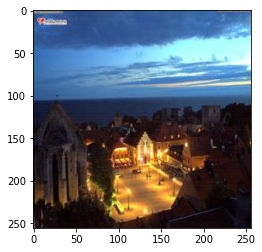

In [22]:
import matplotlib.pyplot as plt

img_real_A = plt.imread('./results/night2day_cycle_gan/test_latest/images/1041_real_A.png')
plt.imshow(img_real_A)

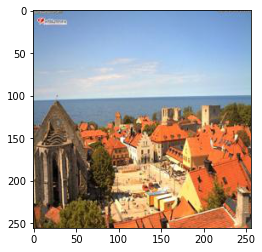

In [23]:
img_real_B = plt.imread('./results/night2day_cycle_gan/test_latest/images/1041_real_B.png')
plt.imshow(img_real_B)

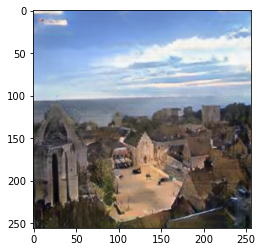

In [24]:
import matplotlib.pyplot as plt

img_fake_B = plt.imread('./results/night2day_cycle_gan/test_latest/images/1041_fake_B.png')
plt.imshow(img_fake_A)

Text(0.5, 1.0, ' (c) Generated Image')

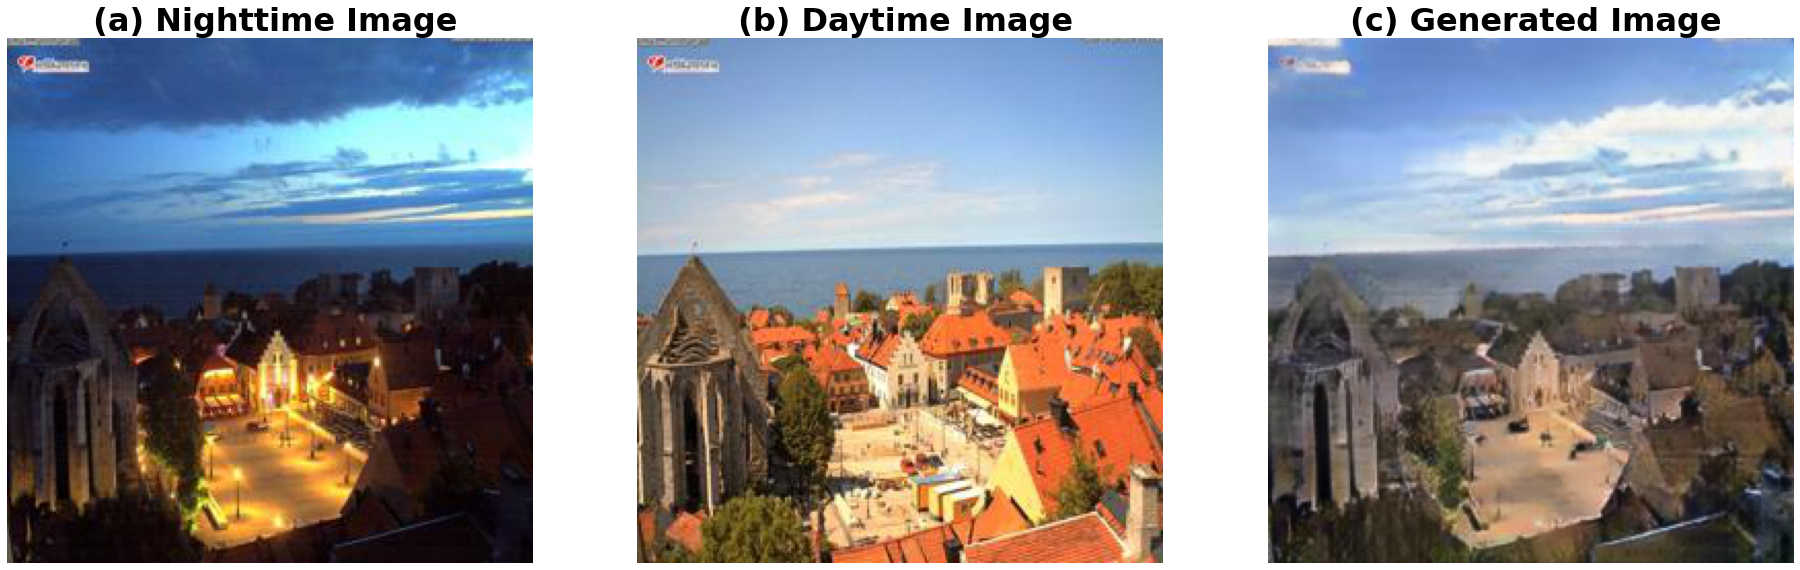

In [54]:
img_real_A_1041 = plt.imread('./results/night2day_cycle_gan/test_latest/images/1041_real_A.png')
img_real_B_1041 = plt.imread('./results/night2day_cycle_gan/test_latest/images/1041_real_B.png')
img_fake_B_1041 = plt.imread('./results/night2day_cycle_gan/test_latest/images/1041_fake_B.png')
plt.figure(figsize=(32,32))
plt.subplot(131)
plt.imshow(img_real_A_1041)
plt.axis('off')
plt.title(' (a) Nighttime Image',fontweight="bold", size=32) # Title
plt.subplot(132)
plt.imshow(img_real_B_1041)
plt.axis('off')
plt.title(' (b) Daytime Image',fontweight="bold", size=32) # Title
plt.subplot(133)
plt.imshow(img_fake_B_1041)
plt.axis('off')
plt.title(' (c) Generated Image',fontweight="bold", size=32) # Title


Text(0.5, 1.0, ' (c) Generated Image')

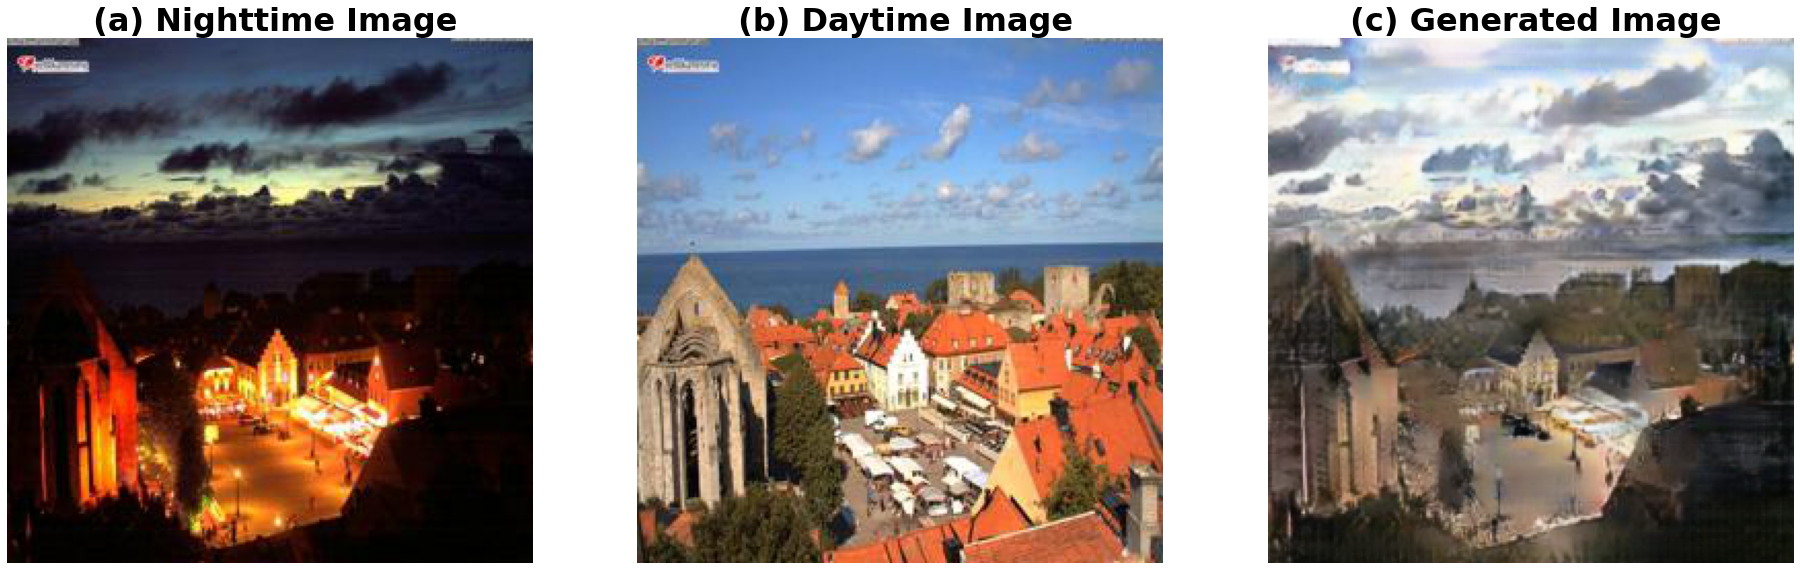

In [55]:
img_real_A_1006 = plt.imread('./results/night2day_cycle_gan/test_latest/images/1006_real_A.png')
img_real_B_1006 = plt.imread('./results/night2day_cycle_gan/test_latest/images/1006_real_B.png')
img_fake_B_1006 = plt.imread('./results/night2day_cycle_gan/test_latest/images/1006_fake_B.png')
plt.figure(figsize=(32,32))
plt.subplot(131)
plt.imshow(img_real_A_1006)
plt.axis('off')
plt.title(' (a) Nighttime Image',fontweight="bold", size=32) # Title
plt.subplot(132)
plt.imshow(img_real_B_1006)
plt.axis('off')
plt.title(' (b) Daytime Image',fontweight="bold", size=32) # Title
plt.subplot(133)
plt.imshow(img_fake_B_1006)
plt.axis('off')
plt.title(' (c) Generated Image',fontweight="bold", size=32) # Title

Text(0.5, 1.0, ' (c) Generated Image')

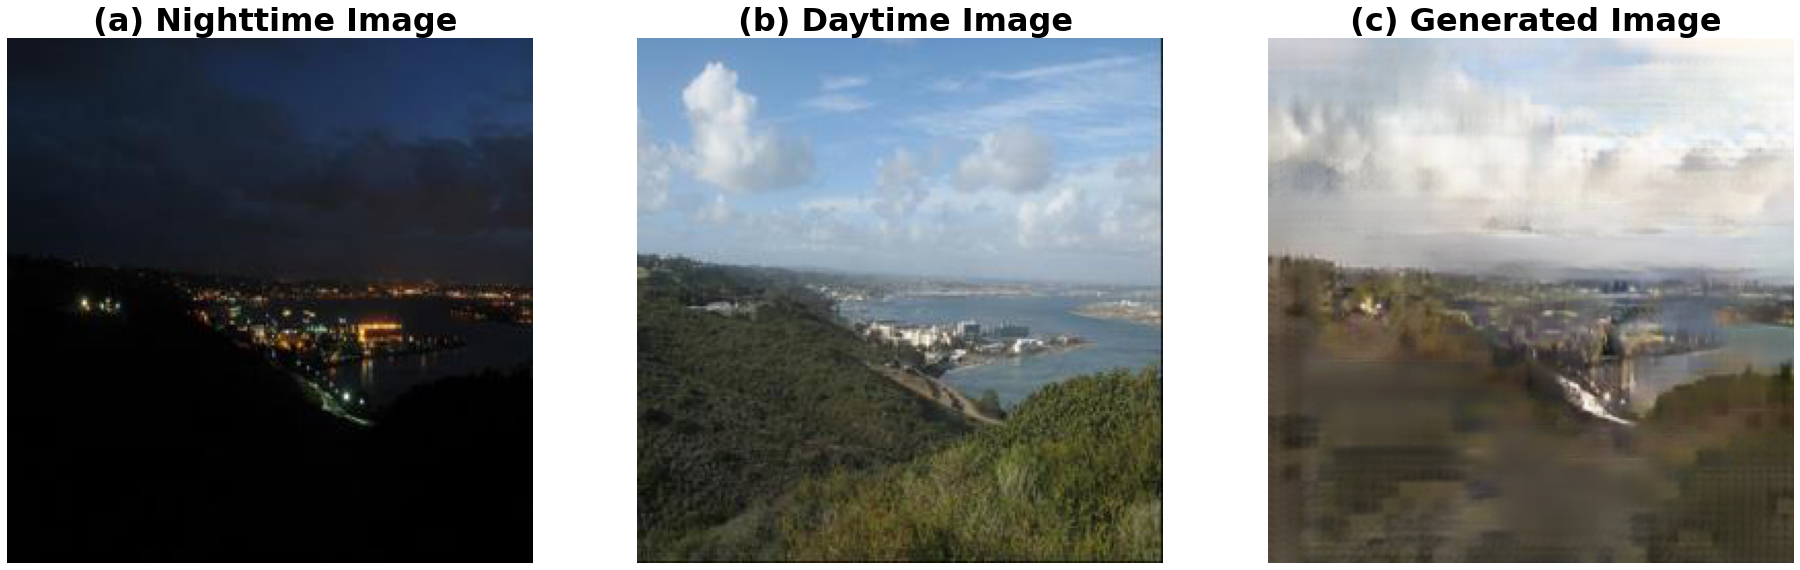

In [56]:
img_real_A_1021 = plt.imread('./results/night2day_cycle_gan/test_latest/images/1021_real_A.png')
img_real_B_1021 = plt.imread('./results/night2day_cycle_gan/test_latest/images/1021_real_B.png')
img_fake_B_1021 = plt.imread('./results/night2day_cycle_gan/test_latest/images/1021_fake_B.png')
plt.figure(figsize=(32,32))
plt.subplot(131)
plt.imshow(img_real_A_1021)
plt.axis('off')
plt.title(' (a) Nighttime Image',fontweight="bold", size=32) # Title
plt.subplot(132)
plt.imshow(img_real_B_1021)
plt.axis('off')
plt.title(' (b) Daytime Image',fontweight="bold", size=32) # Title
plt.subplot(133)
plt.imshow(img_fake_B_1021)
plt.axis('off')
plt.title(' (c) Generated Image',fontweight="bold", size=32) # Title

Text(0.5, 1.0, ' (c) Generated Image')

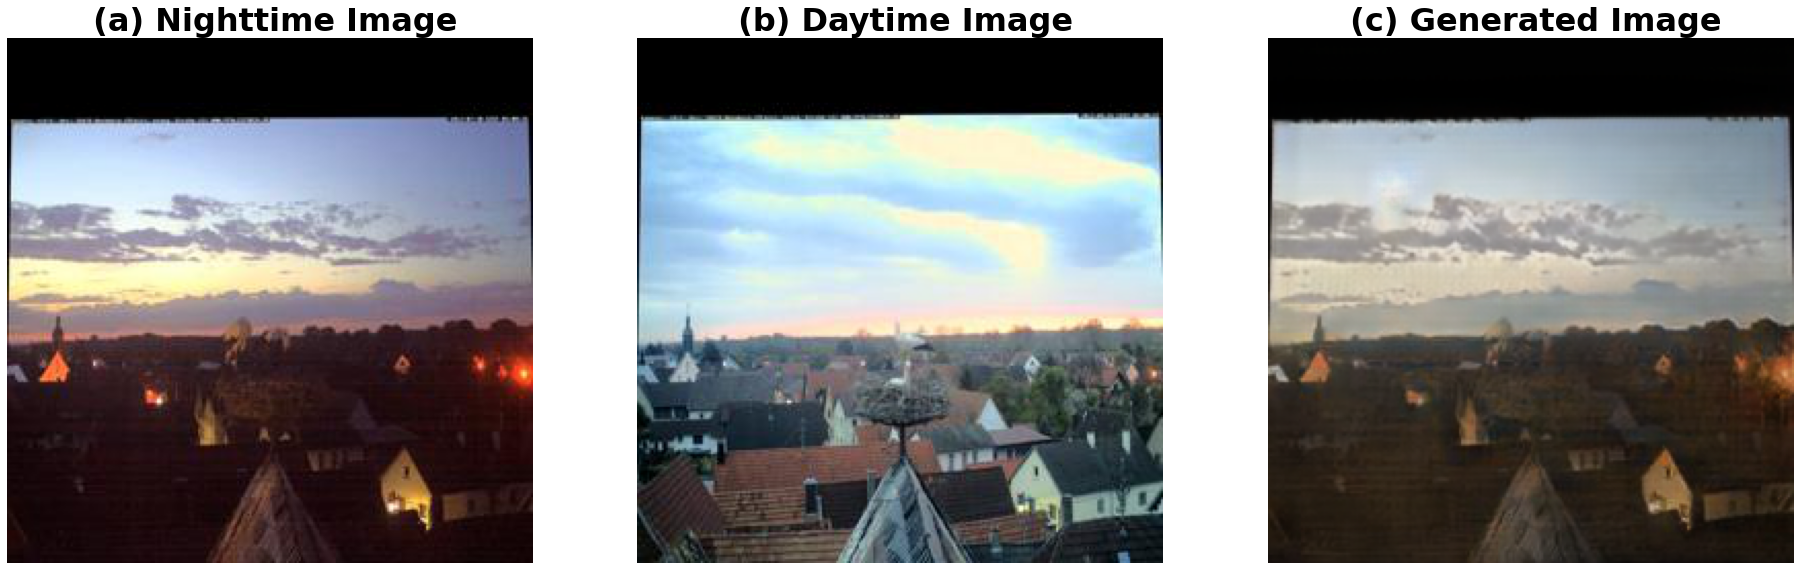

In [57]:
img_real_A_1000 = plt.imread('./results/night2day_cycle_gan/test_latest/images/1000_real_A.png')
img_real_B_1000 = plt.imread('./results/night2day_cycle_gan/test_latest/images/1000_real_B.png')
img_fake_B_1000 = plt.imread('./results/night2day_cycle_gan/test_latest/images/1000_fake_B.png')
plt.figure(figsize=(32,32))
plt.subplot(131)
plt.imshow(img_real_A_1000)
plt.axis('off')
plt.title(' (a) Nighttime Image',fontweight="bold", size=32) # Title
plt.subplot(132)
plt.imshow(img_real_B_1000)
plt.axis('off')
plt.title(' (b) Daytime Image',fontweight="bold", size=32) # Title
plt.subplot(133)
plt.imshow(img_fake_B_1000)
plt.axis('off')
plt.title(' (c) Generated Image',fontweight="bold", size=32) # Title

# RMSE

In [30]:
from PIL import Image, ImageChops
import math
import numpy as np

def rmsdiff(im1, im2):
    """Calculates the root mean square error (RSME) between two images"""
    errors = np.asarray(ImageChops.difference(im1, im2)) / 255
    return math.sqrt(np.mean(np.square(errors)))

# PSNR

In [40]:
import numpy 
import math
import cv2
def psnr(img1, img2):
    mse = numpy.mean( np.asarray(ImageChops.difference(img1, img2)) ** 2 )
    if mse == 0:
     return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

In [63]:
day_image_real_1041 = Image.open('./results/night2day_cycle_gan/test_latest/images/1041_real_B.png')
day_image_fake_1041 = Image.open('./results/night2day_cycle_gan/test_latest/images/1041_fake_B.png')

RMSE = rmsdiff(day_image_real_1041,day_image_fake_1041)
print("RMSE of 1041 = ",RMSE)

d=psnr(day_image_real_1041,day_image_fake_1041)
print("SNR of 1041 = ",d)

RMSE of 1041 =  0.21610758874976355
SNR of 1041 =  28.22027518332462


In [64]:
day_image_real_1006 = Image.open('./results/night2day_cycle_gan/test_latest/images/1006_real_B.png')
day_image_fake_1006 = Image.open('./results/night2day_cycle_gan/test_latest/images/1006_fake_B.png')

RMSE = rmsdiff(day_image_real_1006,day_image_fake_1006)
print("RMSE of 1006 = ",RMSE)

d=psnr(day_image_real_1006,day_image_fake_1006)
print("SNR of 1006 = ",d)

RMSE of 1006 =  0.28878794306985367
SNR of 1006 =  27.884355745401503


In [65]:
day_image_real_1021 = Image.open('./results/night2day_cycle_gan/test_latest/images/1021_real_B.png')
day_image_fake_1021 = Image.open('./results/night2day_cycle_gan/test_latest/images/1021_fake_B.png')

RMSE = rmsdiff(day_image_real_1021,day_image_fake_1021)
print("RMSE of 1021 = ",RMSE)

d=psnr(day_image_real_1021,day_image_fake_1021)
print("SNR of 1021 = ",d)

RMSE of 1021 =  0.14653099367913278
SNR of 1021 =  28.178329071630415


In [66]:
day_image_real_1000 = Image.open('./results/night2day_cycle_gan/test_latest/images/1000_real_B.png')
day_image_fake_1000 = Image.open('./results/night2day_cycle_gan/test_latest/images/1000_fake_B.png')

RMSE = rmsdiff(day_image_real_1000,day_image_fake_1000)
print("RMSE of 1000 = ",RMSE)

d=psnr(day_image_real_1000,day_image_fake_1000)
print("SNR of 1000 = ",d)

RMSE of 1000 =  0.21310955901553044
SNR of 1000 =  28.497111124471072
